# DS L3T12
# Machine Learning Capstone II - US Arrests

# PCA & KMeans Clustering & Agglomerative Clustering with Dendrogrograms.

# Problem Statement

# Perform PCA & KMeans Clustering (Hierarchical and Kmeans) & Agglomerative Clustering with Dendrogrograms for the crime data and identify the number of clusters formed.

# 1. Table of Contents

1. Content
- 1.1 About the Dataset

2. Data Exploration
- 2.1 Missing Values

3. Exploratory Data Analysis
- 3.1 Outlier Detection

4. Data Visualization
- 4.1 Murder Rate State-Wise 
- 4.2 Assault Rate State-Wise 
- 4.3 Rape Rate State-Wise 
- 4.4 Urban Rate State-Wise

5. Data Pre-processing
- 5.1 Standardizing the Data 
- 5.2 Normalizing the Data

6. KMeans Clustering
- 6.1 Elbow Method for Determining Cluster Amount on Standard Scaled Data 
- 6.2 Silhoutte Score 
- 6.3 Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset 
- 6.4 Elbow Method and Silhouette Score on MinMaxScaler Applied Data 
- 6.5 Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

7. Hierarchical Clustering Algorithm
- 7.1 Dendogram on MinMaxScaler Applied on Dataset 
- 7.2 Dendrogram on Standard Scaler Applied on Data 
- 7.3 Run Hierarchical Clustering (Agglomerative Clustering) on MinMax Scaled Data)

8. Principal Component Analysis (PCA)
- 8.1 Apply PCA

In [1]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import math 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data display customization

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", -1)

# 1. Content

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.This is a systematic approach for identifying and analyzing patterns and trends in crime using USArrest dataset.

A data frame with 50 observations on 4 variables.

1. Murder is numeric and Murder arrests (per 100,000)
2. Assault is numeric and Assault arrests (per 100,000)
3. UrbanPop is numeric and UrbanPop arrests (per 100,000)
4. Rape is numeric and Rape arrests (per 100,000)

In [4]:
# Load the dataset
data = pd.read_csv("USArrests.csv")

# Get the first five rows of the dataset
data.head()

City  Murder  Assault  UrbanPop  Rape
0  Alabama     13.2    236      58        21.2
1  Alaska      10.0    263      48        44.5
2  Arizona     8.1     294      80        31.0
3  Arkansas    8.8     190      50        19.5
4  California  9.0     276      91        40.6

In [5]:
# Get the last five rows of the dataset
data.tail()

City  Murder  Assault  UrbanPop  Rape
45  Virginia       8.5     156      63        20.7
46  Washington     4.0     145      73        26.2
47  West Virginia  5.7     81       39        9.3 
48  Wisconsin      2.6     53       66        10.8
49  Wyoming        6.8     161      60        15.6

# 2. Data Exploration

# Data Cleaning

# Descriptive Statistics

In [6]:
# get dataframe dimensions
print("Database dimension     :",data.shape)
print("Database size          :",data.size)

# get info about the dataframe (columns,entries,datatype etc...)
data.info()     

# describe the dataframe and get statistics
data.describe()

Database dimension     : (50, 5)
Database size          : 250
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Murder     Assault   UrbanPop       Rape
count  50.00000  50.000000   50.000000  50.000000
mean   7.78800   170.760000  65.540000  21.232000
std    4.35551   83.337661   14.474763  9.366385 
min    0.80000   45.000000   32.000000  7.300000 
25%    4.07500   109.000000  54.500000  15.075000
50%    7.25000   159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

# 2.1 Missing Values

In [7]:
# Missing data
data.isnull().sum()


City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    5
dtype: int64 

Null Percentage for Columns:

 0.0    5
dtype: int64


In [9]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    50
dtype: int64 

Null Percentage for Rows:

 0.0    50
dtype: int64


# Duplicated Values

Print the duplicated rows

In [10]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data.duplicated().sum()

0

There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

# 3. Exploratory Data Analysis (EDA)

Lets analyze the features by creating histograms to understand the distribution.

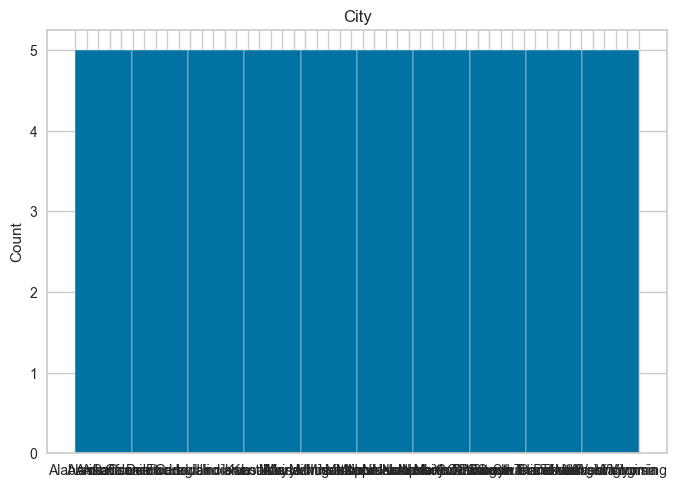

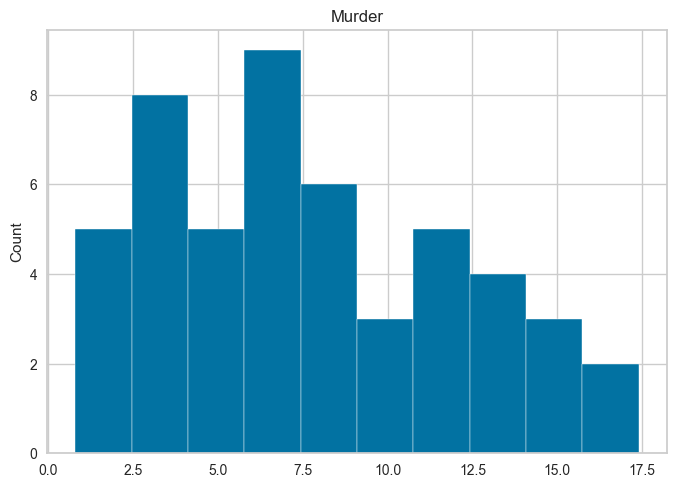

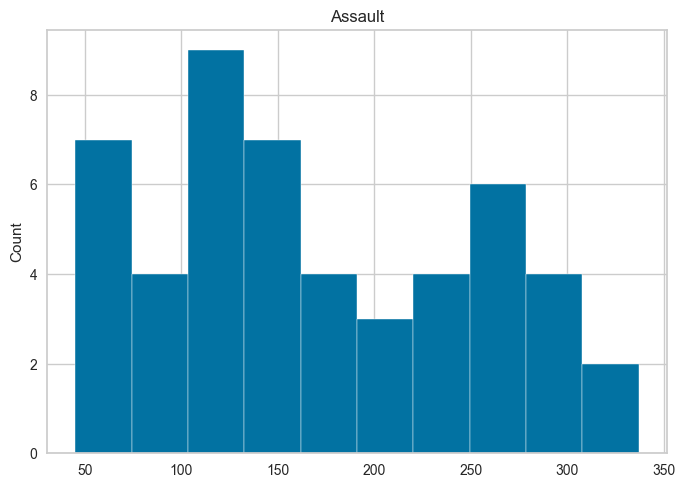

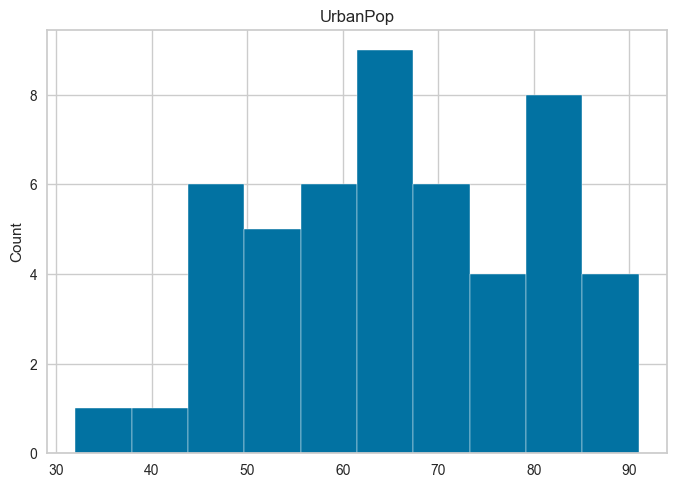

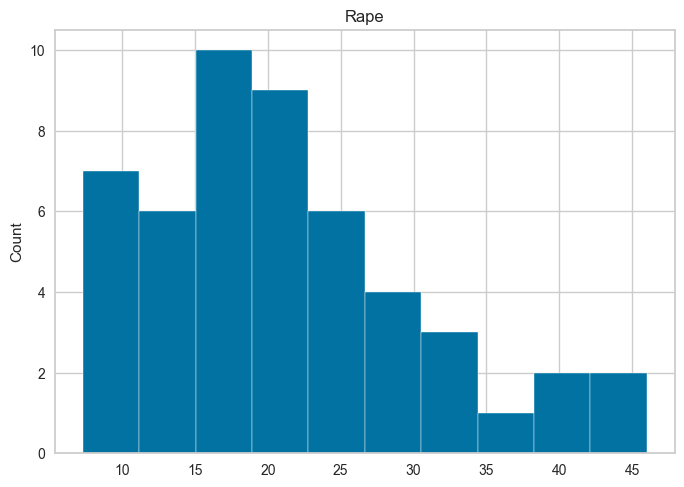

In [11]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=10)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<Axes: ylabel='Count'>

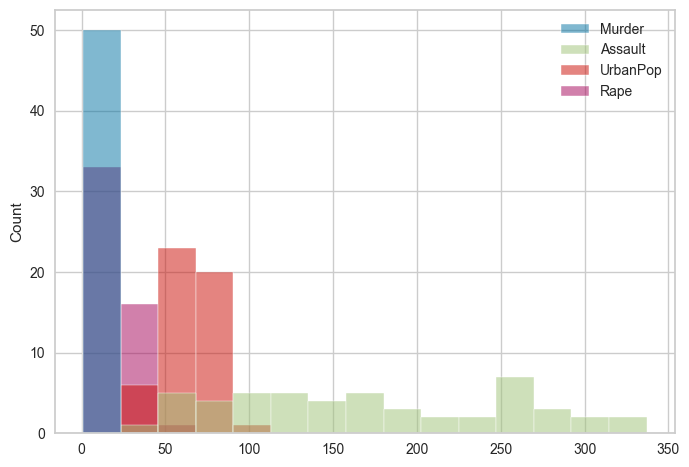

In [12]:
# Visualise the features
sns.histplot(data)

# 3.1 Outliers Detection

In [13]:
data.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

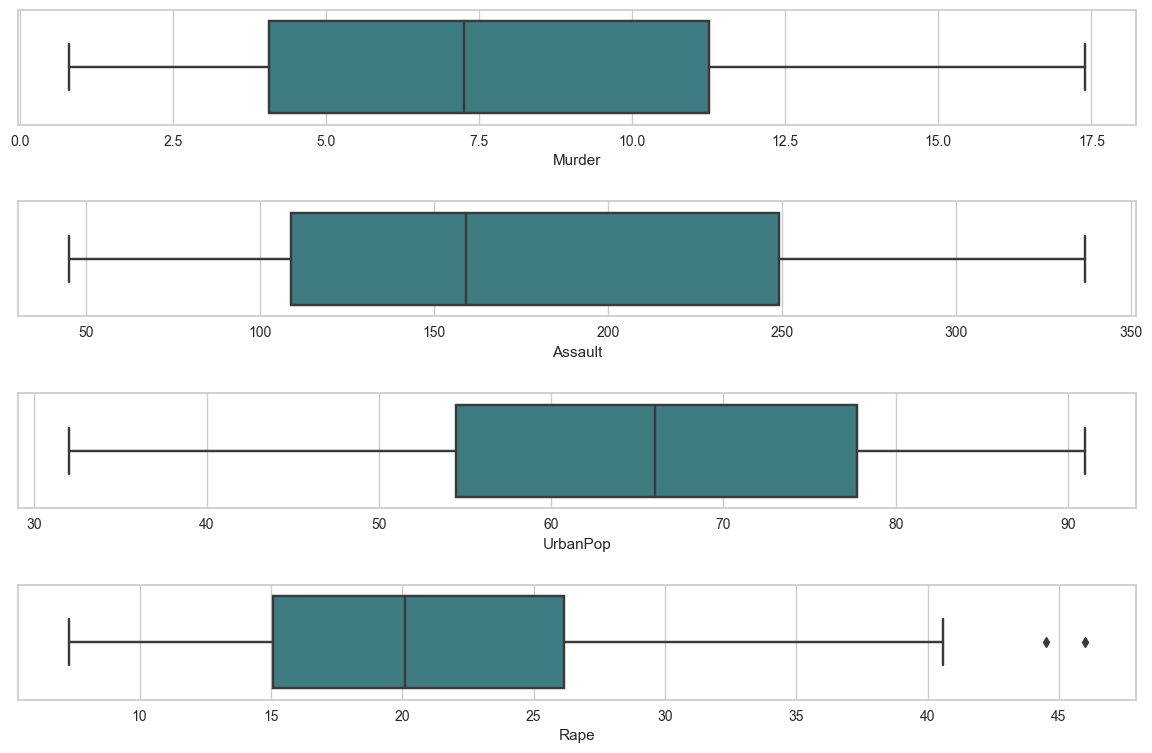

In [14]:
ot=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x="Murder",data=ot,palette="crest",ax=axes[0])
sns.boxplot(x="Assault",data=ot,palette="crest",ax=axes[1])
sns.boxplot(x="UrbanPop",data=ot,palette="crest",ax=axes[2])
sns.boxplot(x="Rape",data=ot,palette="crest",ax=axes[3])
plt.tight_layout(pad=2.0)

<Axes: >

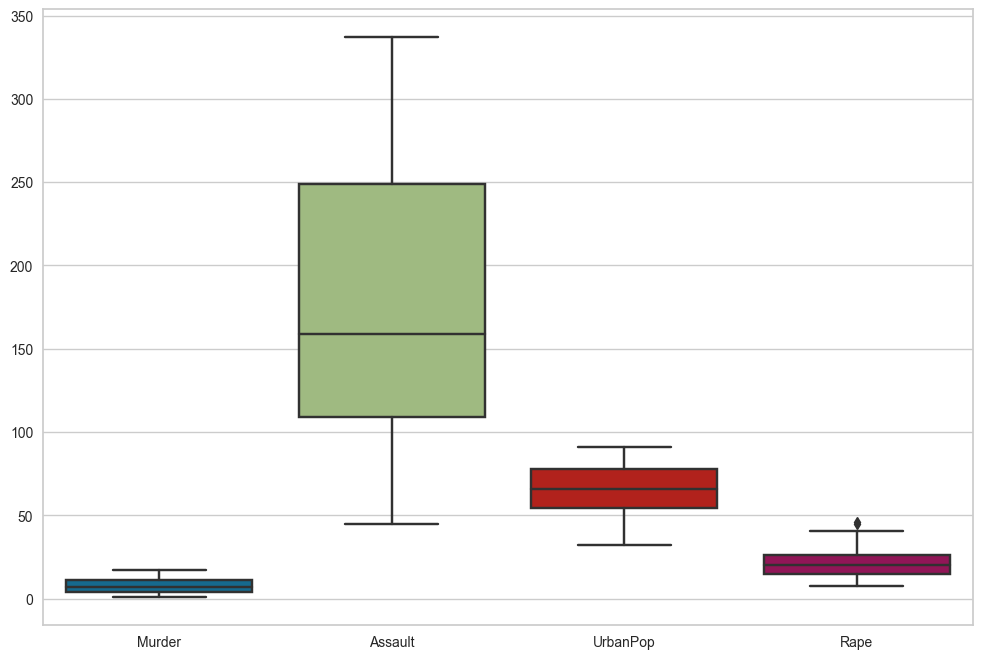

In [15]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

# 4. Data Visualization

Text(0.5, 1.0, 'Murder rate by City')

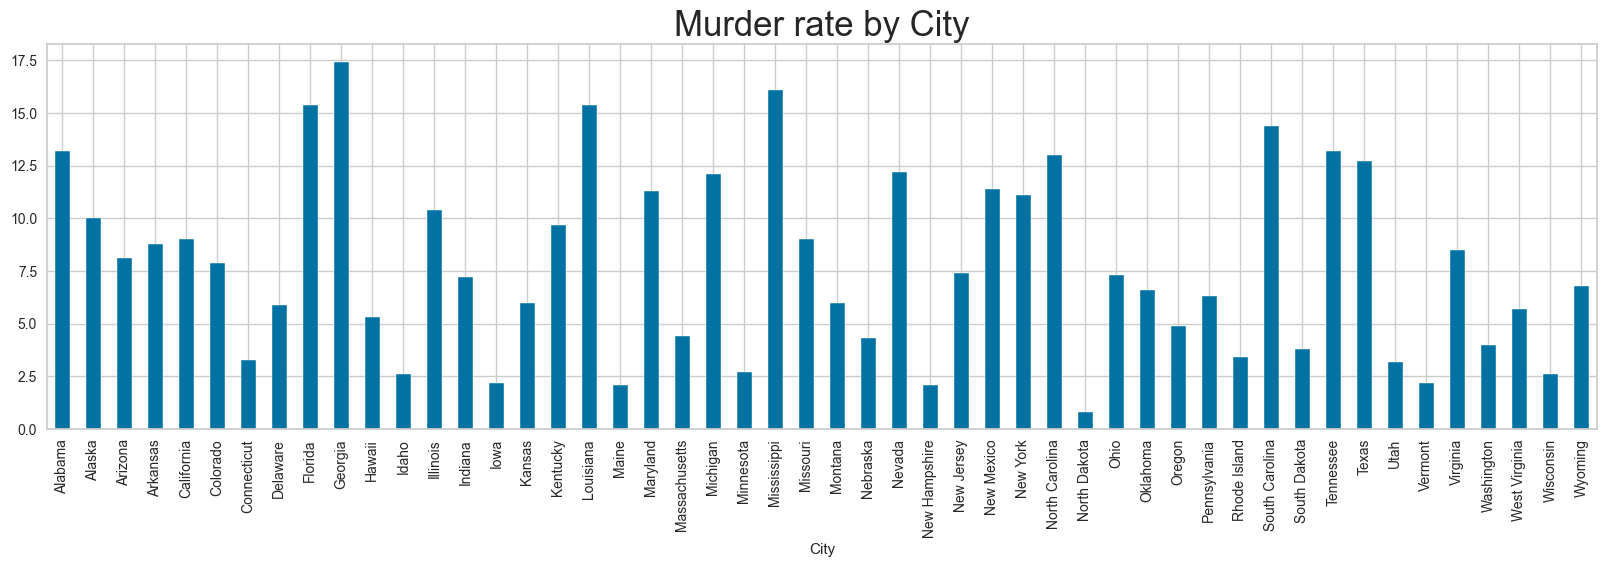

In [16]:
# Murder Rate by City
plt.figure(figsize=(20,5))
data.groupby("City")["Murder"].max().plot(kind="bar")
plt.title("Murder rate by City", fontsize = 25)

- The highest Murders are in 9 Georgia and 23 Missisippi. Followed by 8 Florida and 17 Louisana.
- Lowest is in 33 North Dakota and 28 New Hampshire.

Text(0.5, 1.0, 'Assult rate by City')

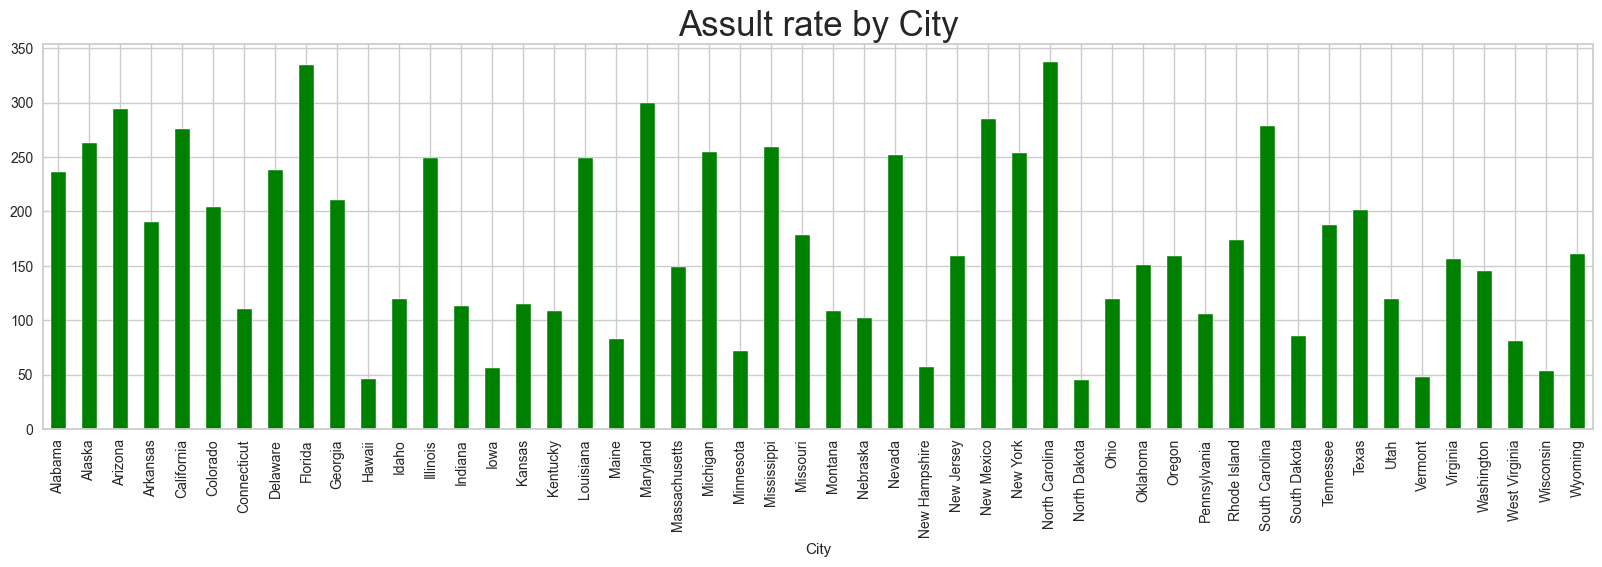

In [17]:
# Assault rate by City
plt.figure(figsize=(20,5))
data.groupby("City")["Assault"].max().plot(kind="bar", color="green")
plt.title("Assult rate by City", fontsize = 25)

- Highest Assaults are in 8 Florida and 32 North California. Followed by 19 Maryland and 2 North Carolina.

- Lowest is in 10 Hawaii and 33 North Dakota.

Text(0.5, 1.0, 'Rape rates by City')

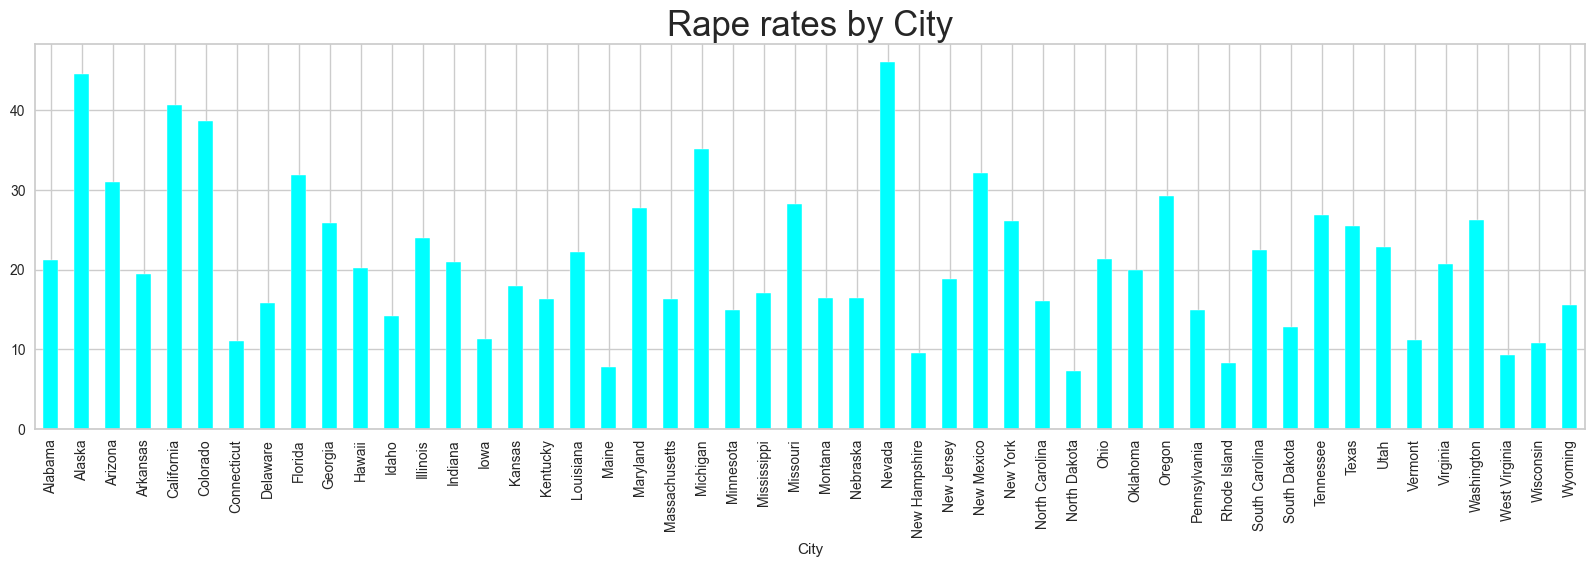

In [18]:
# Rape rates by City
plt.figure(figsize=(20,5))
data.groupby("City")["Rape"].max().plot(kind="bar", color="aqua")
plt.title("Rape rates by City", fontsize = 25)

- Highest Rapes are in 27 Nevada and 1 Alaska. Followed by 4 California and 5 Colorado.

- Lowest is in 33 North Dakota and 18 Maine.

# Correlations

In [20]:
print("Correlation Analysis:")
data.corr()

Correlation Analysis:


Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000

- There is a significantly higher correlation between Murder and Assault. Rape and Assault & Rape and Murder also have a correlation.

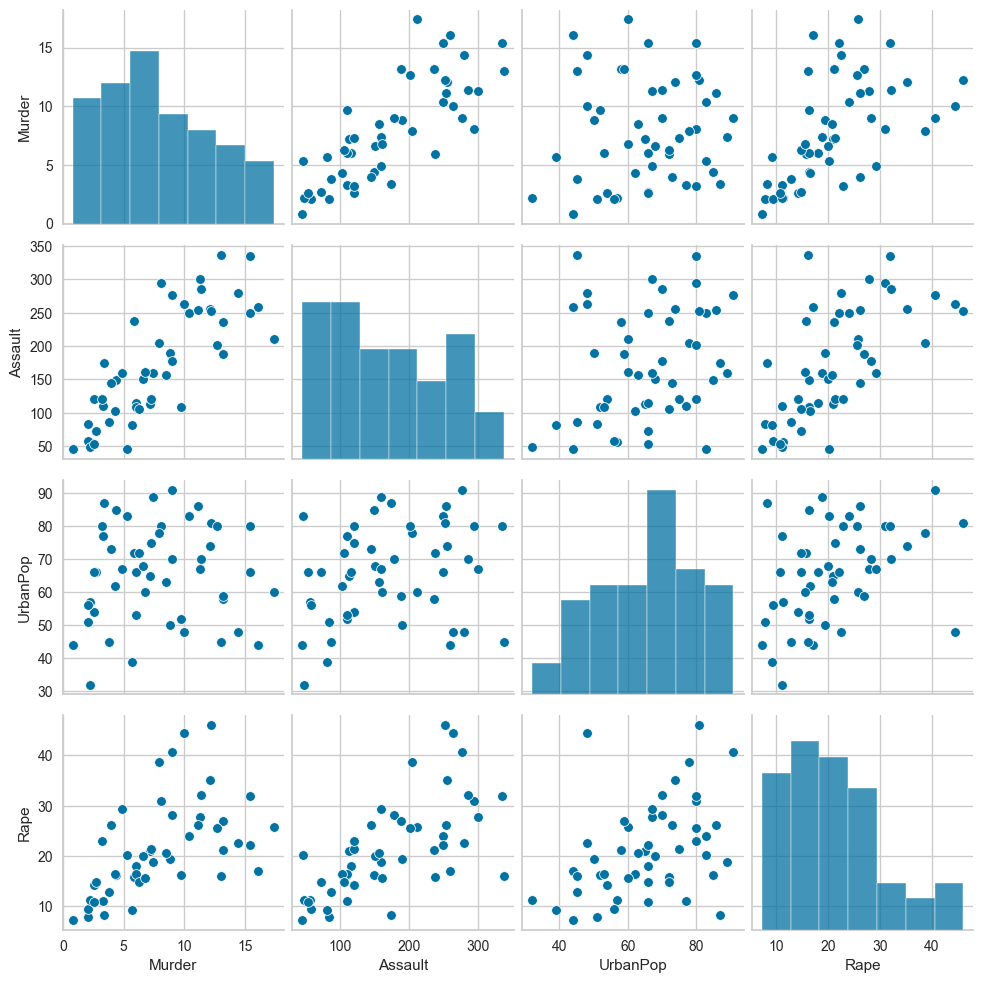

In [21]:
sns.pairplot(data)

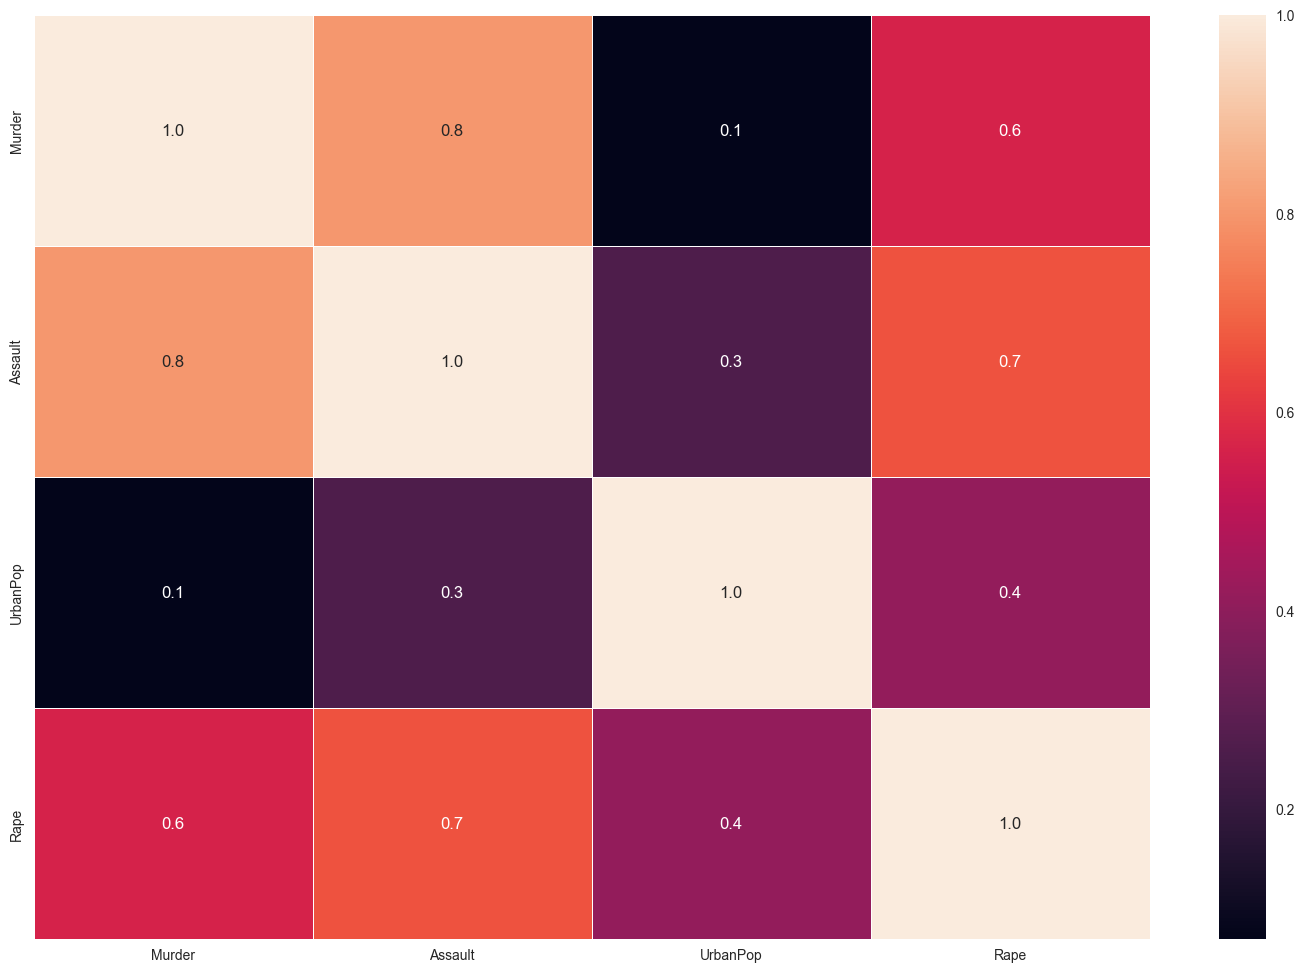

In [22]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt =".1f",ax=ax)
plt.show()

Unique points in this correlation matrix:
- Assault is positively correlated with Murder
- Assualt is positively correlated with Rape
- Rape is positively correlated with Murder

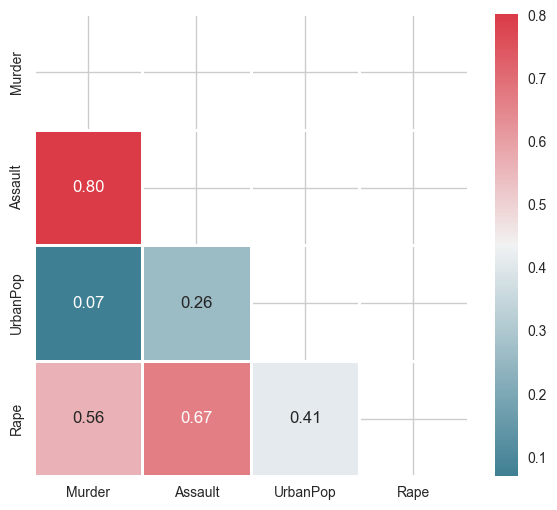

In [23]:
# Correlation HeatMap - All features before PCA
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(data):
  # get correlations
  corrs = data.corr()

  # pick appropriate palette for heatmap
  # Plot figsize
  fig, ax = plt.subplots(figsize=(7, 6))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(data)

# 4.1 Murder Rate

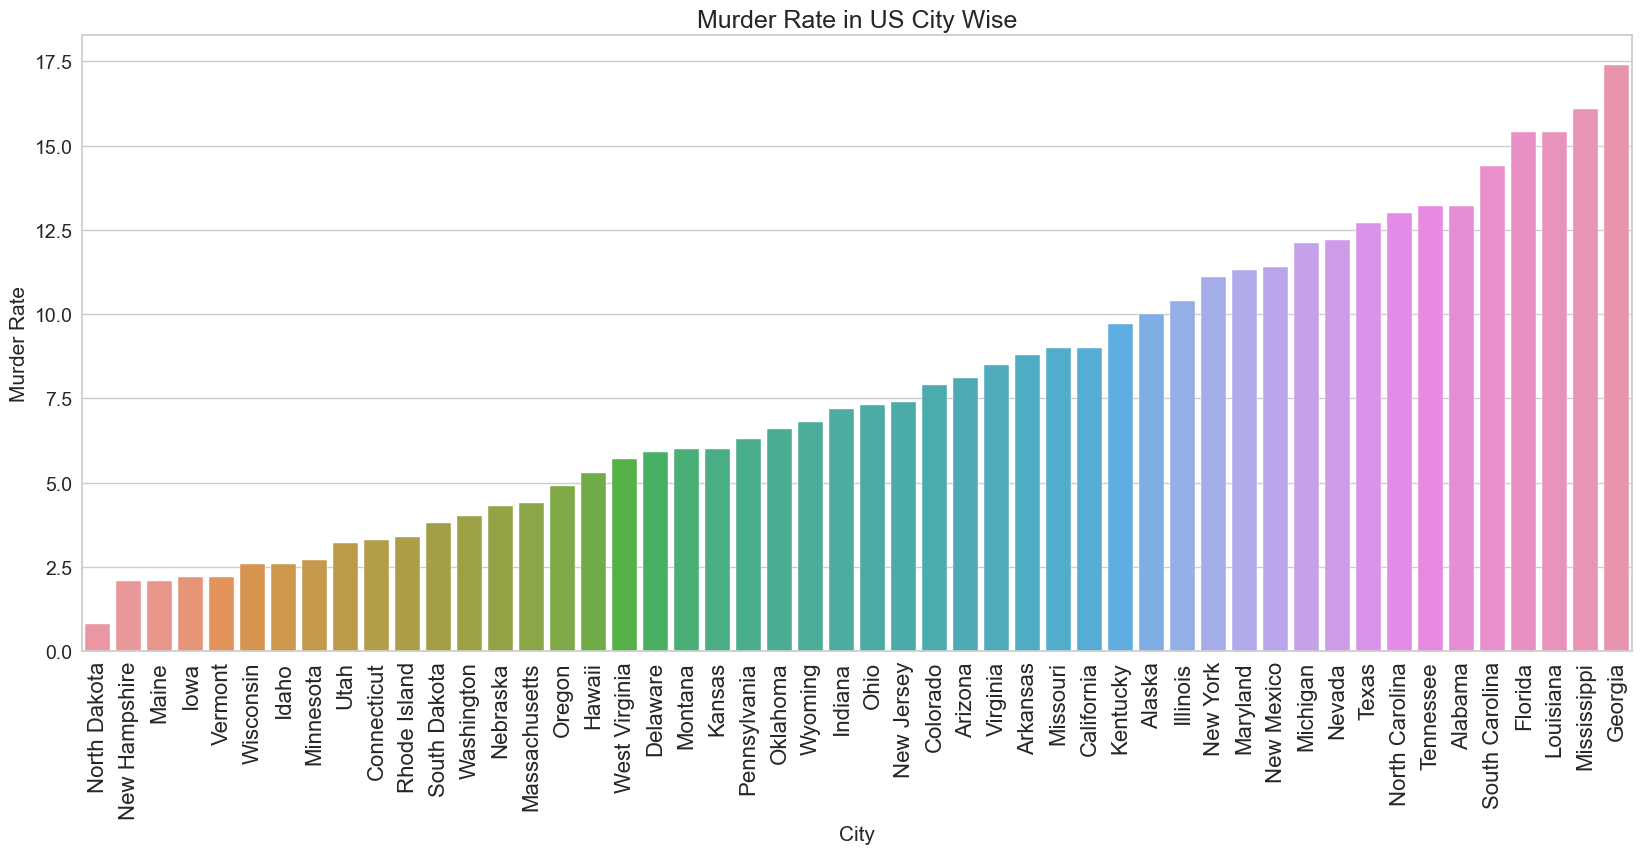

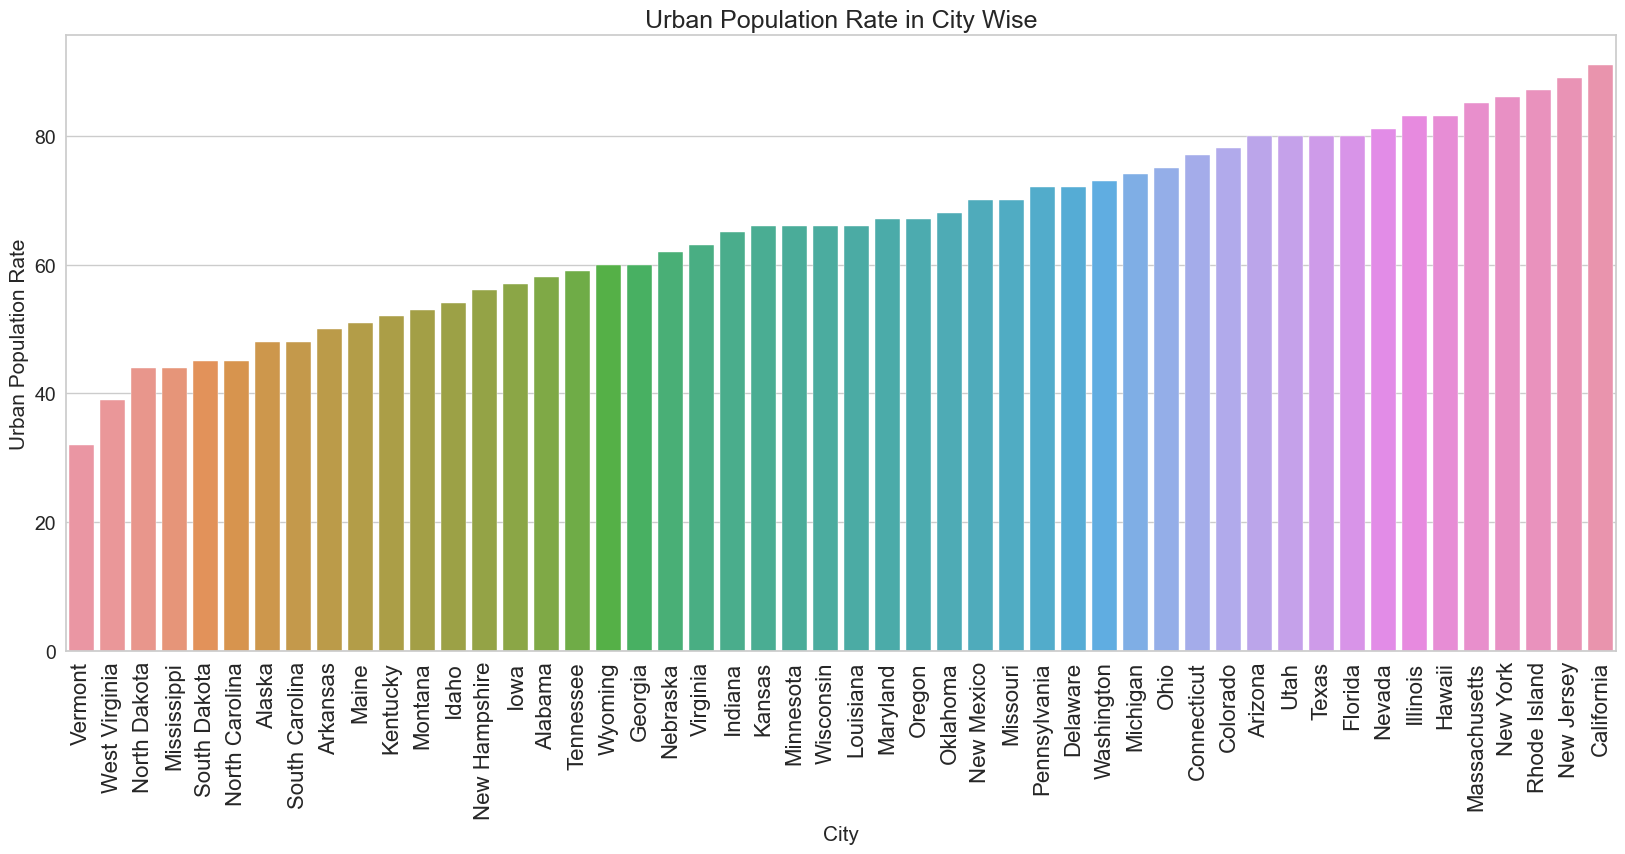

In [24]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x="City",
            y="Murder", 
            data=data, 
            order=data.sort_values("Murder").City)
# set labels
plt.xlabel("City", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US City Wise", size=18)
plt.show()

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x="City",
            y="UrbanPop", 
            data=data, 
            order=data.sort_values("UrbanPop").City)
# set labels
plt.xlabel("City", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in City Wise", size=18)
plt.show()

Observation: There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect.

In [25]:
# Get the top ten cities with higher Murder rates.
print("Top 10 Cities with Highest Murder Rate")
data.sort_values("Murder",ascending=False).head(10)

Top 10 Cities with Highest Murder Rate


City  Murder  Assault  UrbanPop  Rape
9   Georgia         17.4    211      60        25.8
23  Mississippi     16.1    259      44        17.1
8   Florida         15.4    335      80        31.9
17  Louisiana       15.4    249      66        22.2
39  South Carolina  14.4    279      48        22.5
0   Alabama         13.2    236      58        21.2
41  Tennessee       13.2    188      59        26.9
32  North Carolina  13.0    337      45        16.1
42  Texas           12.7    201      80        25.5
27  Nevada          12.2    252      81        46.0

In [26]:
# Get the top ten cities with the lowest Murder rates.
print("Top 10 States with Lowest Murder Rate")
data.sort_values("Murder",ascending=True).head(10)

Top 10 States with Lowest Murder Rate


City  Murder  Assault  UrbanPop  Rape
33  North Dakota   0.8     45       44        7.3 
28  New Hampshire  2.1     57       56        9.5 
18  Maine          2.1     83       51        7.8 
14  Iowa           2.2     56       57        11.3
44  Vermont        2.2     48       32        11.2
48  Wisconsin      2.6     53       66        10.8
11  Idaho          2.6     120      54        14.2
22  Minnesota      2.7     72       66        14.9
43  Utah           3.2     120      80        22.9
6   Connecticut    3.3     110      77        11.1

In [27]:
# Sort the values of murder rates.
murder = data.sort_values("Murder", ascending = False, ignore_index=True)
murder.head()

City  Murder  Assault  UrbanPop  Rape
0  Georgia         17.4    211      60        25.8
1  Mississippi     16.1    259      44        17.1
2  Florida         15.4    335      80        31.9
3  Louisiana       15.4    249      66        22.2
4  South Carolina  14.4    279      48        22.5

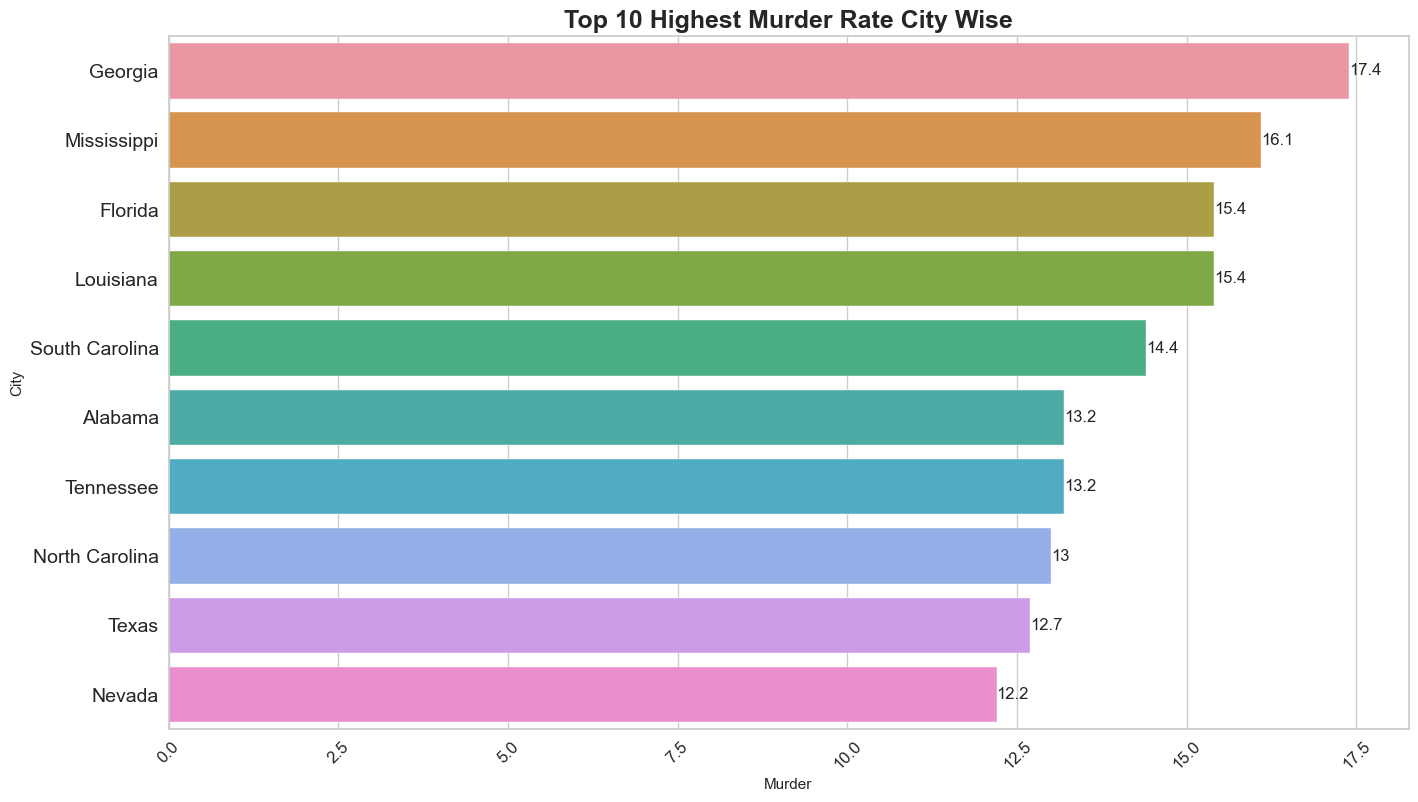

In [28]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.City[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Highest Murder Rate City Wise",  fontsize = 18, fontweight = "bold")
for i in ax.containers:
    ax.bar_label(i,)

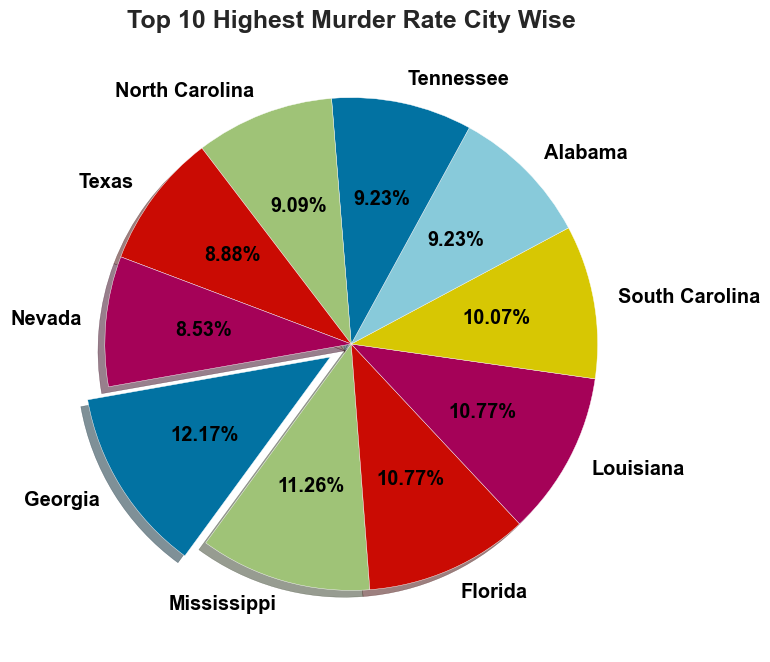

In [29]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.City[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= "%.2f%%",
       shadow= True,
       startangle= 190,
       textprops = {"size":"large",
                   "fontweight":"bold",
                    "rotation":"horizontal",
                   "color":"black"})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Murder Rate City Wise", fontsize = 18, fontweight = "bold")
plt.show()

In [30]:
murder = data.sort_values("Murder", ascending = True,ignore_index=True)
murder.head()

City  Murder  Assault  UrbanPop  Rape
0  North Dakota   0.8     45       44        7.3 
1  New Hampshire  2.1     57       56        9.5 
2  Maine          2.1     83       51        7.8 
3  Iowa           2.2     56       57        11.3
4  Vermont        2.2     48       32        11.2

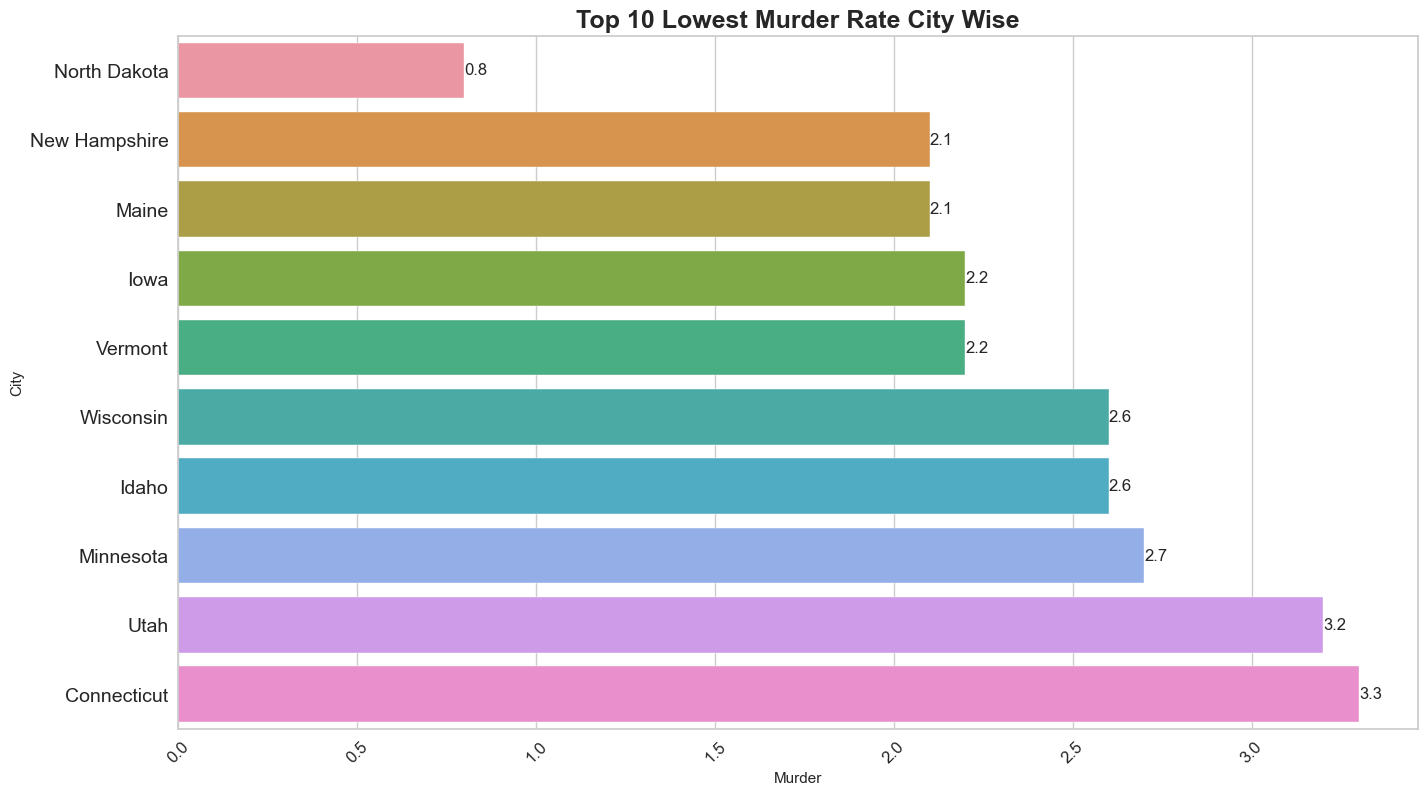

In [31]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.City[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Lowest Murder Rate City Wise",  fontsize = 18, fontweight = "bold")
for i in ax.containers:
    ax.bar_label(i,)

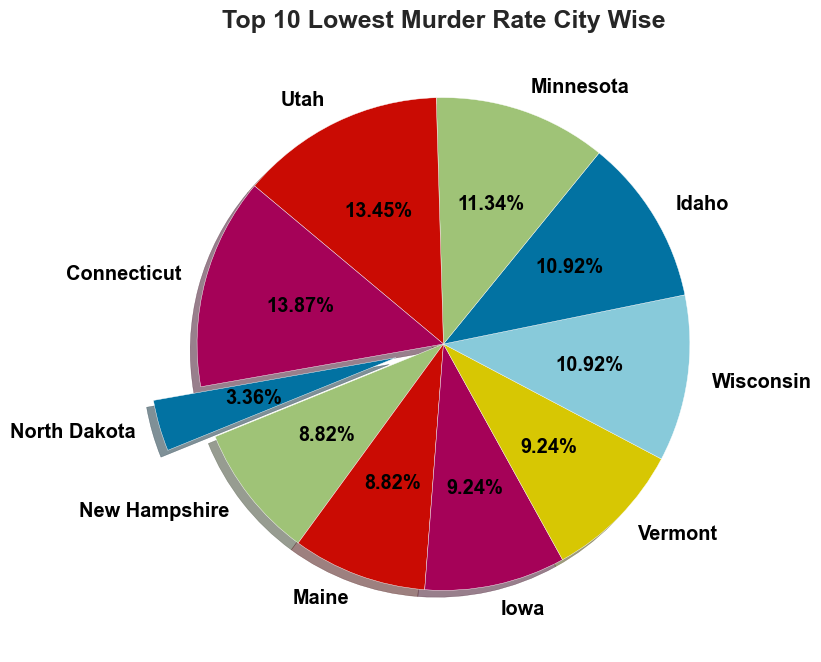

In [32]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.City[:10],
       explode = [0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= "%.2f%%",
       shadow= True,
       startangle= 190,
       textprops = {"size":"large",
                   "fontweight":"bold",
                    "rotation":"horizontal",
                   "color":"black"})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Murder Rate City Wise", fontsize = 18, fontweight = "bold")
plt.show()


Observations:
    
- Highest Murder Rate : Georgia, Missisippi and Florida
- Lowest Murder Rate : North Dakota, New Hampshire, Idaho, Iowa, Maine, Vermont and Wisconsin.

# 4.2 Assault Rate

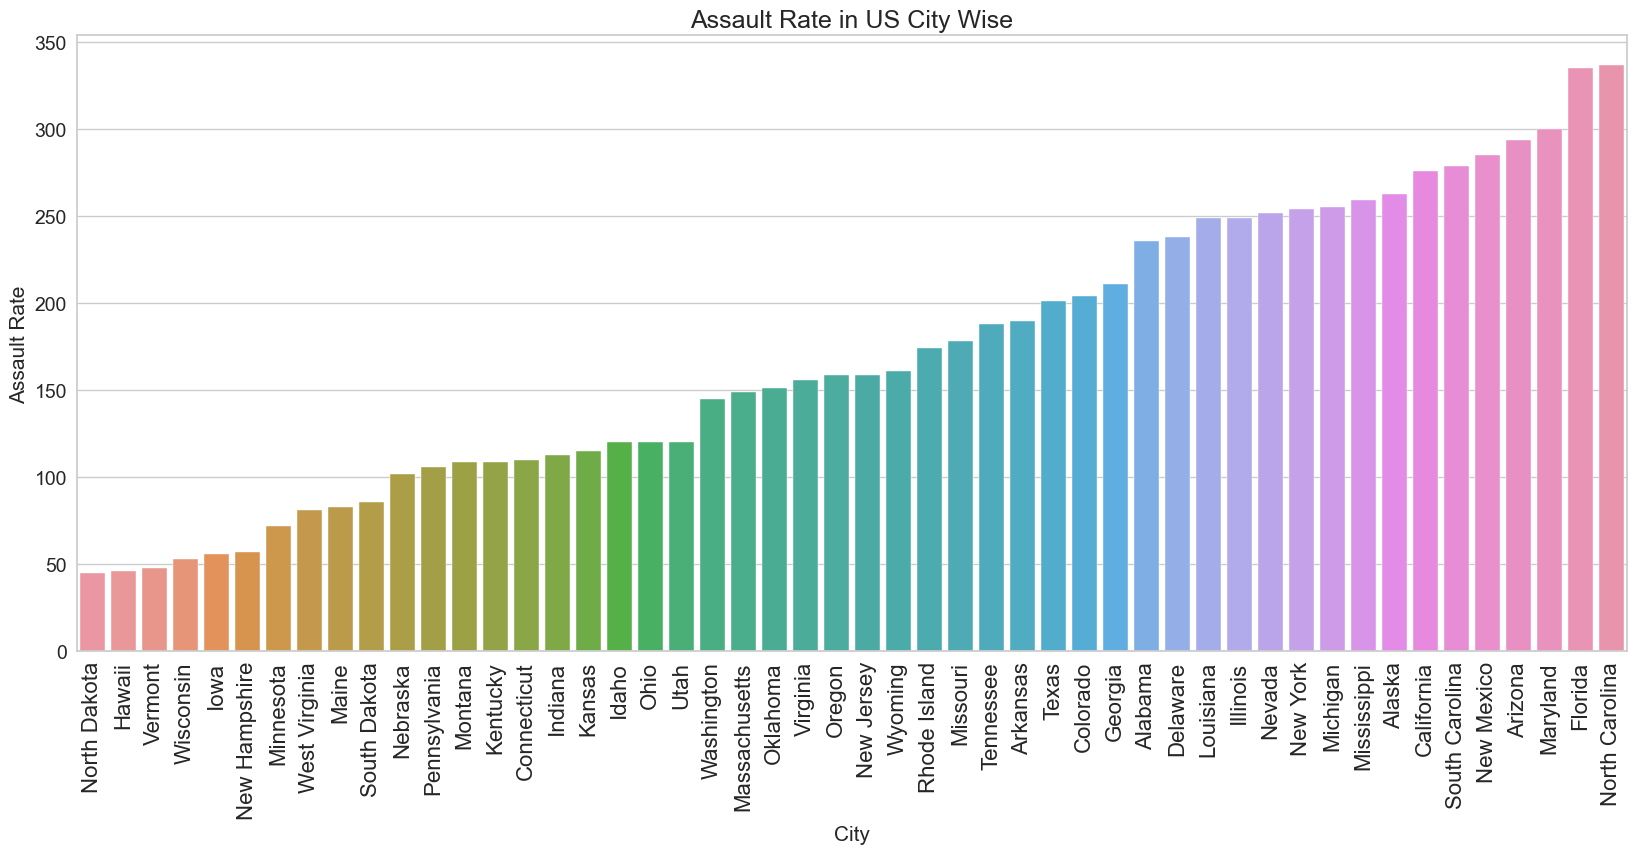

In [33]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x="City",
            y="Assault", 
            data=data, 
            order=data.sort_values("Assault").City)
# set labels
plt.xlabel("City", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US City Wise", size=18)
plt.show()

In [34]:
# Top ten cities with the gighest Assult rate.
print("Top 10 Cities with Highest Assault Rate")
data.sort_values("Assault",ascending=False, ignore_index=True).head(10)

Top 10 Cities with Highest Assault Rate


City  Murder  Assault  UrbanPop  Rape
0  North Carolina  13.0    337      45        16.1
1  Florida         15.4    335      80        31.9
2  Maryland        11.3    300      67        27.8
3  Arizona         8.1     294      80        31.0
4  New Mexico      11.4    285      70        32.1
5  South Carolina  14.4    279      48        22.5
6  California      9.0     276      91        40.6
7  Alaska          10.0    263      48        44.5
8  Mississippi     16.1    259      44        17.1
9  Michigan        12.1    255      74        35.1

In [35]:
# The top ten cities with the lowest Assult rate.
print("Top 10 Cities with Lowest Assault Rate")
data.sort_values("Assault",ascending=True, ignore_index=True).head(10)

Top 10 Cities with Lowest Assault Rate


City  Murder  Assault  UrbanPop  Rape
0  North Dakota   0.8     45       44        7.3 
1  Hawaii         5.3     46       83        20.2
2  Vermont        2.2     48       32        11.2
3  Wisconsin      2.6     53       66        10.8
4  Iowa           2.2     56       57        11.3
5  New Hampshire  2.1     57       56        9.5 
6  Minnesota      2.7     72       66        14.9
7  West Virginia  5.7     81       39        9.3 
8  Maine          2.1     83       51        7.8 
9  South Dakota   3.8     86       45        12.8

In [36]:
Assault = data.sort_values("Assault", ascending = False)

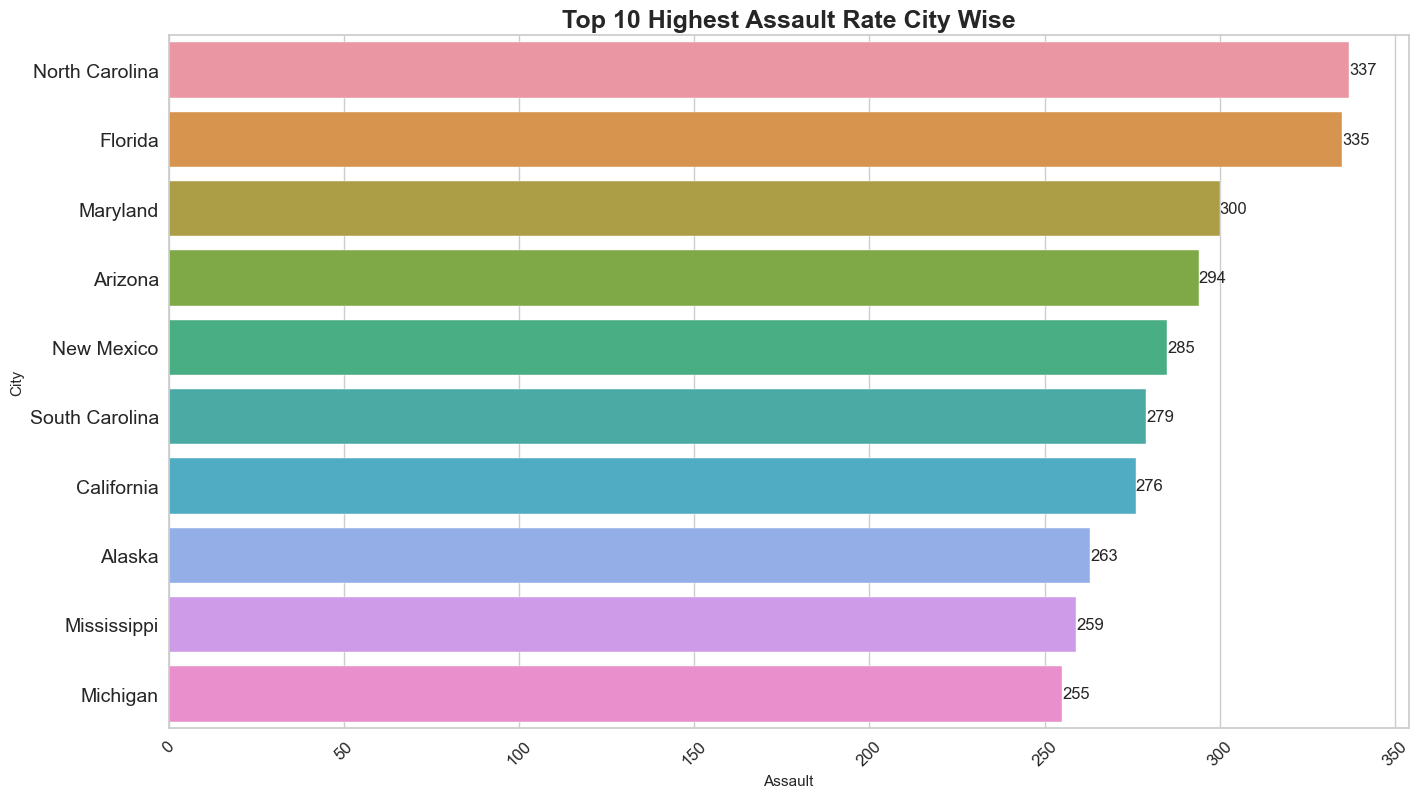

In [37]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.City[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Highest Assault Rate City Wise",  fontsize = 18, fontweight = "bold")
for i in ax.containers:
    ax.bar_label(i,)

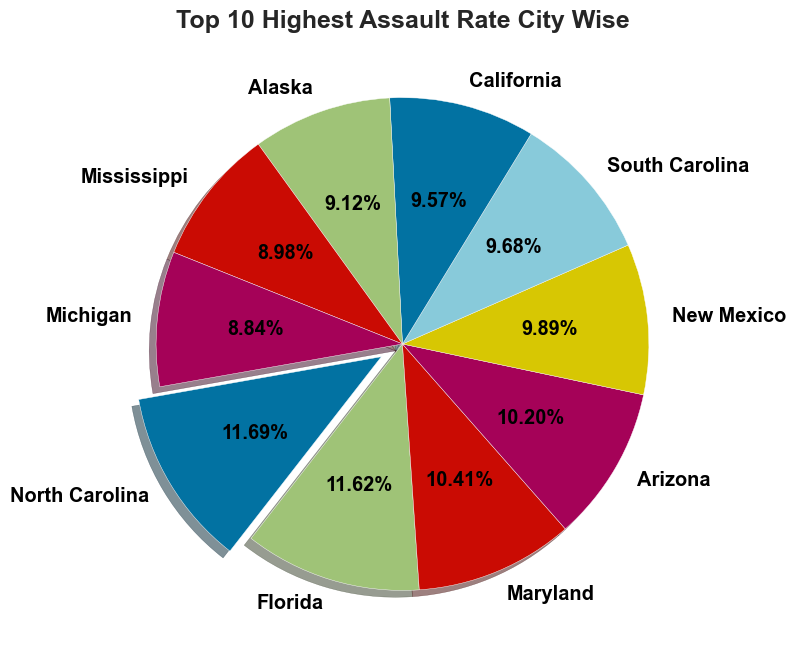

In [38]:
plt.figure(figsize = (8,8))
plt.pie(Assault.Assault[:10],
       labels=Assault.City[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= "%.2f%%",
       shadow= True,
       startangle= 190,
       textprops = {"size":"large",
                   "fontweight":"bold",
                    "rotation":"horizontal",
                   "color":"black"})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Assault Rate City Wise", fontsize = 18, fontweight = "bold")
plt.show()

In [39]:
assault = data.sort_values("Assault", ascending = True)

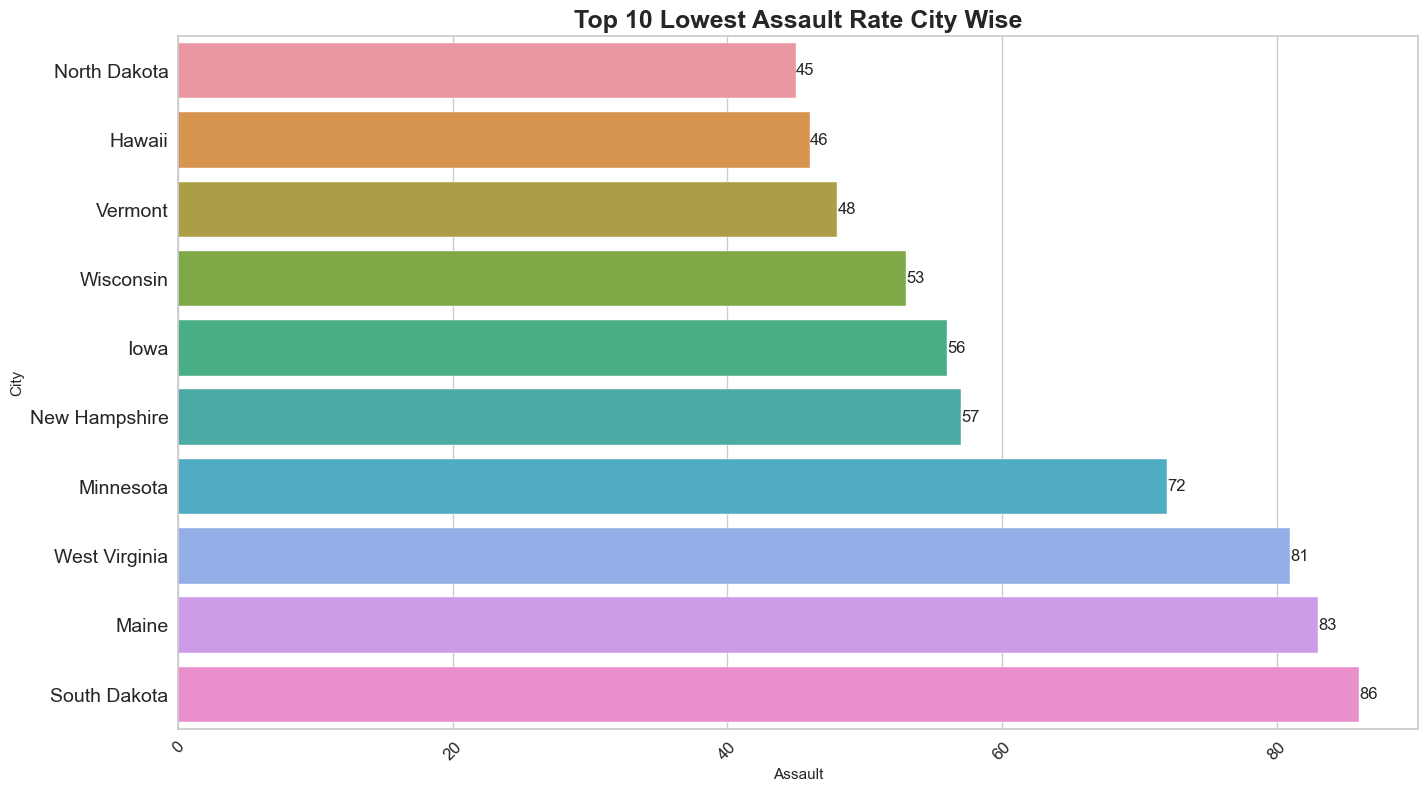

In [40]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = assault.Assault[:10], y = assault.City[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Lowest Assault Rate City Wise",  fontsize = 18, fontweight = "bold")
for i in ax.containers:
    ax.bar_label(i,)

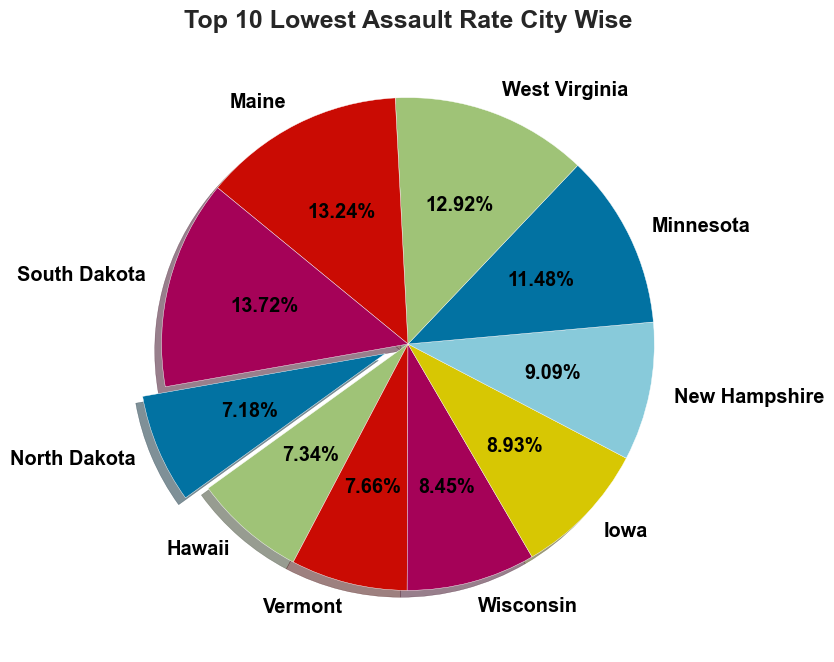

In [41]:
plt.figure(figsize = (8,8))
plt.pie(assault.Assault[:10],
       labels=assault.City[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= "%.2f%%",
       shadow= True,
       startangle= 190,
       textprops = {"size":"large",
                   "fontweight":"bold",
                    "rotation":"horizontal",
                   "color":"black"})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Assault Rate City Wise", fontsize = 18, fontweight = "bold")
plt.show()

Observations:
    
- Highest Assault Rate : North Carolina, Florida and Maryland
- Lowest Assault Rate : North Dakota, Hawaii and Vermont.

# 4.3 Rape Rate

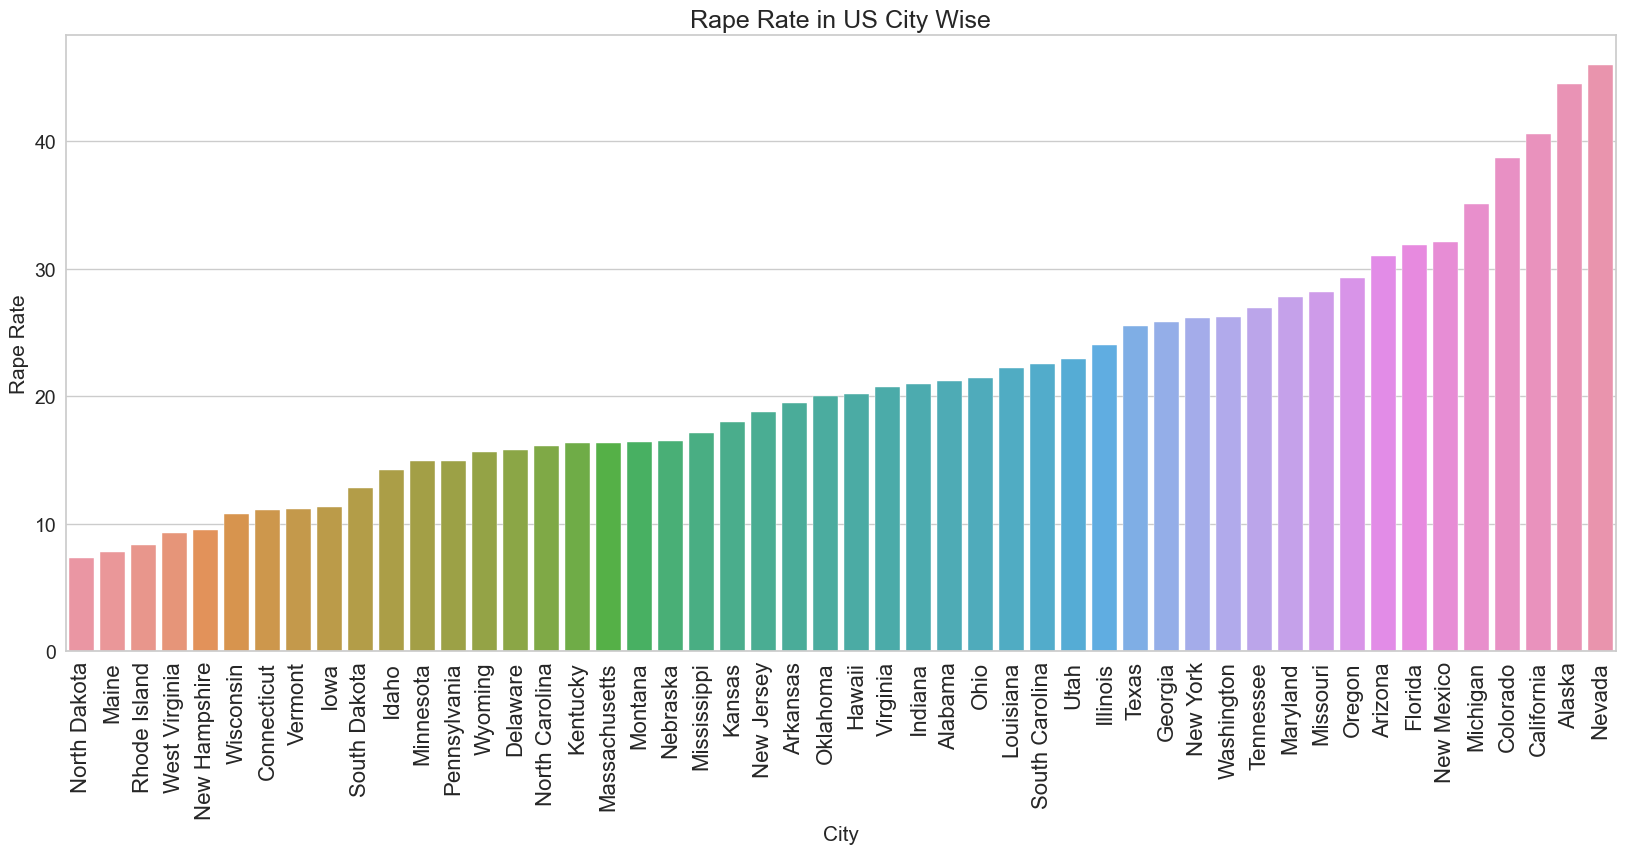

In [42]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x="City",
            y="Rape", 
            data=data, 
            order=data.sort_values("Rape").City)
# set labels
plt.xlabel("City", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US City Wise", size=18)
plt.show()


In [43]:
# Top ten cities with high Rape rates.
print("Top 10 Cities with Highest Rape Rate")
data.sort_values("Rape",ascending=False, ignore_index=True).head(10)

Top 10 Cities with Highest Rape Rate


City  Murder  Assault  UrbanPop  Rape
0  Nevada      12.2    252      81        46.0
1  Alaska      10.0    263      48        44.5
2  California  9.0     276      91        40.6
3  Colorado    7.9     204      78        38.7
4  Michigan    12.1    255      74        35.1
5  New Mexico  11.4    285      70        32.1
6  Florida     15.4    335      80        31.9
7  Arizona     8.1     294      80        31.0
8  Oregon      4.9     159      67        29.3
9  Missouri    9.0     178      70        28.2

In [44]:
# Top ten cities with lowest Rape rates.
print("Top 10 Cities with Lowest Rape Rate")
data.sort_values("Rape",ascending=True, ignore_index=True).head(10)

Top 10 Cities with Lowest Rape Rate


City  Murder  Assault  UrbanPop  Rape
0  North Dakota   0.8     45       44        7.3 
1  Maine          2.1     83       51        7.8 
2  Rhode Island   3.4     174      87        8.3 
3  West Virginia  5.7     81       39        9.3 
4  New Hampshire  2.1     57       56        9.5 
5  Wisconsin      2.6     53       66        10.8
6  Connecticut    3.3     110      77        11.1
7  Vermont        2.2     48       32        11.2
8  Iowa           2.2     56       57        11.3
9  South Dakota   3.8     86       45        12.8

In [45]:
Rape = data.sort_values("Rape", ascending = False)

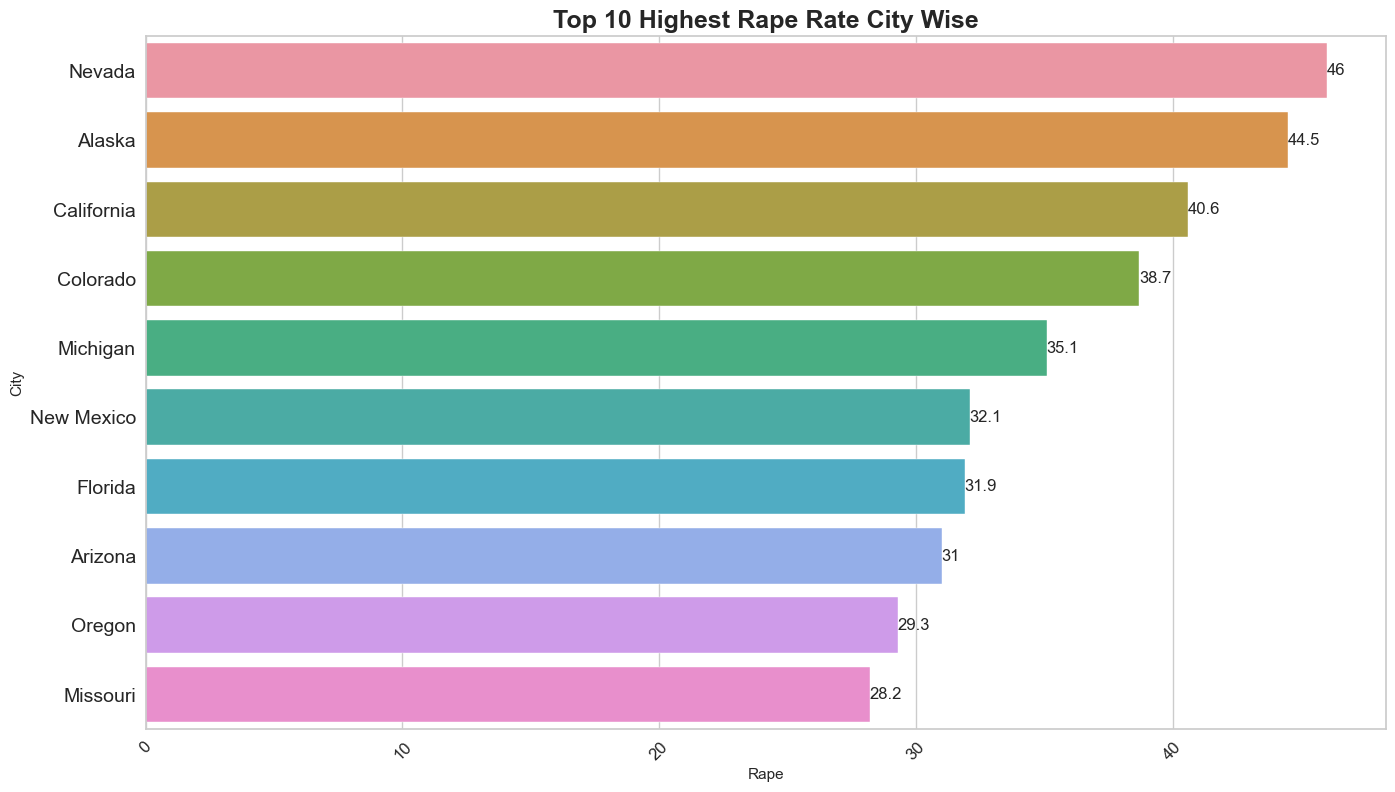

In [46]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.City[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Highest Rape Rate City Wise",  fontsize = 18, fontweight = "bold")
for i in ax.containers:
    ax.bar_label(i,)


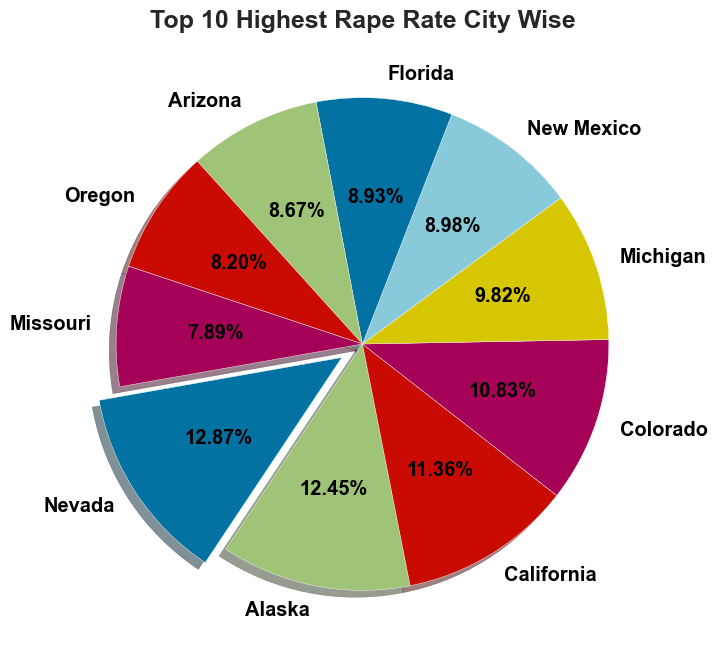

In [47]:
plt.figure(figsize = (8,8))
plt.pie(Rape.Rape[:10],
       labels=Rape.City[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= "%.2f%%",
       shadow= True,
       startangle= 190,
       textprops = {"size":"large",
                   "fontweight":"bold",
                    "rotation":"horizontal",
                   "color":"black"})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Rape Rate City Wise", fontsize = 18, fontweight = "bold")
plt.show()

In [48]:
rape = data.sort_values("Rape", ascending = True)

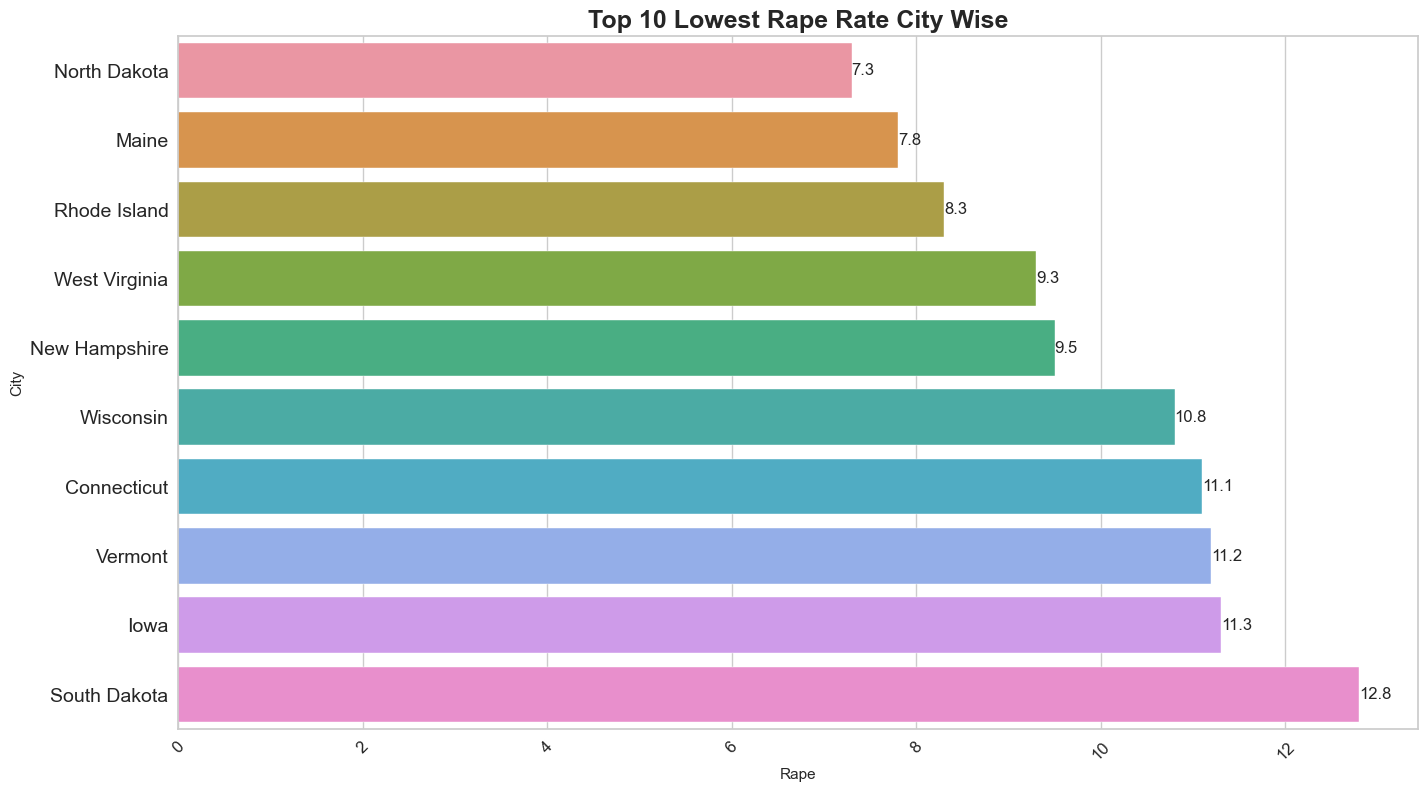

In [49]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = rape.Rape[:10], y = rape.City[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Lowest Rape Rate City Wise",  fontsize = 18, fontweight = "bold")
for i in ax.containers:
    ax.bar_label(i,)

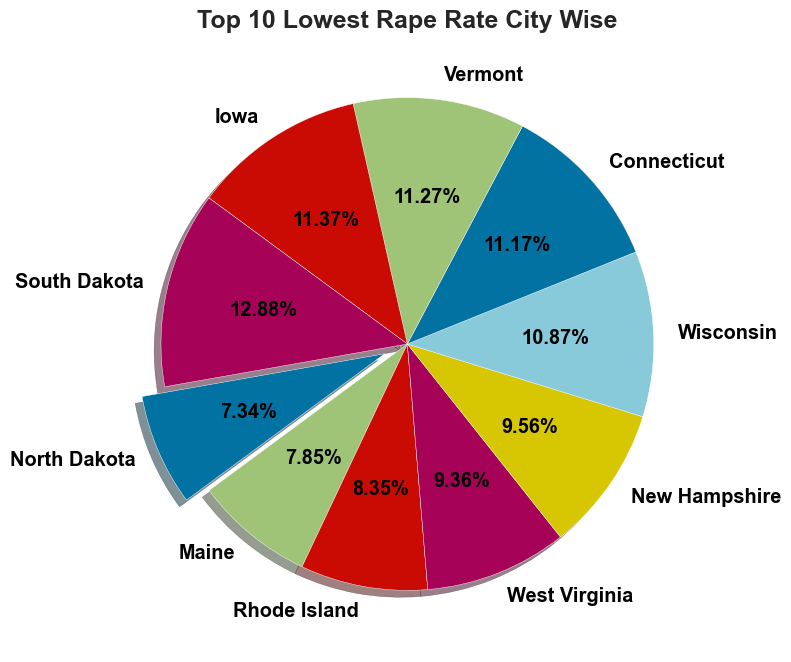

In [50]:
plt.figure(figsize = (8,8))
plt.pie(rape.Rape[:10],
       labels=rape.City[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= "%.2f%%",
       shadow= True,
       startangle= 190,
       textprops = {"size":"large",
                   "fontweight":"bold",
                    "rotation":"horizontal",
                   "color":"black"})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Rape Rate City Wise", fontsize = 18, fontweight = "bold")
plt.show()

Observations:

- Highest Rape Rate : Nevada, Alaska and California
- Lowest Rape Rate : North Dakota, Maine and Rhode Island.

# 4.4 Urban Population Rate

In [51]:
data.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

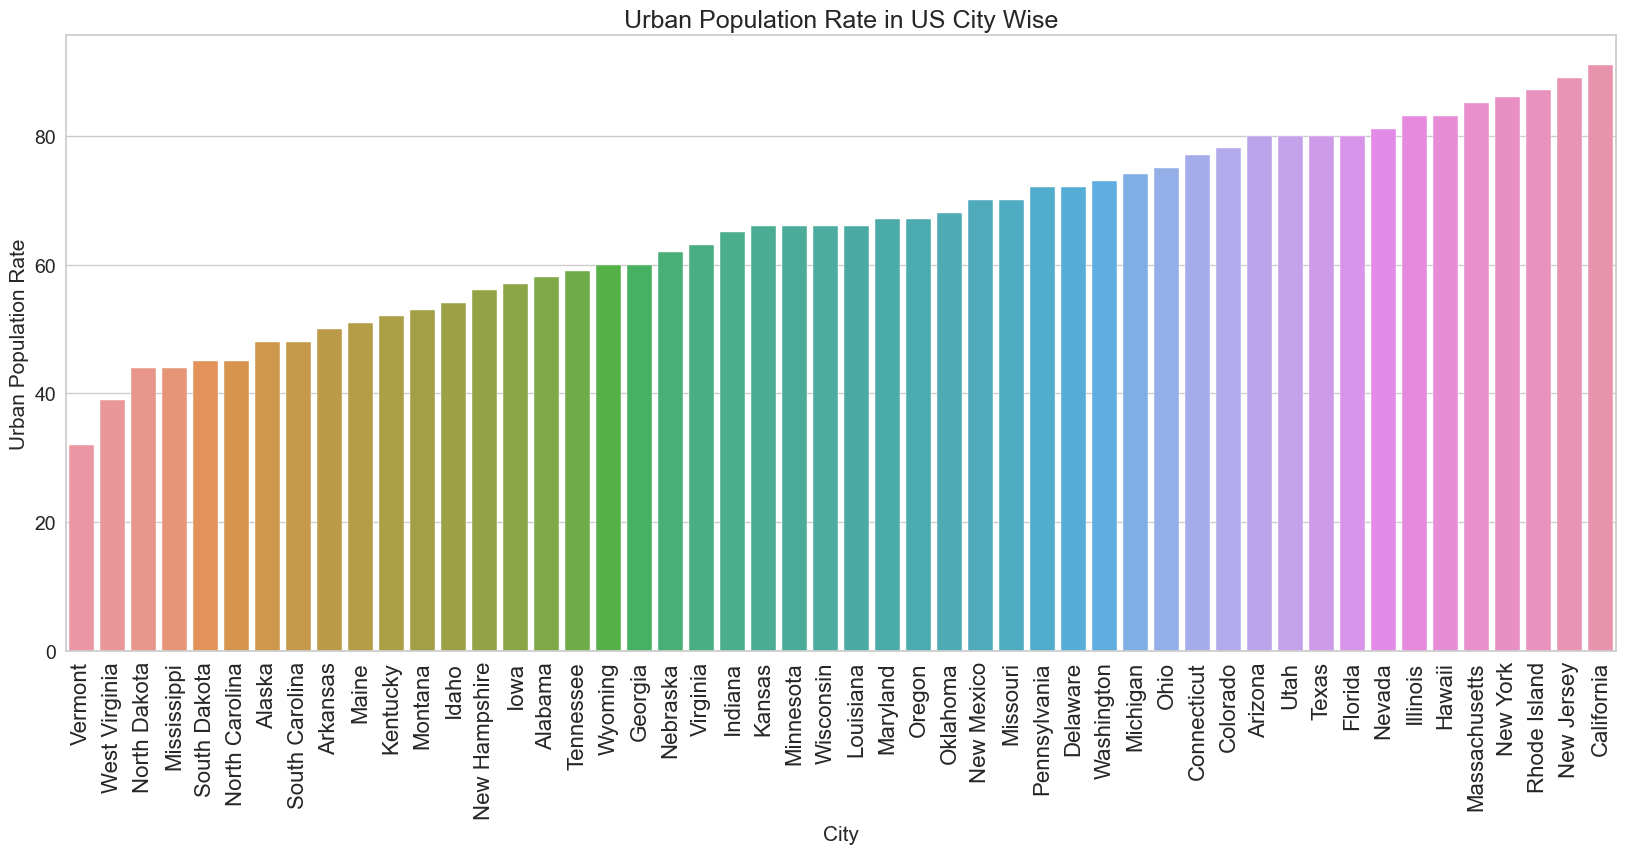

In [52]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x="City",
            y="UrbanPop", 
            data=data, 
            order=data.sort_values("UrbanPop").City)
# set labels
plt.xlabel("City", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US City Wise", size=18)
plt.show()


In [53]:
# Get top ten cities with the highest Urban Population rate.
print("Top 10 Cities with Highest Urban Population Rate")
data.sort_values("UrbanPop",ascending=False, ignore_index=True).head(10)

Top 10 Cities with Highest Urban Population Rate


City  Murder  Assault  UrbanPop  Rape
0  California     9.0     276      91        40.6
1  New Jersey     7.4     159      89        18.8
2  Rhode Island   3.4     174      87        8.3 
3  New York       11.1    254      86        26.1
4  Massachusetts  4.4     149      85        16.3
5  Hawaii         5.3     46       83        20.2
6  Illinois       10.4    249      83        24.0
7  Nevada         12.2    252      81        46.0
8  Texas          12.7    201      80        25.5
9  Arizona        8.1     294      80        31.0

In [54]:
# Get top ten cities with the lowest Urban Population rate.
print("Top 10 Cities with Lowest Urban Population Rate")
data.sort_values("UrbanPop",ascending=True, ignore_index=True).head(10)

Top 10 Cities with Lowest Urban Population Rate


City  Murder  Assault  UrbanPop  Rape
0  Vermont         2.2     48       32        11.2
1  West Virginia   5.7     81       39        9.3 
2  North Dakota    0.8     45       44        7.3 
3  Mississippi     16.1    259      44        17.1
4  South Dakota    3.8     86       45        12.8
5  North Carolina  13.0    337      45        16.1
6  Alaska          10.0    263      48        44.5
7  South Carolina  14.4    279      48        22.5
8  Arkansas        8.8     190      50        19.5
9  Maine           2.1     83       51        7.8

In [55]:
urbanpop = data.sort_values("UrbanPop", ascending = False)

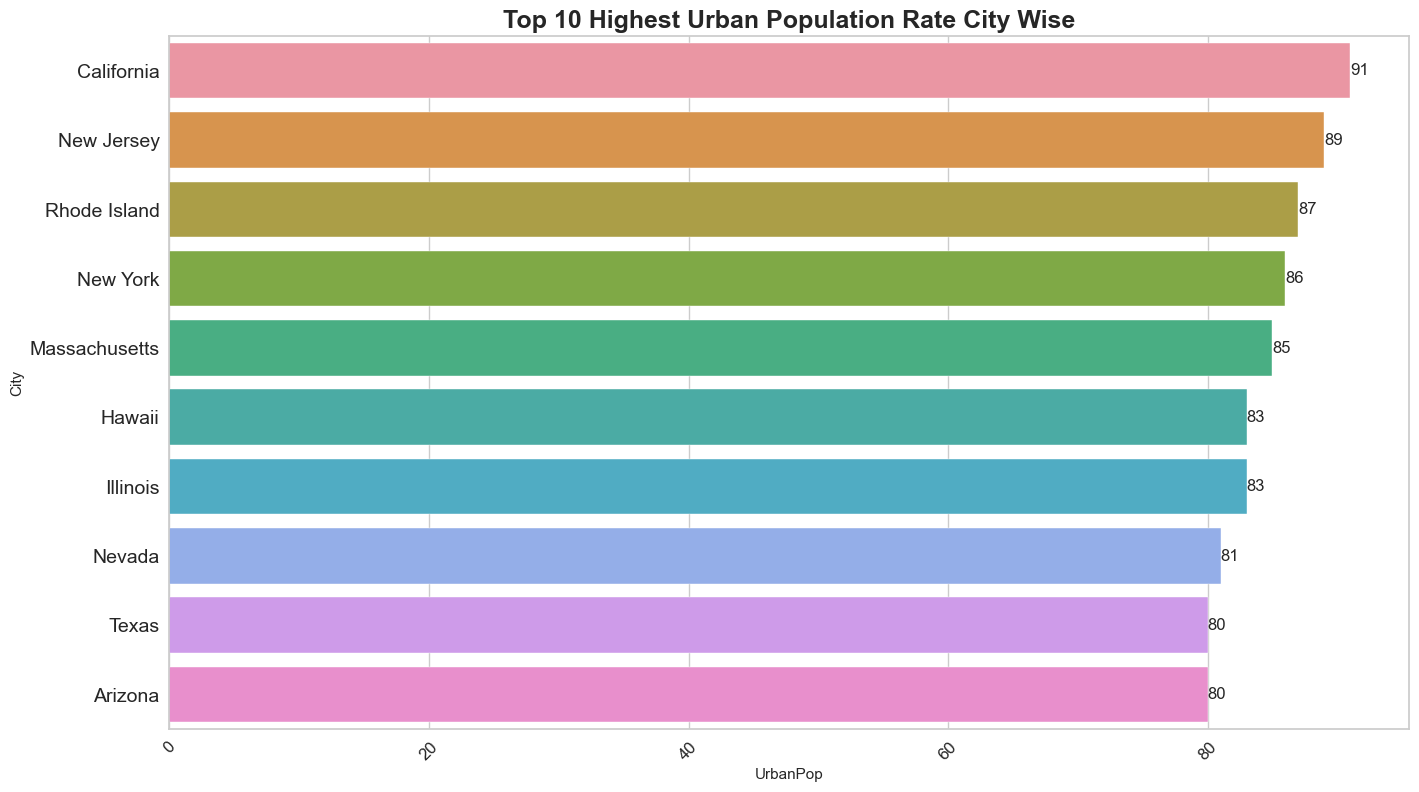

In [56]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.City[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Highest Urban Population Rate City Wise",  fontsize = 18, fontweight = "bold")
for i in ax.containers:
    ax.bar_label(i,)

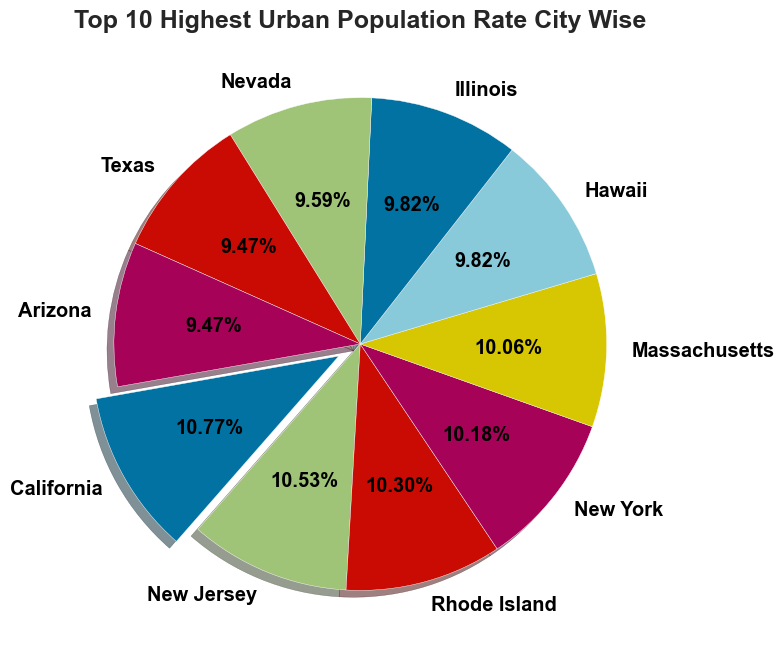

In [57]:
plt.figure(figsize = (8,8))
plt.pie(urbanpop.UrbanPop[:10],
       labels=urbanpop.City[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= "%.2f%%",
       shadow= True,
       startangle= 190,
       textprops = {"size":"large",
                   "fontweight":"bold",
                    "rotation":"horizontal",
                   "color":"black"})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Urban Population Rate City Wise", fontsize = 18, fontweight = "bold")
plt.show()

In [58]:
UrbanPop = data.sort_values("UrbanPop", ascending = True)

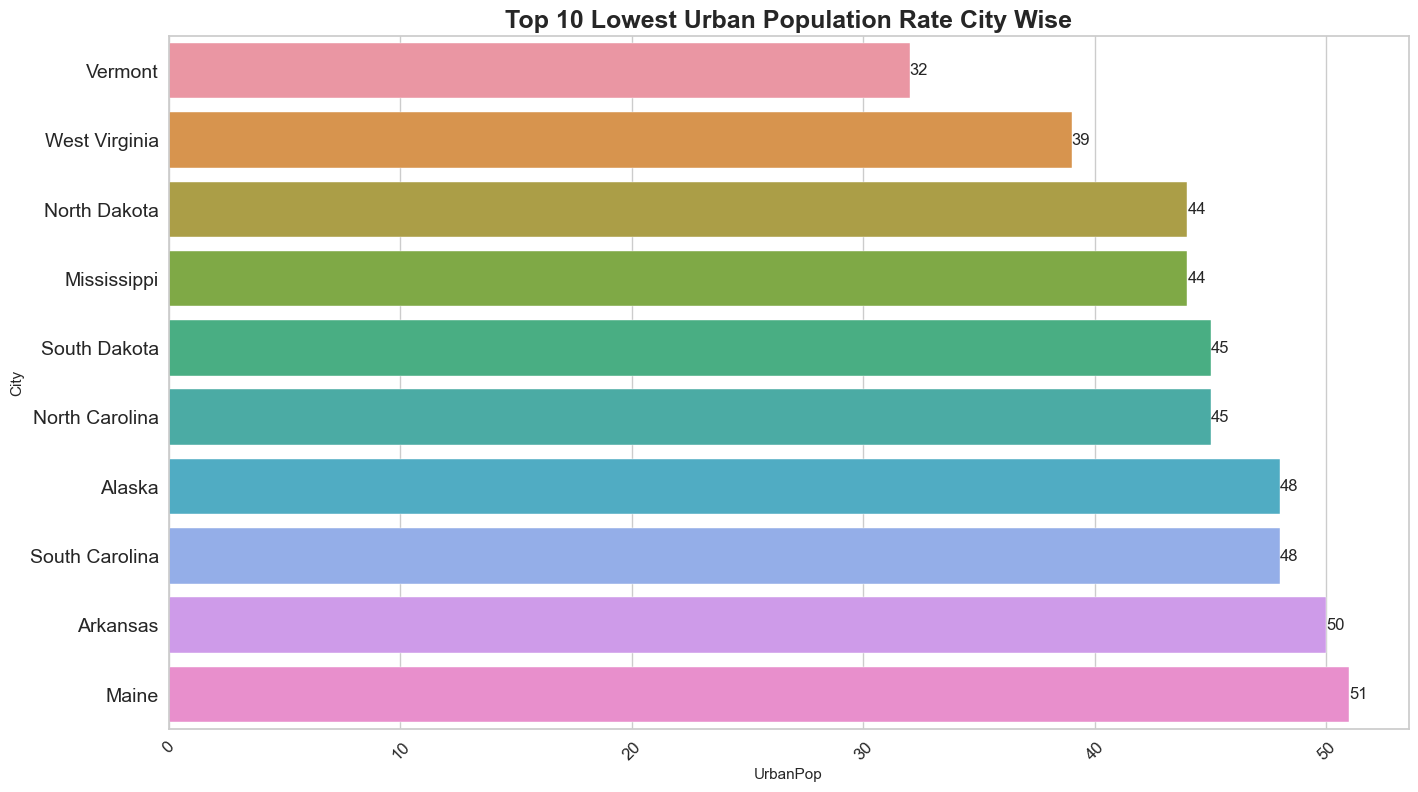

In [59]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = UrbanPop.UrbanPop[:10], y = UrbanPop.City[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Lowest Urban Population Rate City Wise",  fontsize = 18, fontweight = "bold")
for i in ax.containers:
    ax.bar_label(i,)

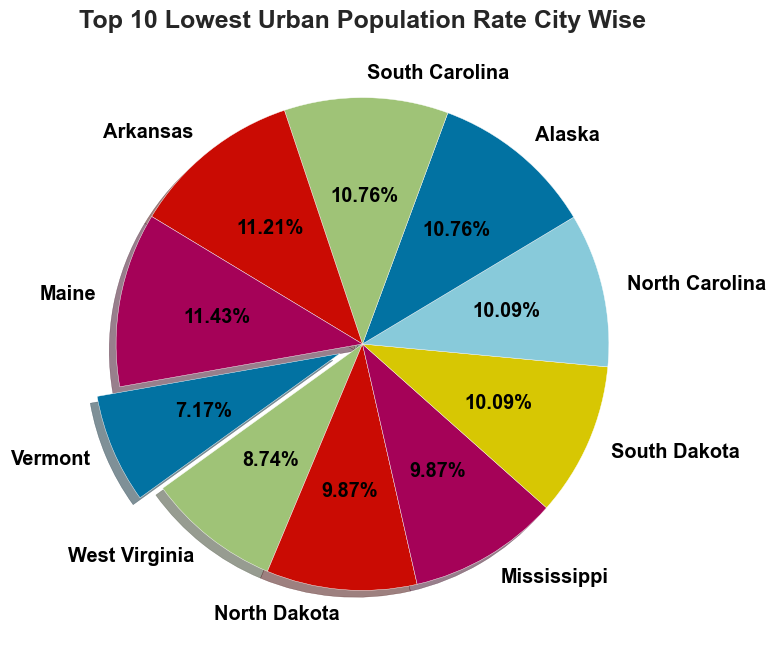

In [60]:
plt.figure(figsize = (8,8))
plt.pie(UrbanPop.UrbanPop[:10],
       labels=UrbanPop.City[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= "%.2f%%",
       shadow= True,
       startangle= 190,
       textprops = {"size":"large",
                   "fontweight":"bold",
                    "rotation":"horizontal",
                   "color":"black"})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Urban Population Rate City Wise", fontsize = 18, fontweight = "bold")
plt.show()

Observations:
- Highest Urban Population Rate : California, New Jersey and Rhode Island
- Lowest Urban Population Rate : Vermount, West Virginia and North Dakota.

# 5. Data Preprocessing

# 5.1 Standardizing the Data

In [61]:
df = data.set_index("City")
df.head()

Murder  Assault  UrbanPop  Rape
City                                       
Alabama     13.2    236      58        21.2
Alaska      10.0    263      48        44.5
Arizona     8.1     294      80        31.0
Arkansas    8.8     190      50        19.5
California  9.0     276      91        40.6

In [62]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

# 5.2 Normalizing the data

In [63]:
# Using Minmaxscaler for accuracy result comparison

minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

# CLUSTERING

2 Clustering techniques and analysis

The two clustering techniques are: Kmeans and Hierarchical

# 6. KMeans Clustering

After all the analyses we now start with the K-Means Clustering procedure.

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

1. Centroids of newly formed clusters do not change.
2. Points remain in the same cluster.
3. Maximum number of iterations are reached.

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

# 6.1 Elbow Method for Determining Cluster Amount

# Standard Scaler Applied on Data

Scatter plots with the different combinations of the variables.

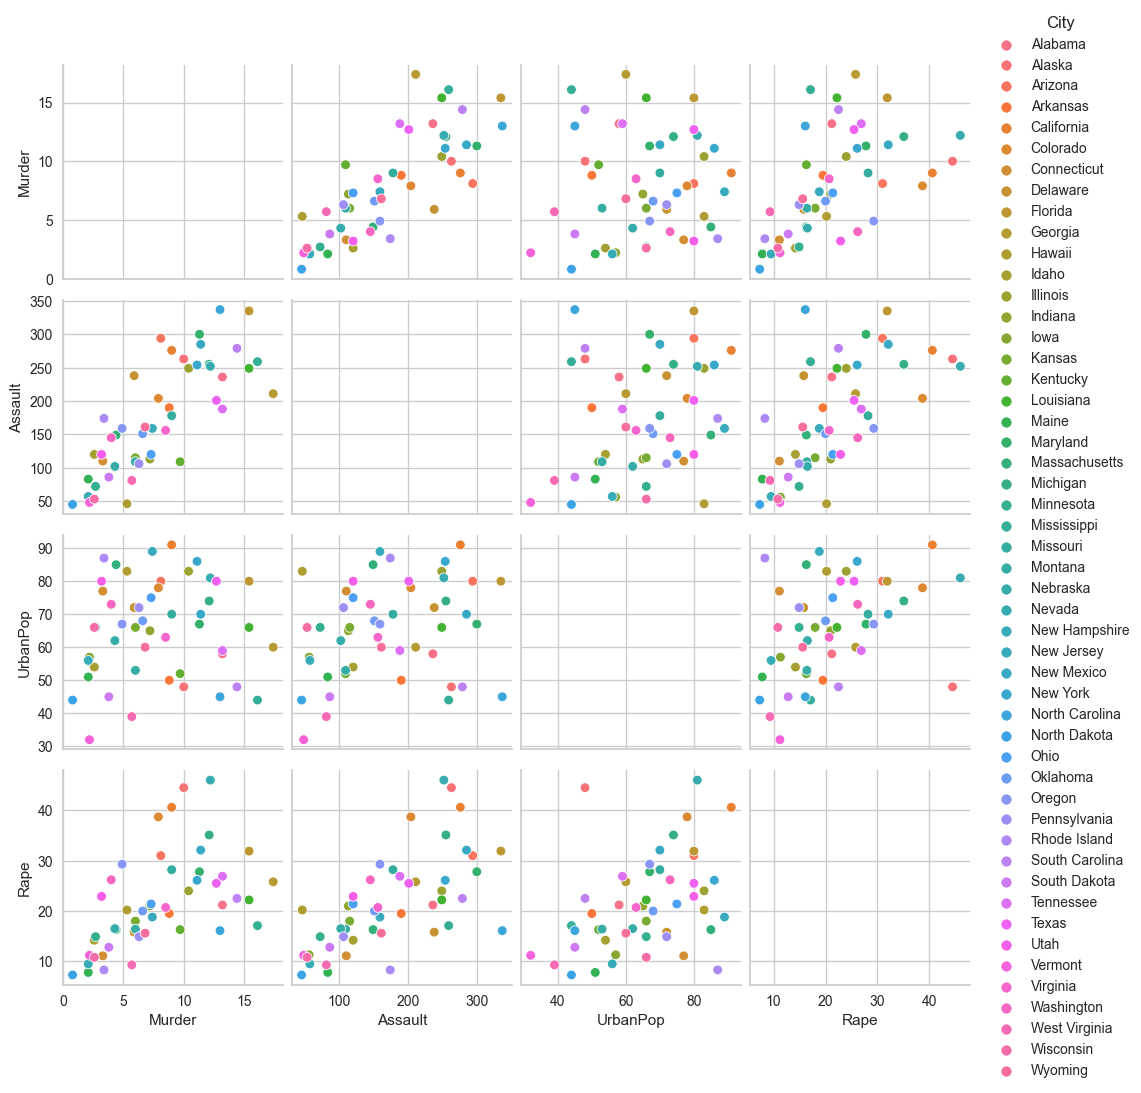

In [64]:
# Pairplot with hue Species
sns.pairplot(data, hue ="City") 

In [65]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             200.000000    
1   2             104.961633    
2   3             80.085695     
3   4             57.554259     
4   5             49.969203     
5   6             44.541885     
6   7             40.075682     
7   8             36.407590     
8   9             31.205411     
9   10            28.589106     
10  11            24.570467     
11  12            22.273819     
12  13            21.305128     
13  14            19.402089

A Scree plot is a plot between WCSS (Within cluster sum of squares) and number of clusters. Without sound domain knowledge or in the scenarios with unclear motives, the scree plots help us decide the number of clusters to specify.

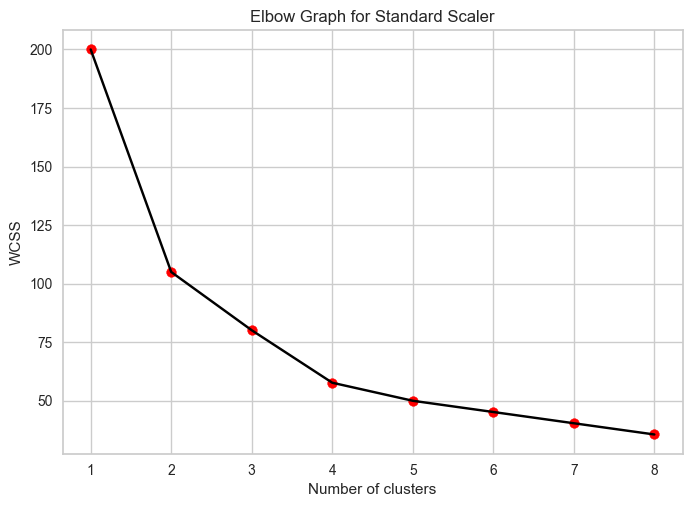

In [66]:
# Scree plot
# Within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = "black")
plt.scatter(range(1,9),wcss,color="red")
plt.title("Elbow Graph for Standard Scaler")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# 6.2 Silhouette Score

# Silhouette coefficient

- The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

For each observation i, the silhouette width si is calculated as follows:

For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs.
For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. The smallest of these d(i,C) is defined as bi=minCd(i,C). The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.

- Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).\

Silhouette width can be interpreted as follow:

- Observations with a large Si (almost 1) are very well clustered.
- A small Si (around 0) means that the observation lies between two clusters.
- Observations with a negative Si are probably placed in the wrong cluster.

Elbow Plot for Standard Scaler data


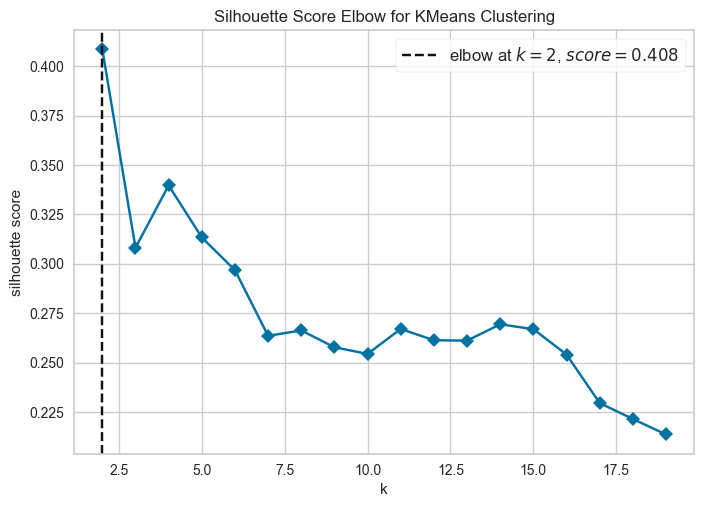

In [67]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init="k-means++")

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric="silhouette", timings=False)
# Fit the data and visualize
print("Elbow Plot for Standard Scaler data")
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [68]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


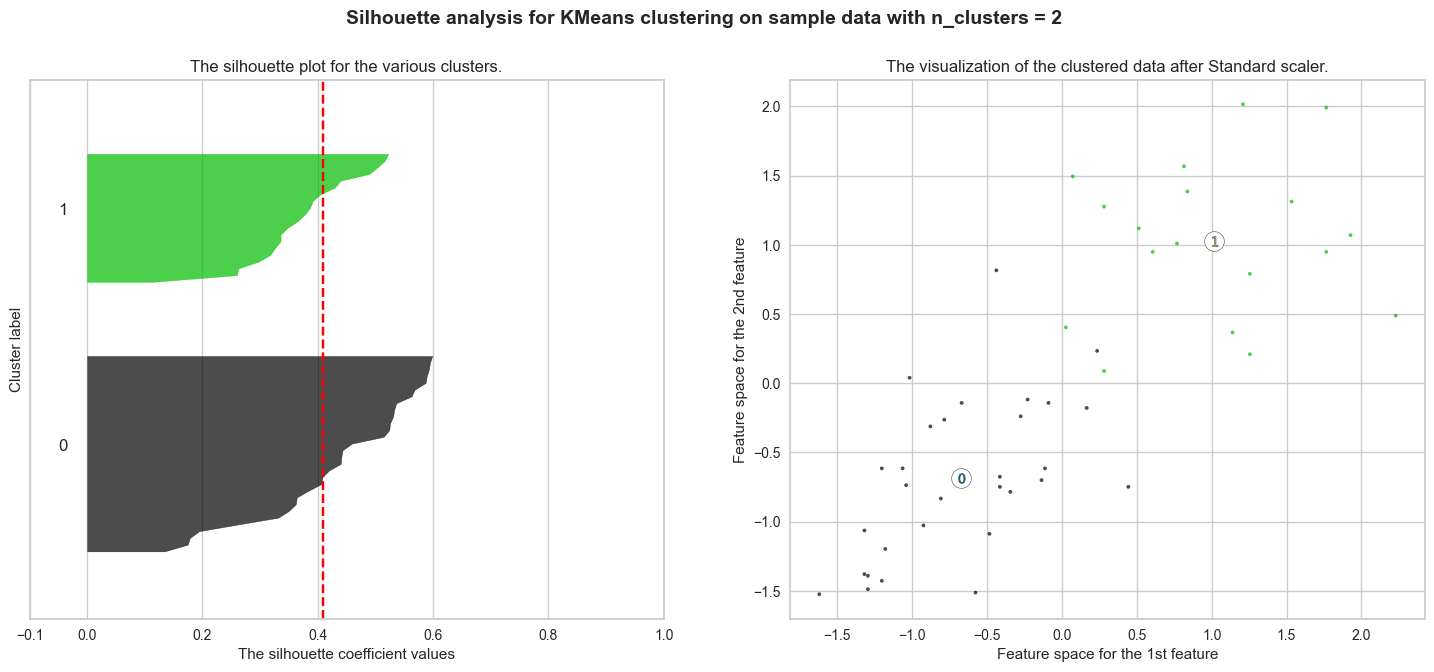

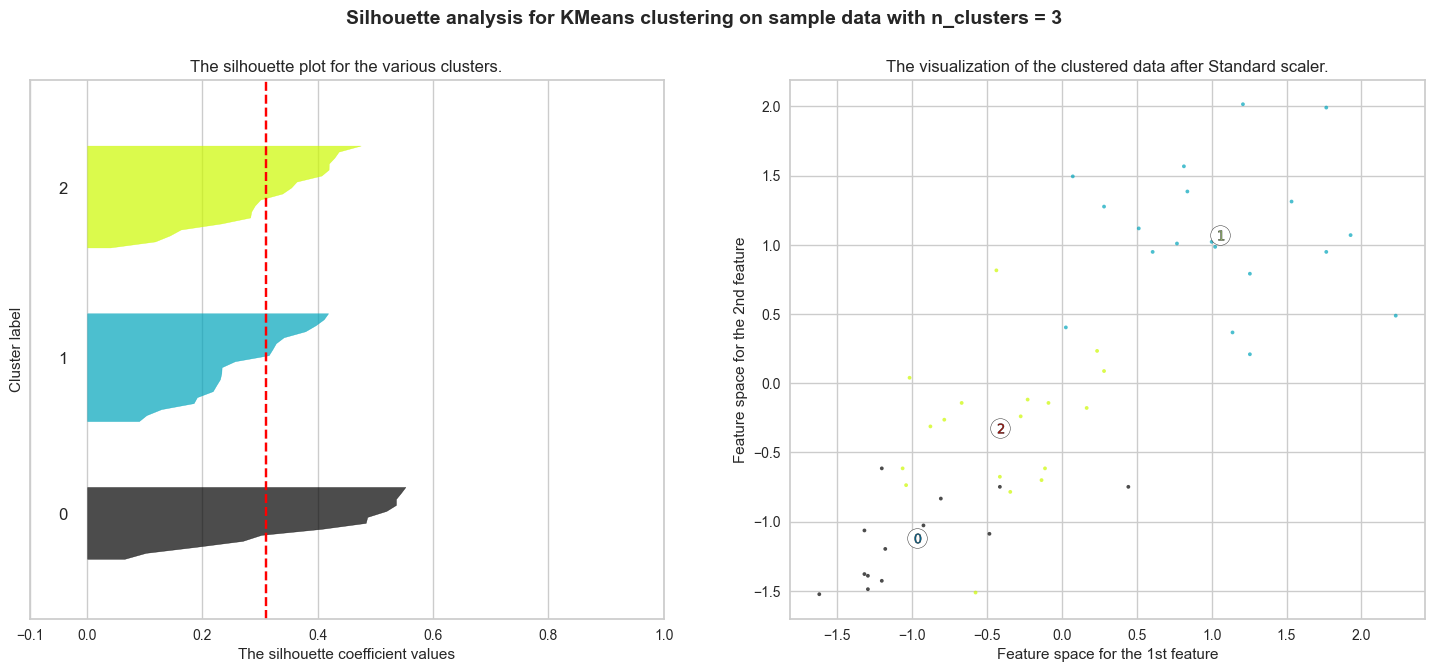

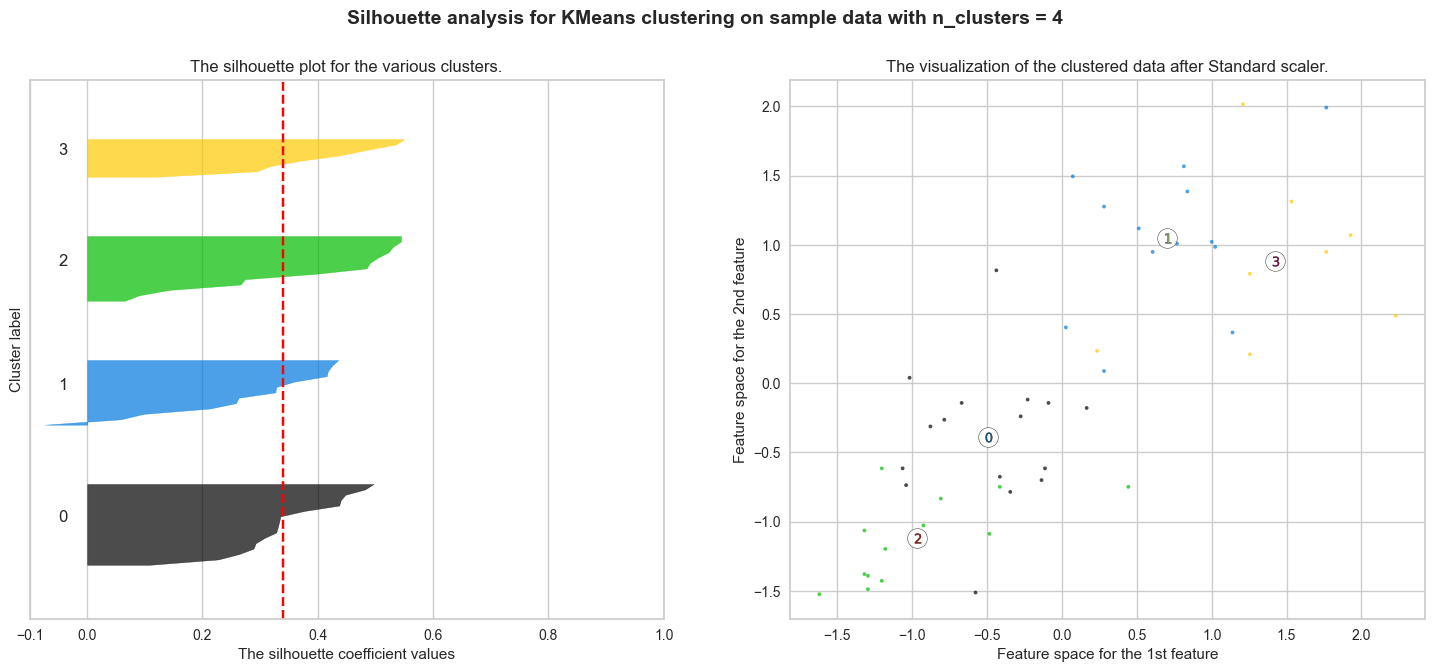

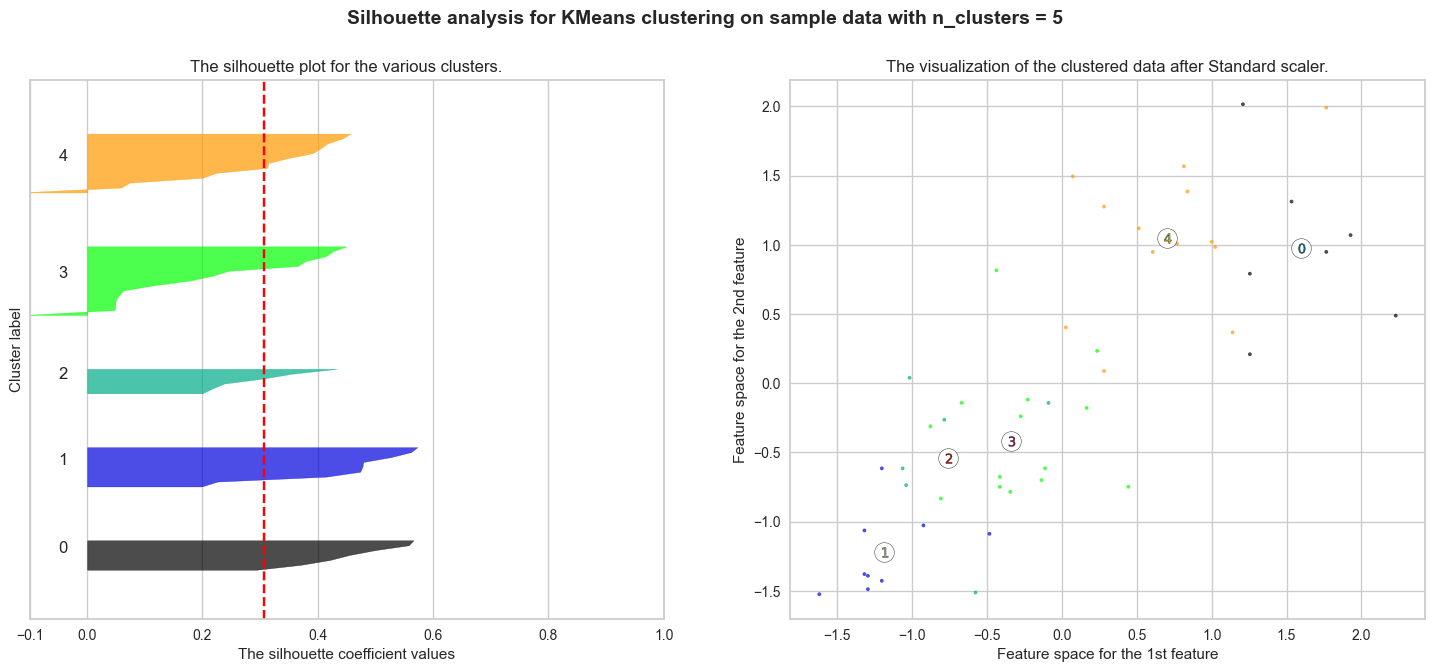

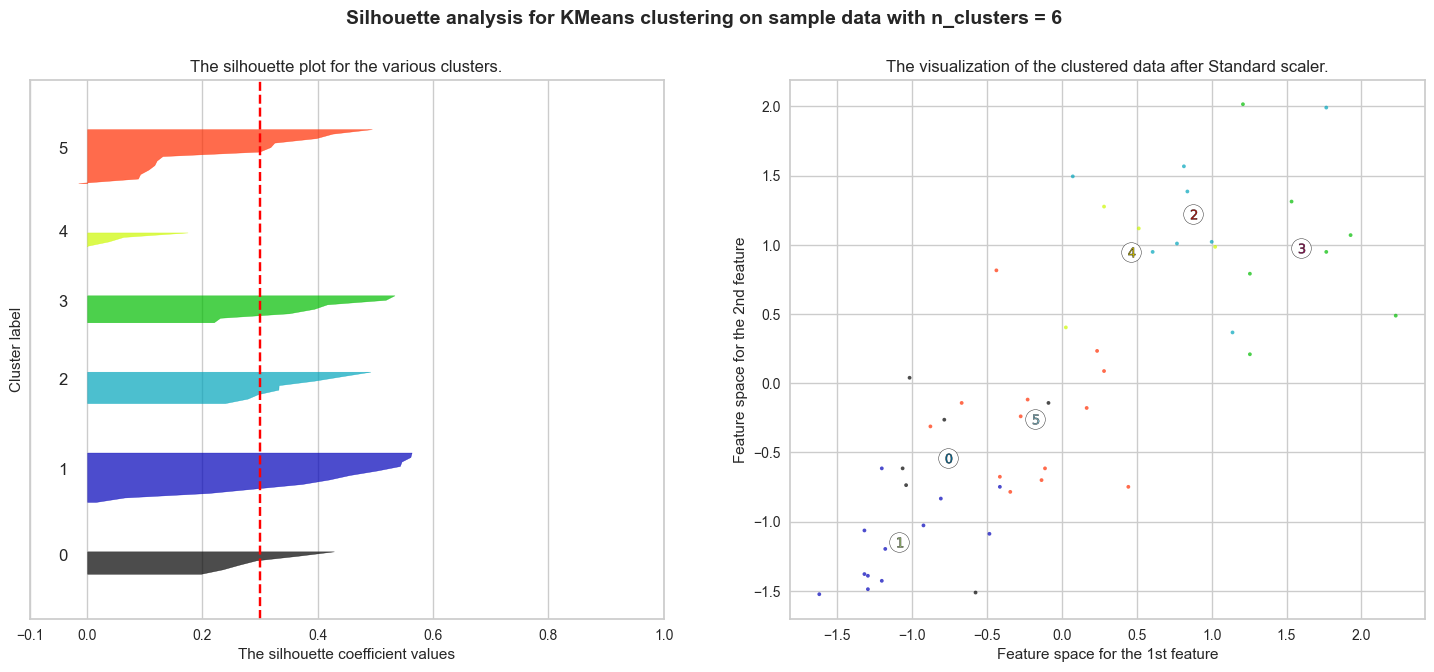

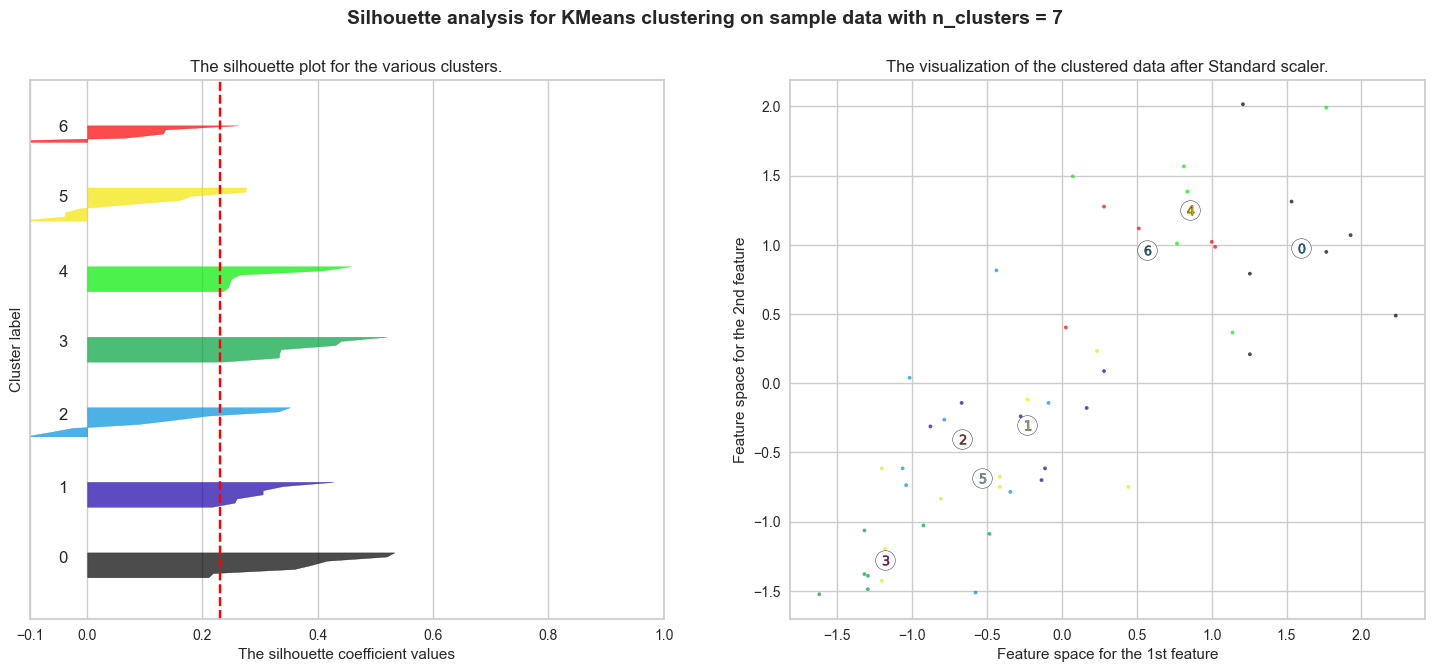

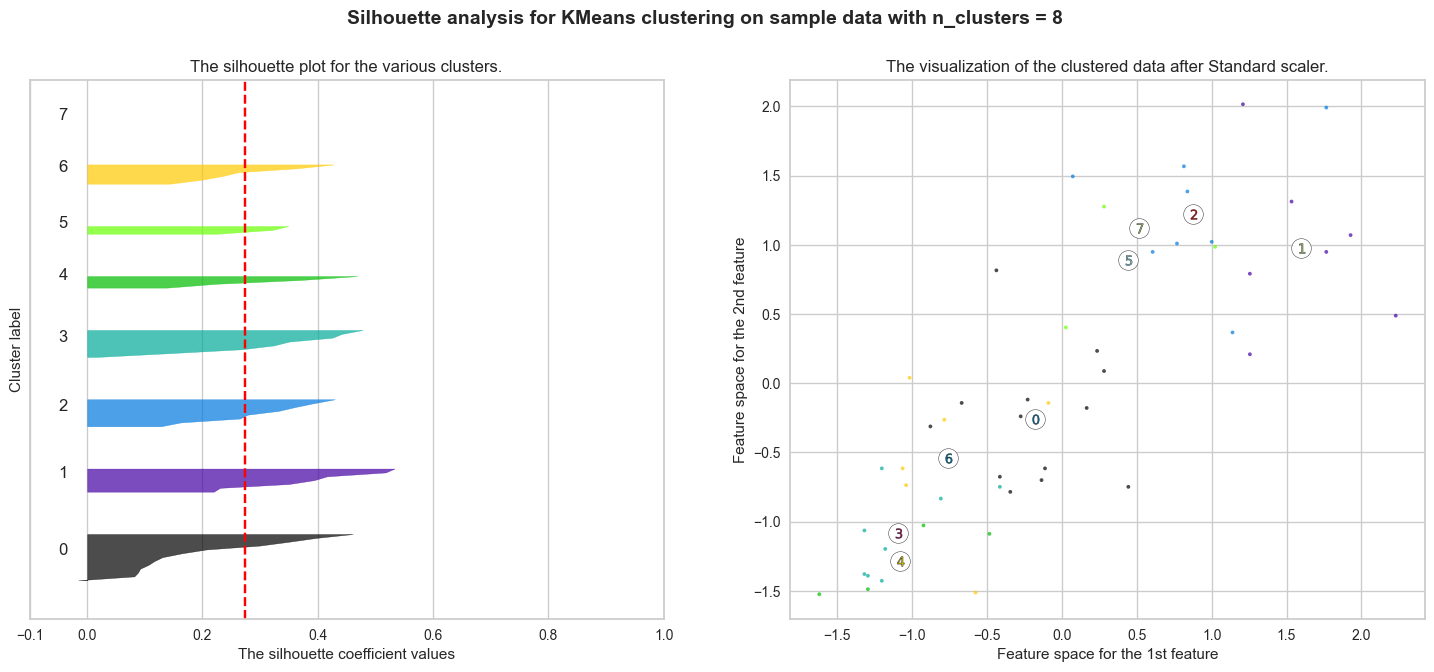

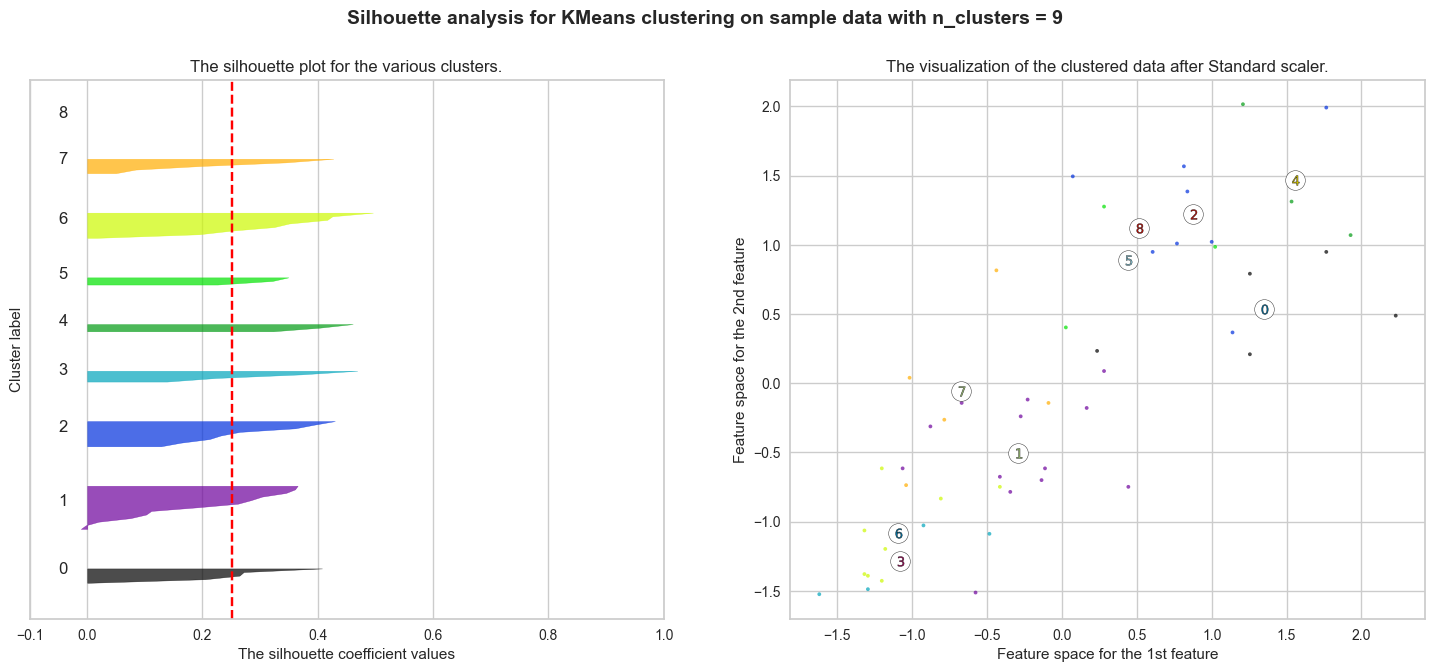

In [69]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker=".", s=30, lw=0, alpha=0.7,
                c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker="o",
                c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1,
                    s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight="bold")

plt.show()
        
       

Conclusion:

According the the silhouette score of:

The standardized data, although the ideal number of clusters is 2, with a score higher than other options, of 0.40. we will go for 3 number of clusters

# 6.3 Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset

In [71]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init="k-means++")
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [72]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [73]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [74]:
# Within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

80.0888613219962

In [75]:
# Assign clusters to the data set
df["Kmeans_label"] = model_kmeans.labels_

In [76]:
# Group data by Clusters (K=6)
df.groupby("Kmeans_label").agg(["mean"])

Murder     Assault   UrbanPop       Rape
                   mean        mean       mean       mean
Kmeans_label                                             
0             3.600000   78.538462   52.076923  12.176923
1             12.331579  259.315789  68.315789  29.215789
2             6.016667   143.888889  72.333333  19.344444

In [77]:
df[df["Kmeans_label"]==0]

Murder  Assault  UrbanPop  Rape  Kmeans_label
City                                                        
Idaho          2.6     120      54        14.2  0           
Iowa           2.2     56       57        11.3  0           
Kentucky       9.7     109      52        16.3  0           
Maine          2.1     83       51        7.8   0           
Minnesota      2.7     72       66        14.9  0           
Montana        6.0     109      53        16.4  0           
Nebraska       4.3     102      62        16.5  0           
New Hampshire  2.1     57       56        9.5   0           
North Dakota   0.8     45       44        7.3   0           
South Dakota   3.8     86       45        12.8  0           
Vermont        2.2     48       32        11.2  0           
West Virginia  5.7     81       39        9.3   0           
Wisconsin      2.6     53       66        10.8  0

In [78]:
df[df["Kmeans_label"]==1]

Murder  Assault  UrbanPop  Rape  Kmeans_label
City                                                         
Alabama         13.2    236      58        21.2  1           
Alaska          10.0    263      48        44.5  1           
Arizona         8.1     294      80        31.0  1           
California      9.0     276      91        40.6  1           
Colorado        7.9     204      78        38.7  1           
Florida         15.4    335      80        31.9  1           
Georgia         17.4    211      60        25.8  1           
Illinois        10.4    249      83        24.0  1           
Louisiana       15.4    249      66        22.2  1           
Maryland        11.3    300      67        27.8  1           
Michigan        12.1    255      74        35.1  1           
Mississippi     16.1    259      44        17.1  1           
Nevada          12.2    252      81        46.0  1           
New Mexico      11.4    285      70        32.1  1           
New York        11.1    254      86        26.1  1           
North Carolina  13.0    337      45        16.1  1           
South Carolina  14.4    279      48        22.5  1           
Tennessee       13.2    188      59        26.9  1           
Texas           12.7    201      80        25.5  1

In [79]:
df[df["Kmeans_label"]==2]

Murder  Assault  UrbanPop  Rape  Kmeans_label
City                                                        
Arkansas       8.8     190      50        19.5  2           
Connecticut    3.3     110      77        11.1  2           
Delaware       5.9     238      72        15.8  2           
Hawaii         5.3     46       83        20.2  2           
Indiana        7.2     113      65        21.0  2           
Kansas         6.0     115      66        18.0  2           
Massachusetts  4.4     149      85        16.3  2           
Missouri       9.0     178      70        28.2  2           
New Jersey     7.4     159      89        18.8  2           
Ohio           7.3     120      75        21.4  2           
Oklahoma       6.6     151      68        20.0  2           
Oregon         4.9     159      67        29.3  2           
Pennsylvania   6.3     106      72        14.9  2           
Rhode Island   3.4     174      87        8.3   2           
Utah           3.2     120      80        22.9  2           
Virginia       8.5     156      63        20.7  2           
Washington     4.0     145      73        26.2  2           
Wyoming        6.8     161      60        15.6  2

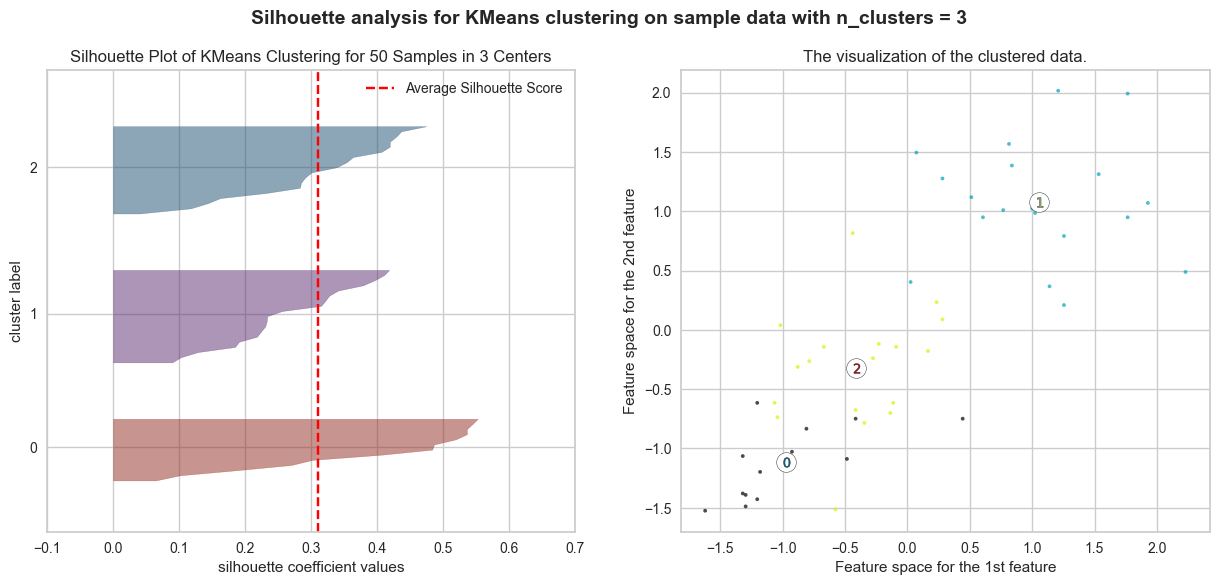

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=["#922B21","#5B2C6F","#1B4F72","#32a84a"])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 6 is number of clusters
ax2.scatter(std_df[:, 0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor="k")

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker="o",c="white", alpha=1, s=200, edgecolor="k")

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1,s=50, edgecolor="k")


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight="bold")

sil_visualizer1.show()
plt.show()

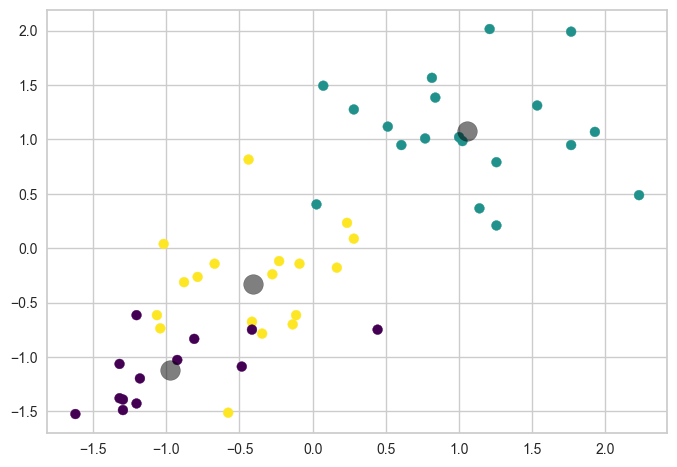

In [81]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

Observations:
    
- The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
- The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
- The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone

# 6.4 Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [82]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             13.184123     
1   2             6.596894      
2   3             5.010878      
3   4             3.690820      
4   5             3.185022      
5   6             2.882595      
6   7             2.580104      
7   8             2.352054      
8   9             2.115860      
9   10            2.013221      
10  11            1.694116      
11  12            1.564593      
12  13            1.386870      
13  14            1.269244

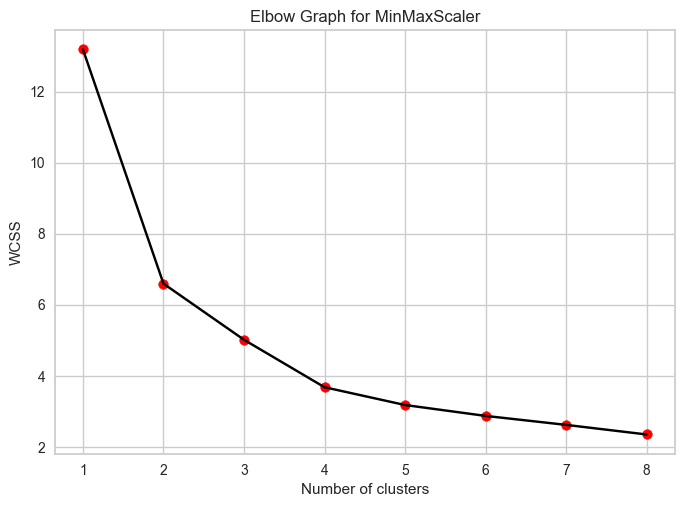

In [83]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = "black")
plt.scatter(range(1,9),wcss,color="red")
plt.title("Elbow Graph for MinMaxScaler")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Elbow Plot for MinMaxScaler data


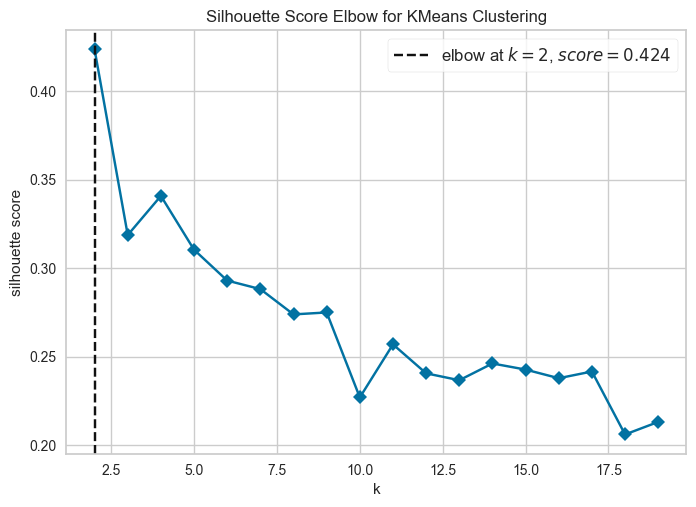

In [85]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init="k-means++")

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric="silhouette", timings=False)
# Fit the data and visualize
print("Elbow Plot for MinMaxScaler data")
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [86]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.31877550799979315
For n_clusters = 4 The average silhouette_score is : 0.3408903560074363
For n_clusters = 5 The average silhouette_score is : 0.3062742525752848
For n_clusters = 6 The average silhouette_score is : 0.2703558739205172
For n_clusters = 7 The average silhouette_score is : 0.23711197479268134
For n_clusters = 8 The average silhouette_score is : 0.24422345369104229
For n_clusters = 9 The average silhouette_score is : 0.23181794623773658


For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.31877550799979315
For n_clusters = 4 The average silhouette_score is : 0.3408903560074363
For n_clusters = 5 The average silhouette_score is : 0.31047828422452584
For n_clusters = 6 The average silhouette_score is : 0.29304639988963094
For n_clusters = 7 The average silhouette_score is : 0.28821826266004197
For n_clusters = 8 The average silhouette_score is : 0.27392502897414556
For n_clusters = 9 The average silhouette_score is : 0.27503190107418357


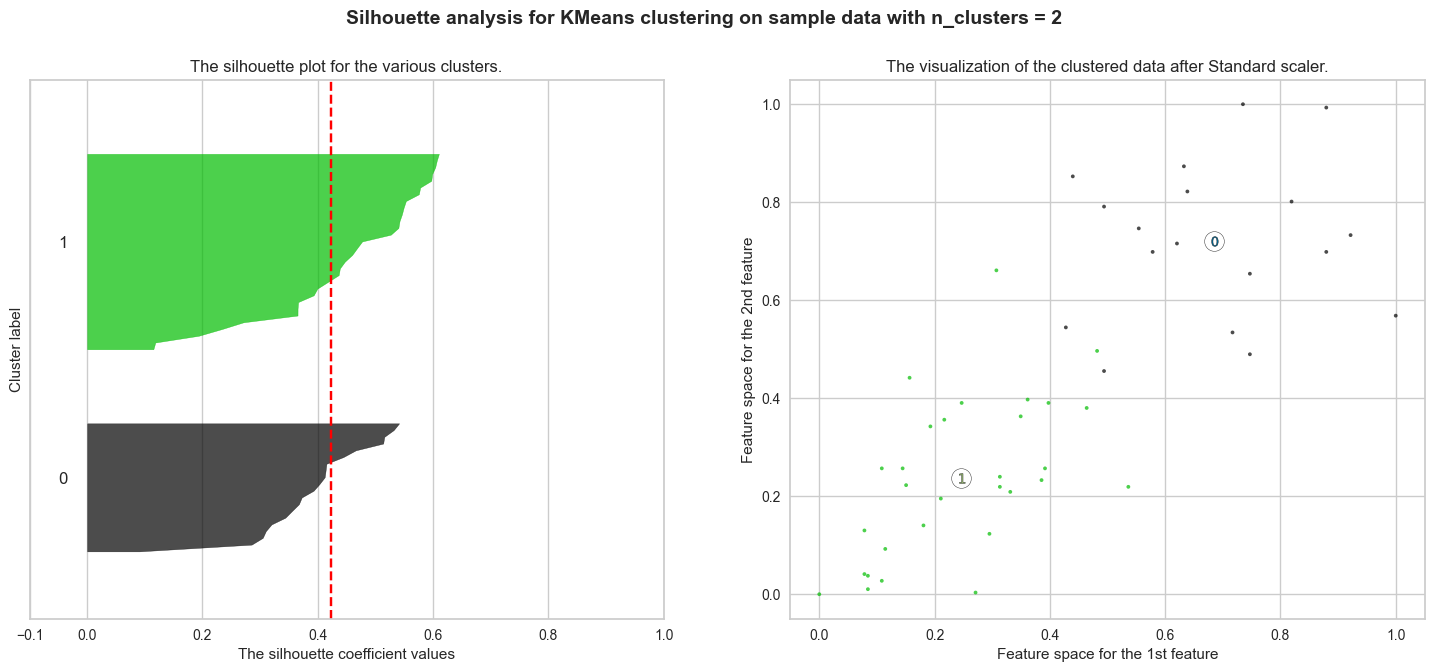

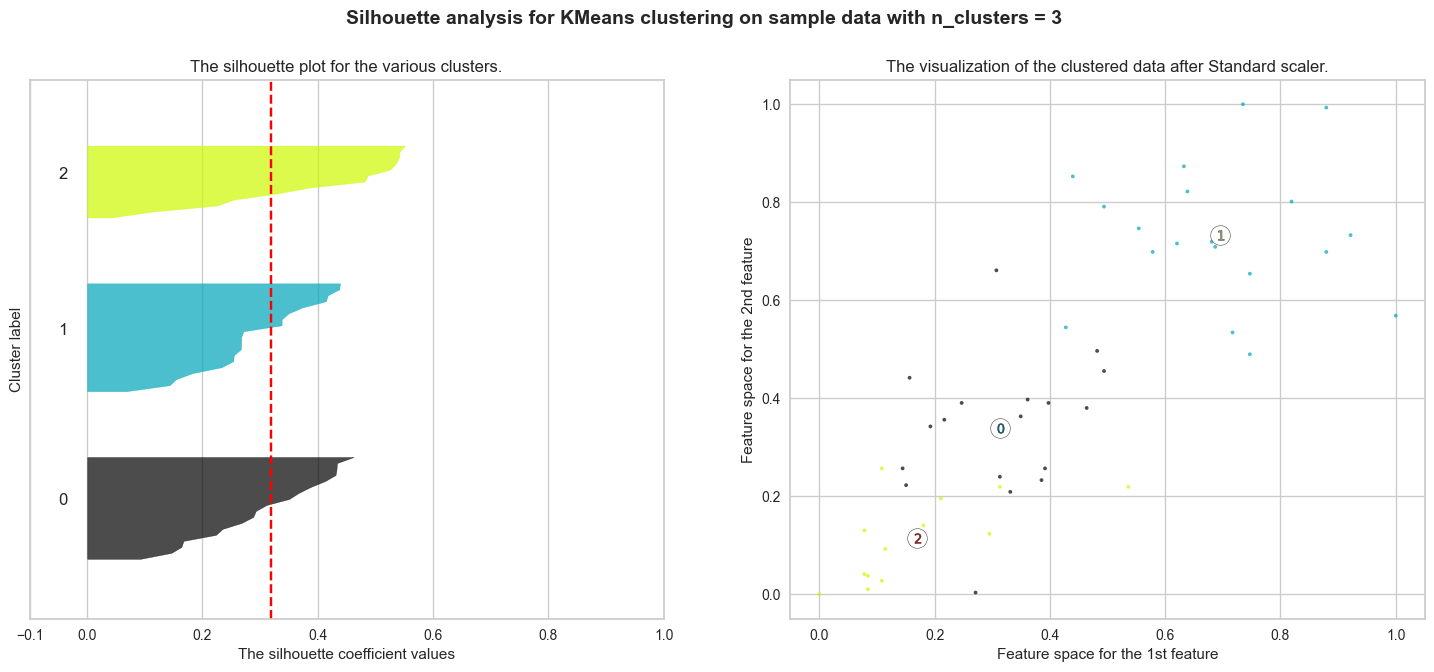

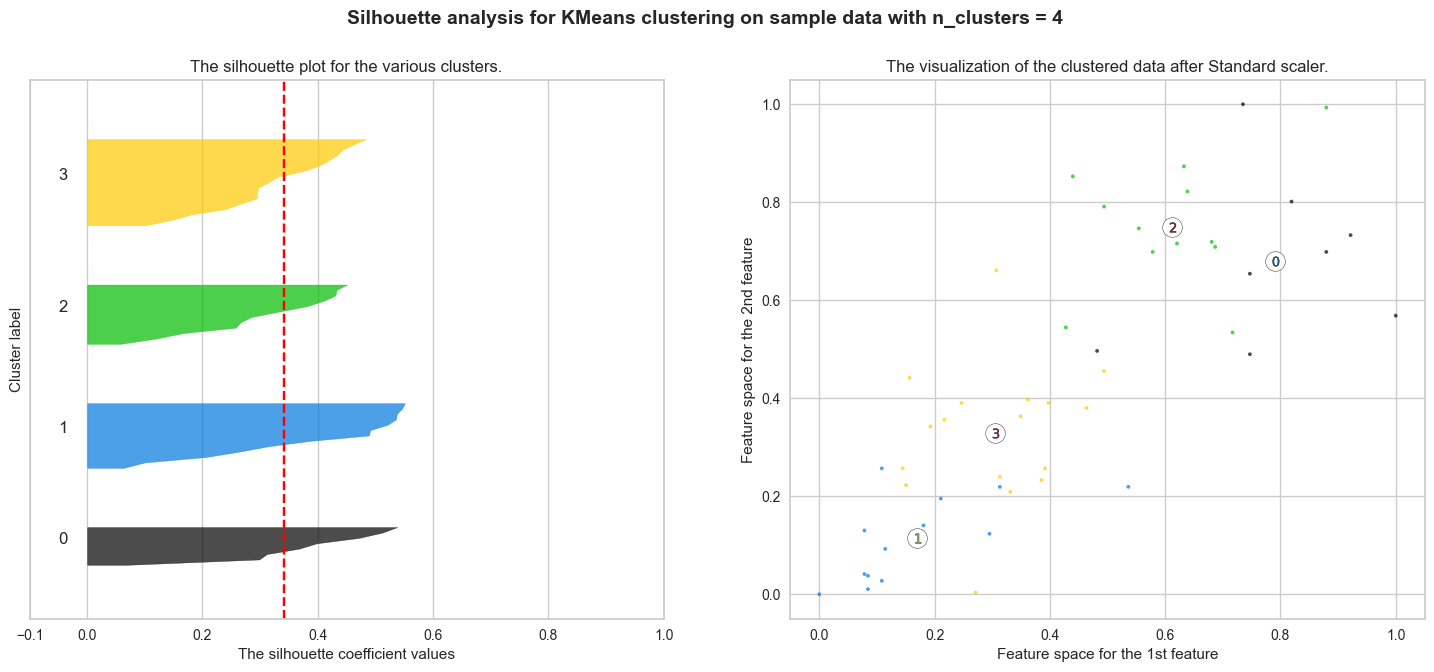

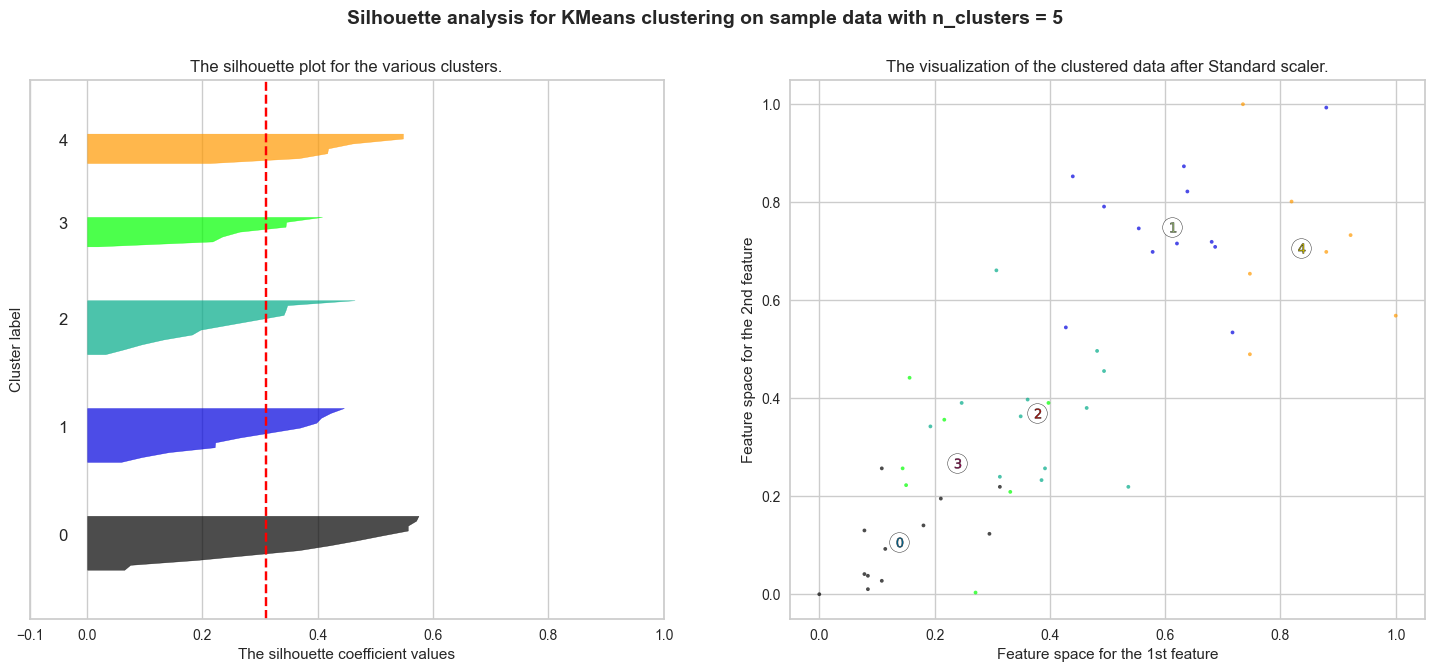

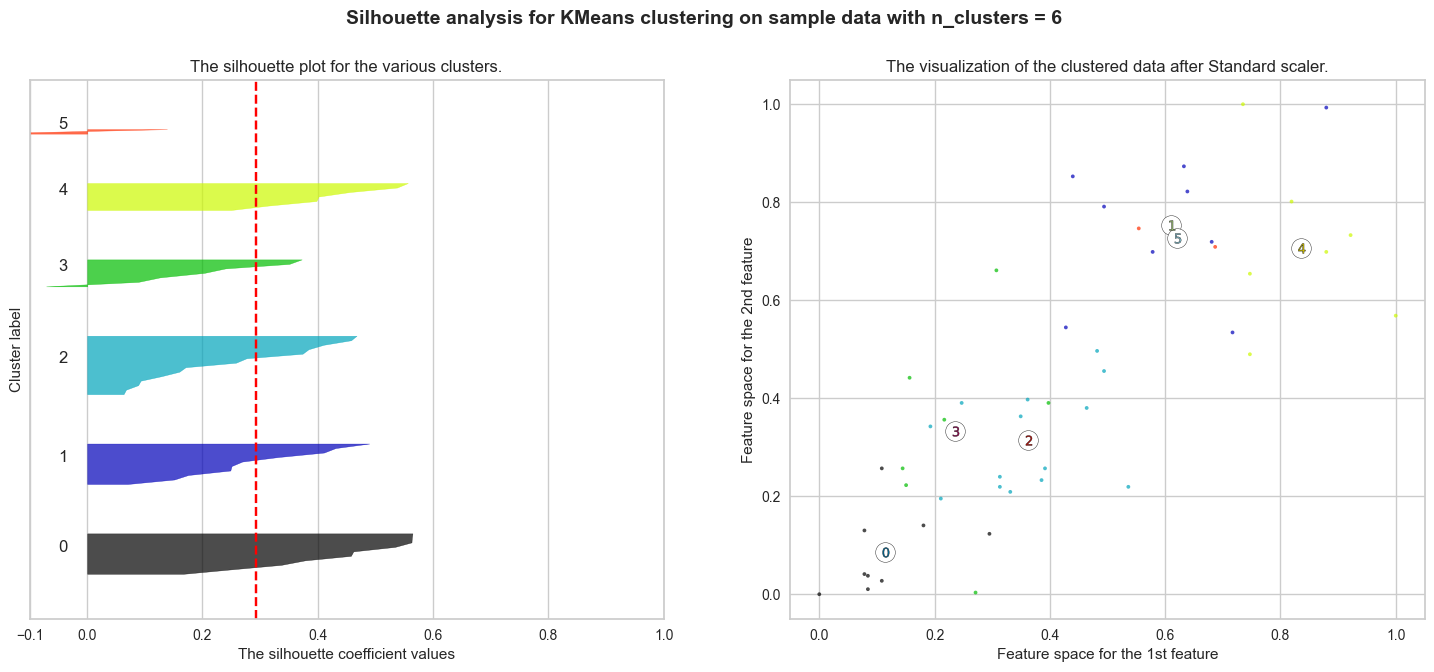

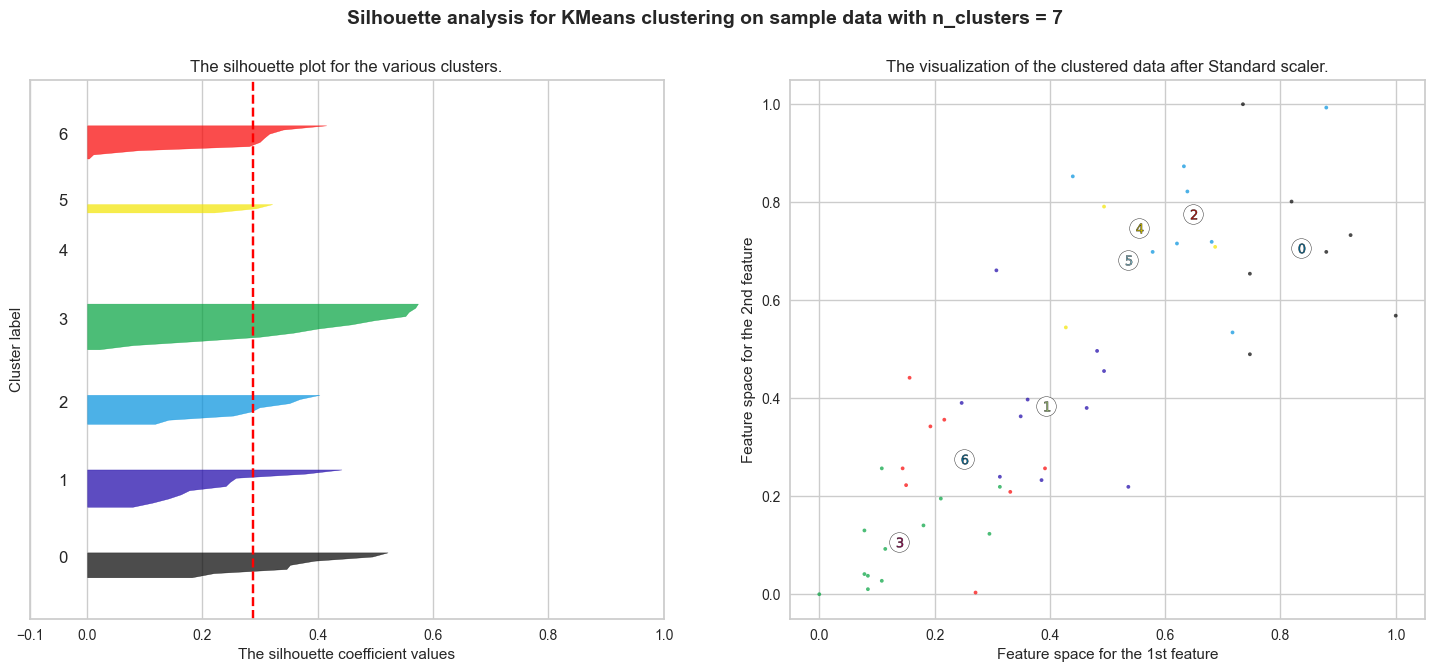

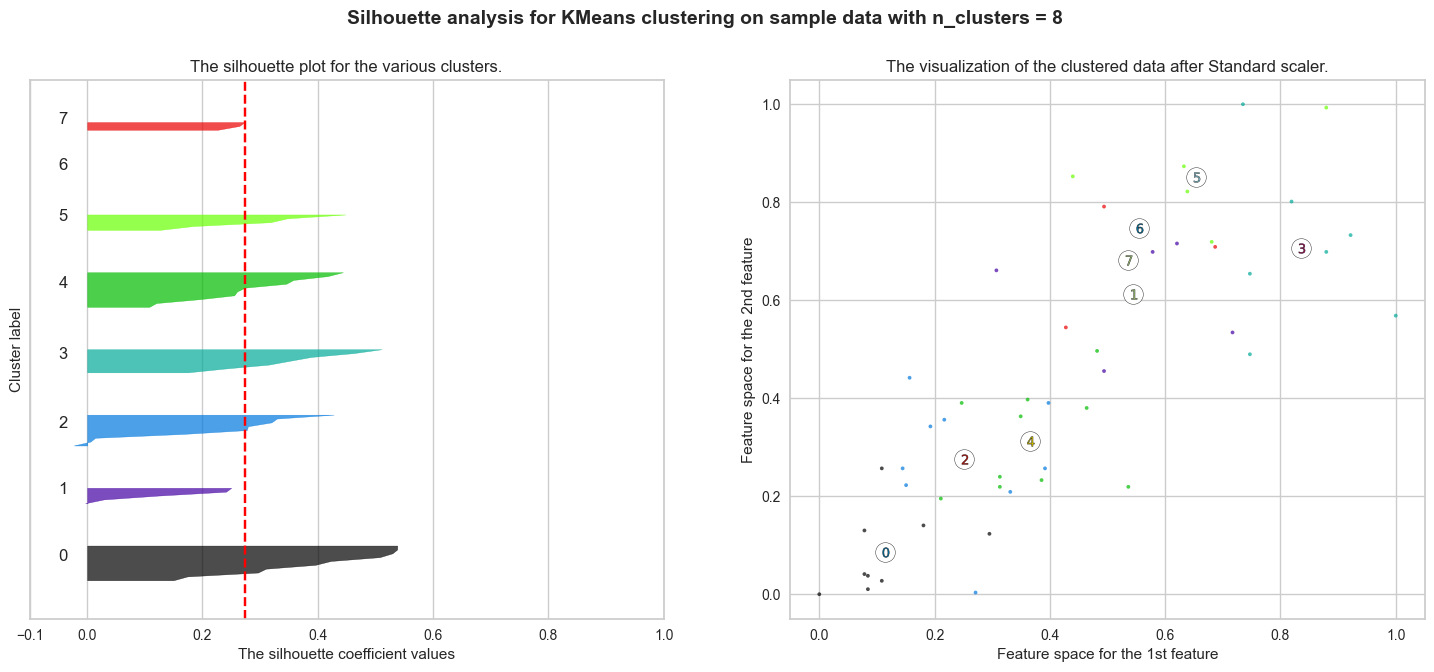

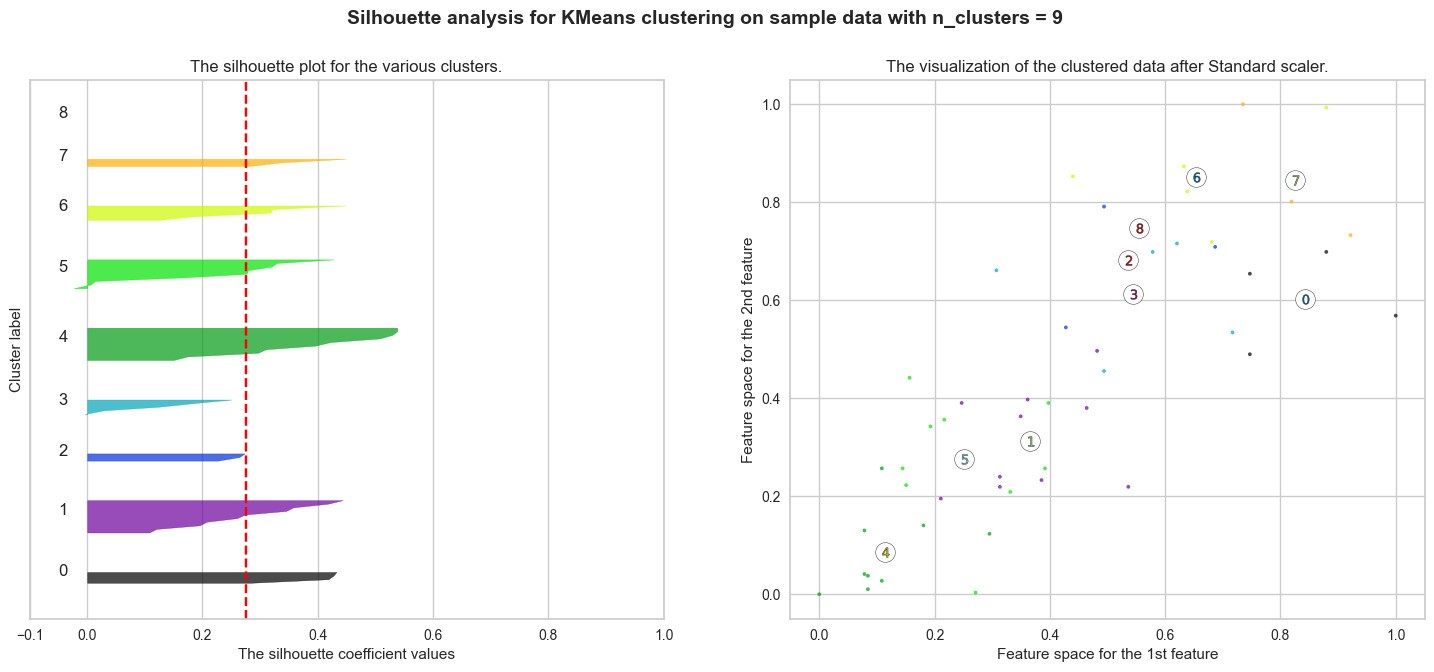

In [87]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,0], minmax_df[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker="o",
                c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1,
                    s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight="bold")

plt.show()


Conclusion:
    
According the the silhouette score of:

- The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.42, but if you notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

- If we check silhouette score with Normalize data kmeans model 0.42>0.40 .Best score always close to +1.

# 6.5 Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [93]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init="k-means++"")
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [94]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [95]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [96]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [97]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

6.596893867946196

In [98]:
# Assign clusters to the data set
df["Kmeans_label"] = model_kmeans.labels_

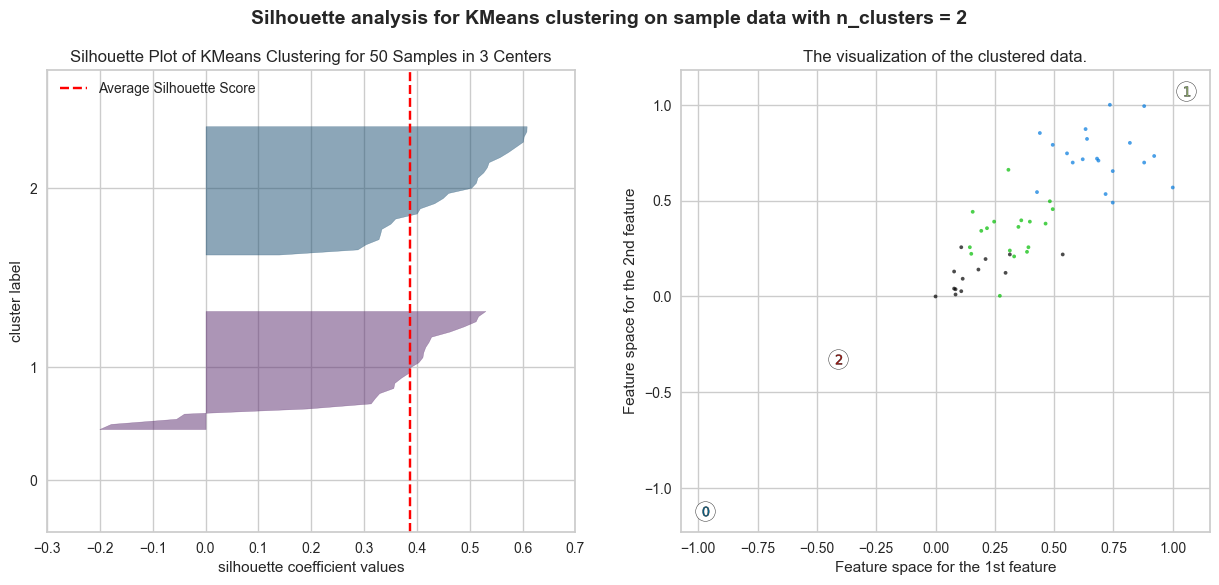

In [88]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=["#922B21","#5B2C6F","#1B4F72","#32a84a"])
sil_visualizer1.fit(minmax_df)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(minmax_df[:, 0], minmax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor="k")

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker="o",c="white", alpha=1, s=200, edgecolor="k")

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1,s=50, edgecolor="k")


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight="bold")

sil_visualizer1.show()
plt.show()


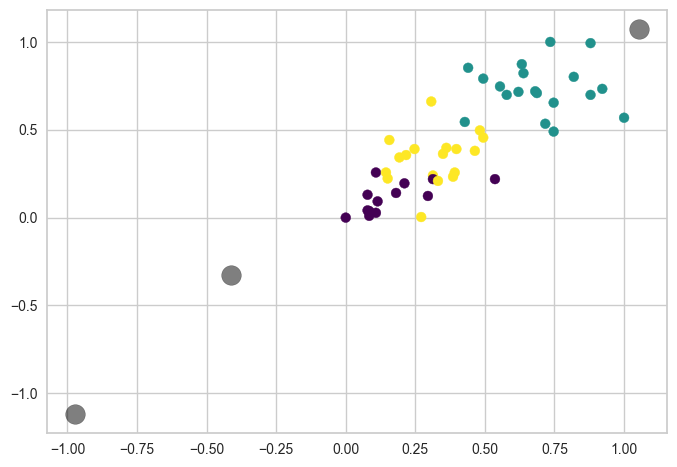

In [89]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [90]:
# Group data by Clusters (K=6)
df.groupby("Kmeans_label").agg(["mean"])

Murder     Assault   UrbanPop       Rape
                   mean        mean       mean       mean
Kmeans_label                                             
0             3.600000   78.538462   52.076923  12.176923
1             12.331579  259.315789  68.315789  29.215789
2             6.016667   143.888889  72.333333  19.344444

We can now clearly see the 2 number of clusters formed, which can be described as under:

- Cluster0, Safe Zone Defines the group of Urban States with Lowest of Crimes.
- Cluster1, Danger Zone Defines the group of Urban States with Highest Rate of Crimes.

# 7. Hierarchical Clustering Algorithm

# What is Hierarchical Clustering?

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

# Types Of Hierarchical Clustering:

There are two types of hierarchical clustering:

- Agglomerative: The data points are clustered using a bottom-up approach starting with individual data points.
- Divisive: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

Select two features from the data, scale the data.

In [91]:
# Select useful features
X = data[["City", "Murder"]].values.reshape(-1, 1)  

# Check the data shape
print("Data size:")
print(X.shape)

Data size:
(100, 1)


# Dendrograms

A dendrogram contains two kinds of information. Firstly, it shows each merge that was performed. Secondly, the length of the vertical lines show the distances (Euclidean distance or whatever distance measure was specified) between the merged clusters.

A) Average & Complete Linkage using Minkowski.

In [92]:
# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.values)

Text(0, 0.5, 'Minkowski distances')

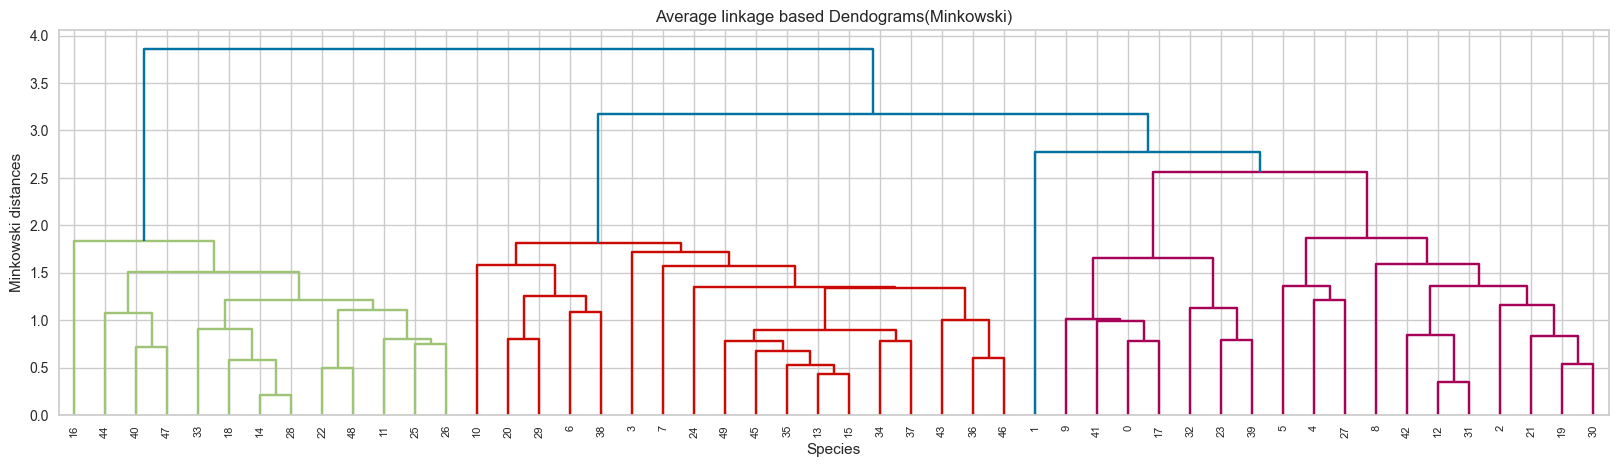

In [93]:
# Plot Average linked Dendrogram
plt.figure(figsize=(20, 5))
plt.title("Average linkage based Dendograms(Minkowski)")  
dend = dendrogram(linkage(X, method="average", metric="minkowski"))

plt.xlabel("Species")
plt.ylabel("Minkowski distances")

Text(0, 0.5, 'Minkowski distances')

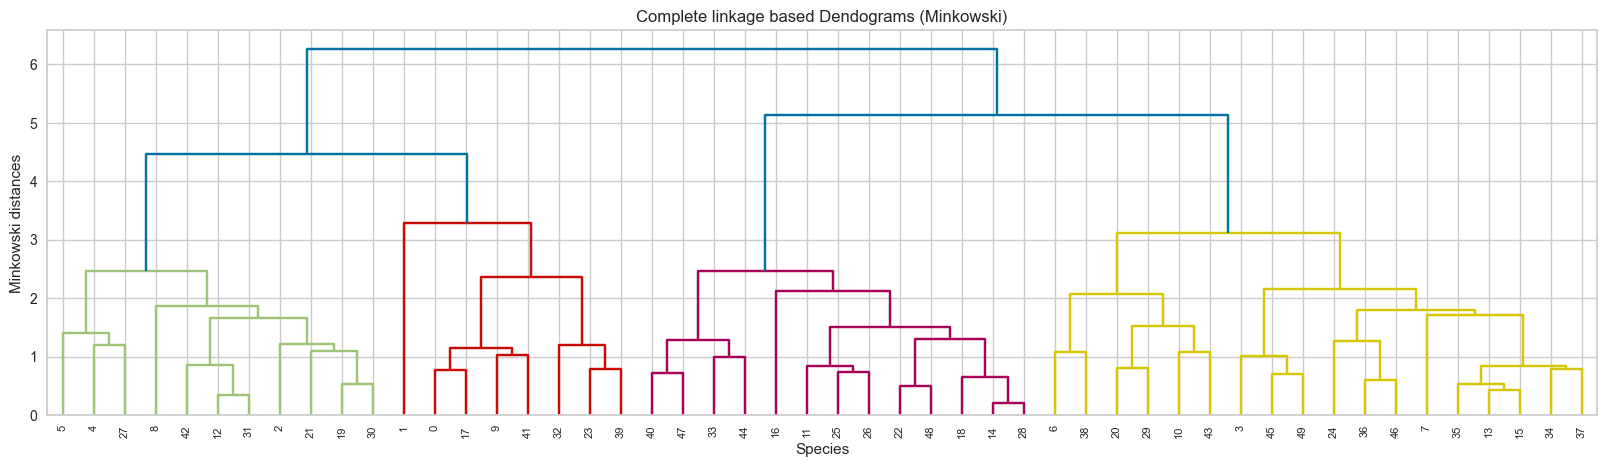

In [94]:
# Plot Complete linked Dendrogram
plt.figure(figsize=(20,5))
plt.title("Complete linkage based Dendograms (Minkowski)")  
dend = dendrogram(linkage(X, method="complete", metric="minkowski"))

plt.xlabel("Species")
plt.ylabel("Minkowski distances")

B) Average & Complete Linkage using Euclidean

Text(0, 0.5, 'Euclidean distances')

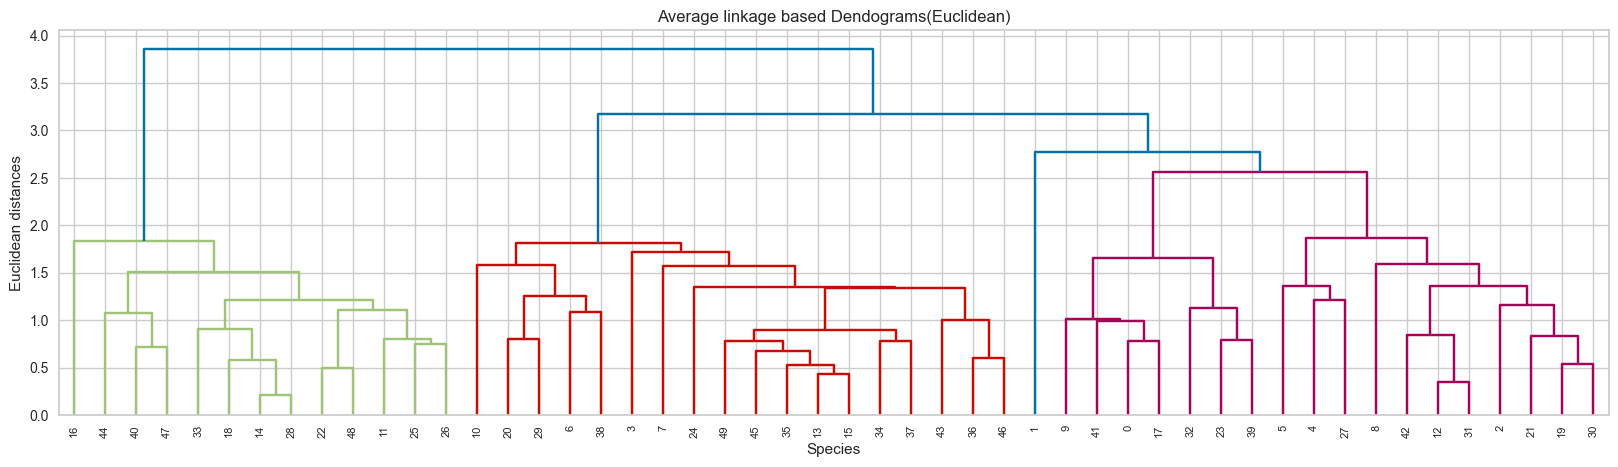

In [95]:
# Plot Average linked Dendrogram
plt.figure(figsize=(20, 5))
plt.title("Average linkage based Dendograms(Euclidean)")  
dend = dendrogram(linkage(X, method="average", metric="euclidean"))

plt.xlabel("Species")
plt.ylabel("Euclidean distances")

Text(0, 0.5, 'Cityblock distances')

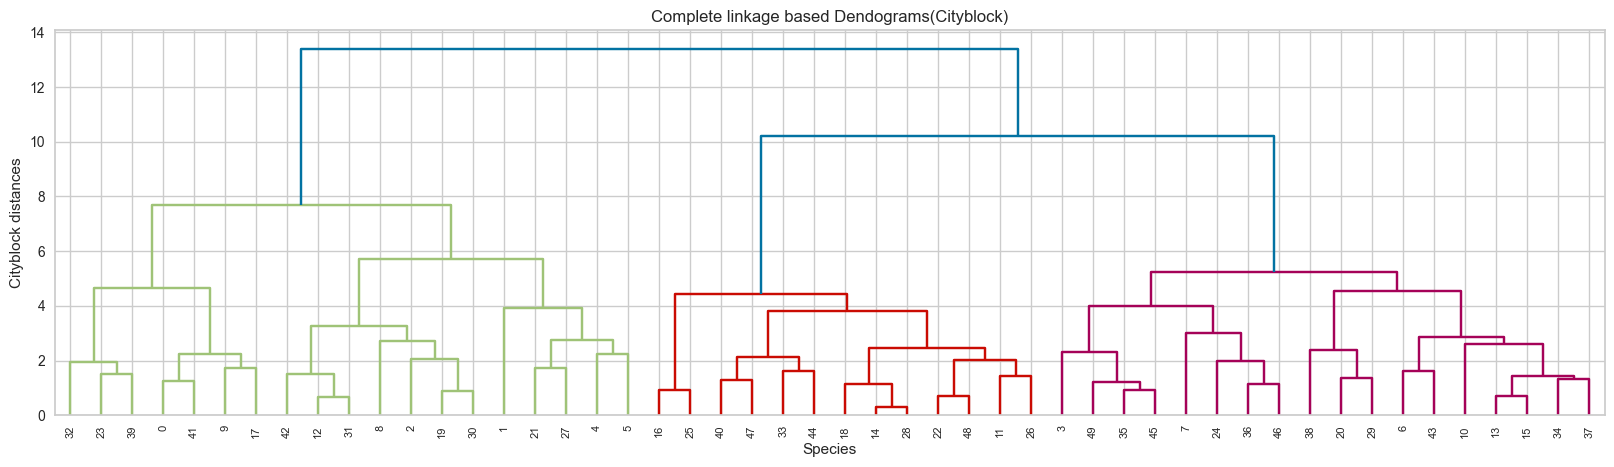

In [96]:
# Plot Complete linked Dendrogram
plt.figure(figsize=(20, 5))
plt.title("Complete linkage based Dendograms(Cityblock)")  
dend = dendrogram(linkage(X, method="complete", metric="cityblock"))

plt.xlabel("Species")
plt.ylabel("Cityblock distances")

Selection of the Minkowski Average Dendrogram.

- Choose a fixed number of clusters based on the dendrogram of your choice.
- Run agglomerative hierarchical clustering with that number of clusters (and the linkage method and distance metric used for that dendrogram).

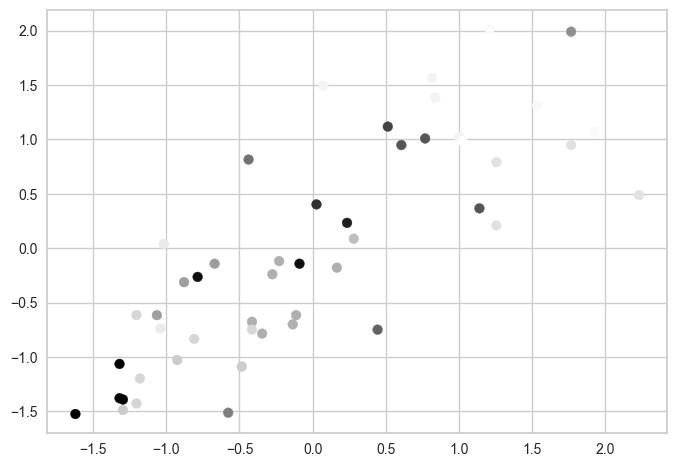

In [97]:
# Chose Average Linkage - Metric Minkowski
# Clusters K=20
K=20

# Agglomerative clustering
minkowski_cluster = AgglomerativeClustering(n_clusters=K, affinity="minkowski", linkage="average")
minkowski_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=minkowski_cluster.labels_)

In [98]:
# Reshape X
X = X.reshape(-1, 1)
X.shape

(250, 1)

In [99]:
# Silhouette score to verify clusters
# Silhouette score using Minkowski metric
from sklearn.metrics import accuracy_score, silhouette_score
silhouette_score = silhouette_score(X, labels=minkowski_cluster.fit_predict(X), metric="minkowski")

In [128]:
silhouette_score

0.6235972029508198

The score is 0.62 which means that the data fairly fits the observation.

# 7.1 Dendogram on MinMaxScaler Applied on Dataset

The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first:
- How many numbers of cluster. Also deciding which transformation data we will use to build model.

Qiuck Notes:

linkage{“ward”, “complete”, “average”, “single”}, default=”ward” Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.

average uses the average of the distances of each observation of the two sets.

complete or maximum linkage uses the maximum distances between all observations of the two sets.

single uses the minimum of the distances between all observations of the two sets.

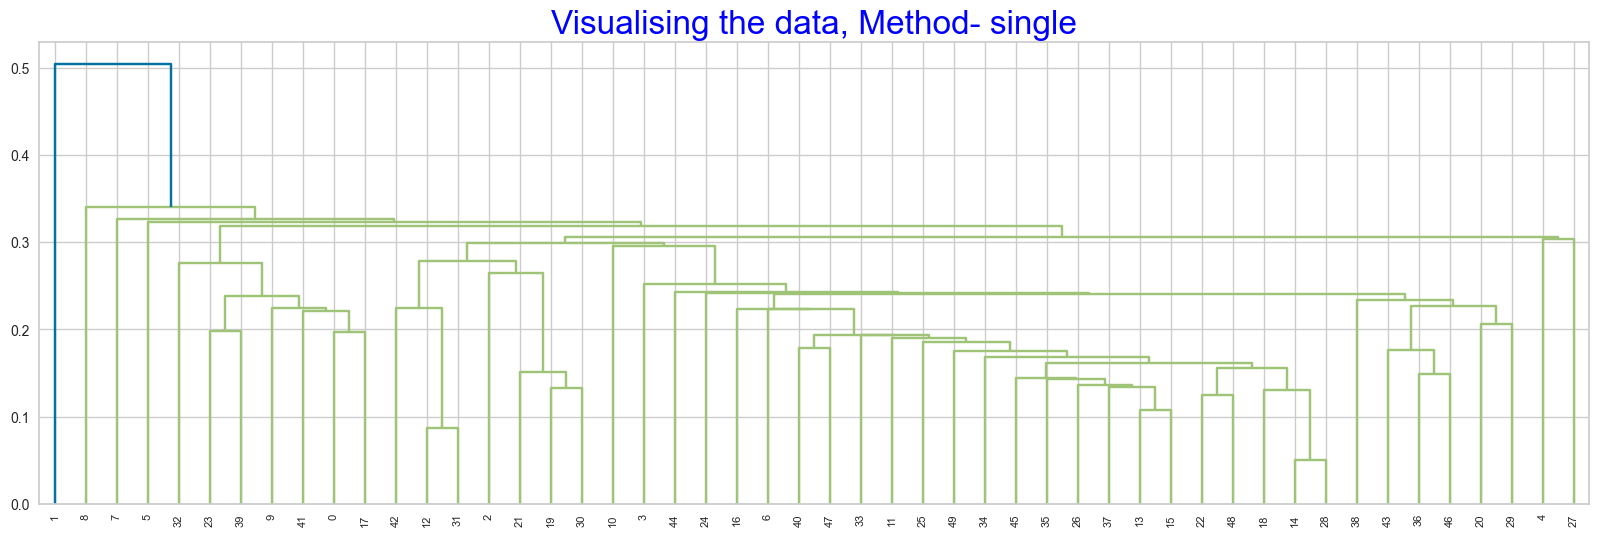

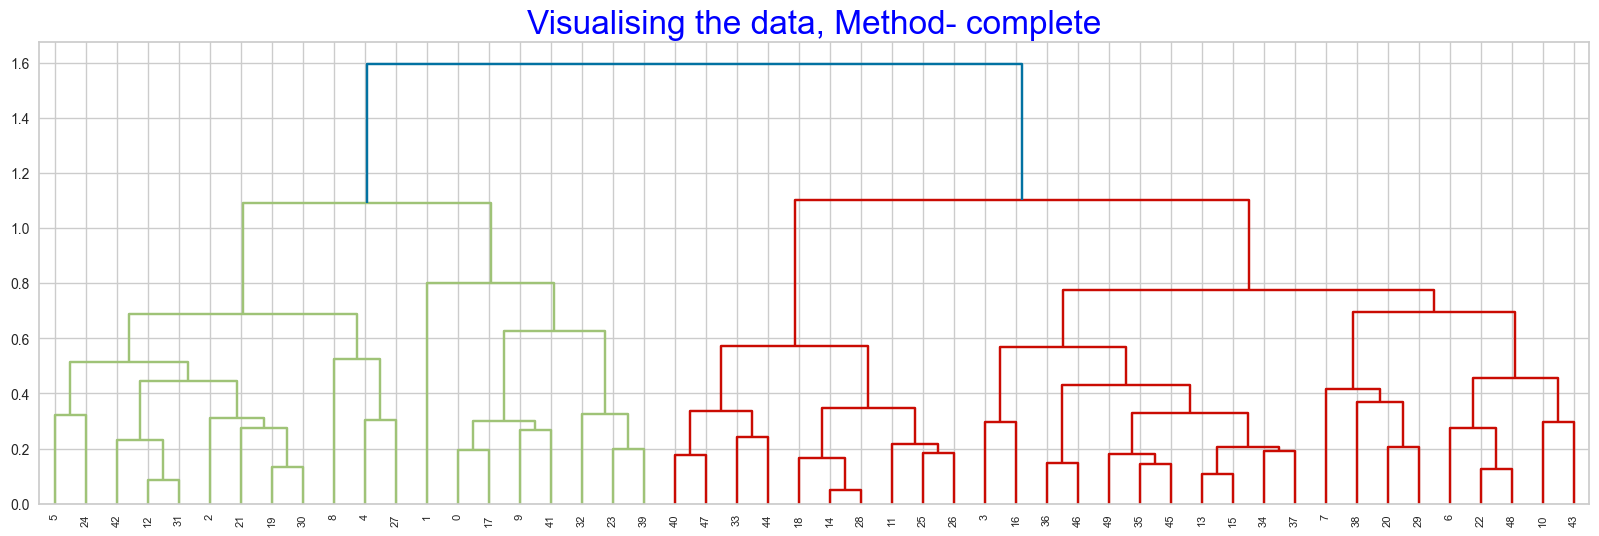

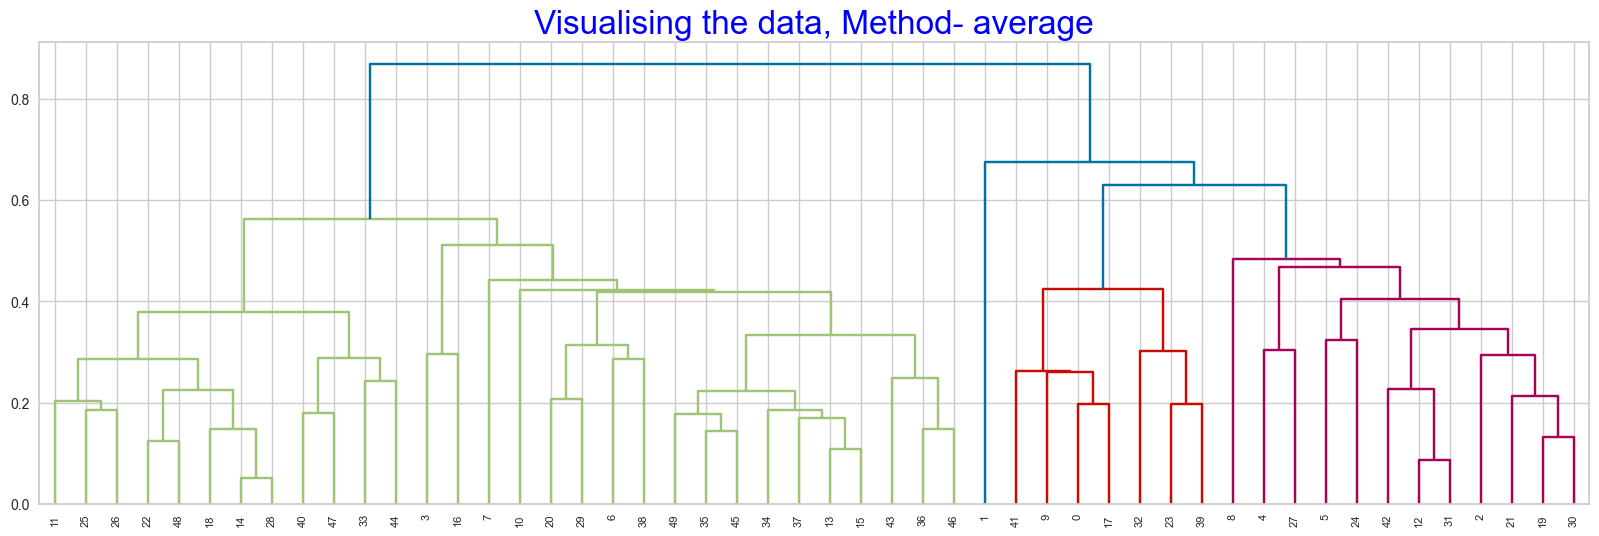

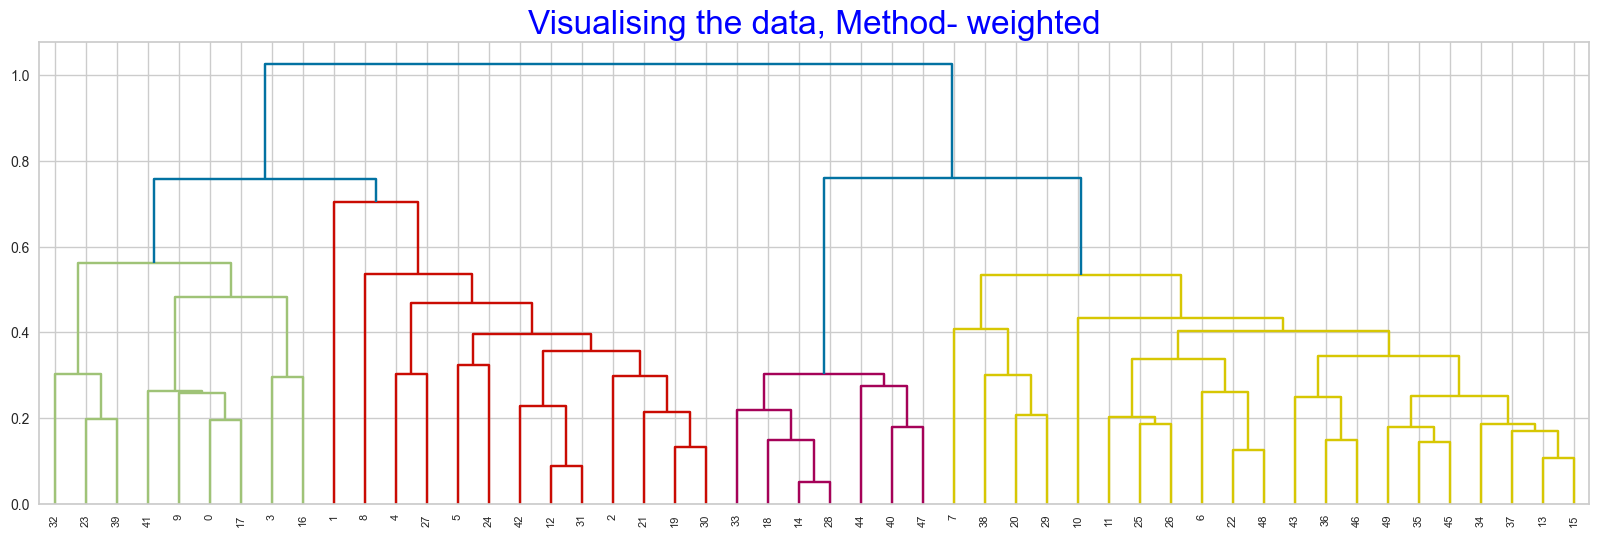

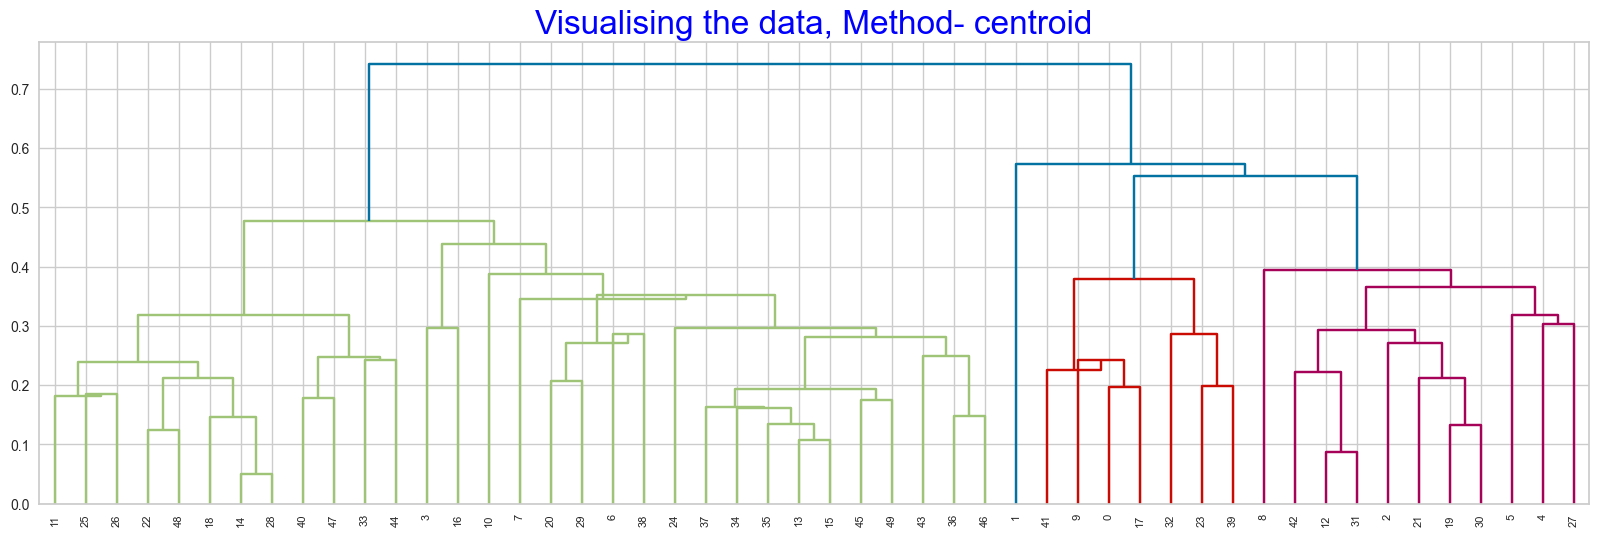

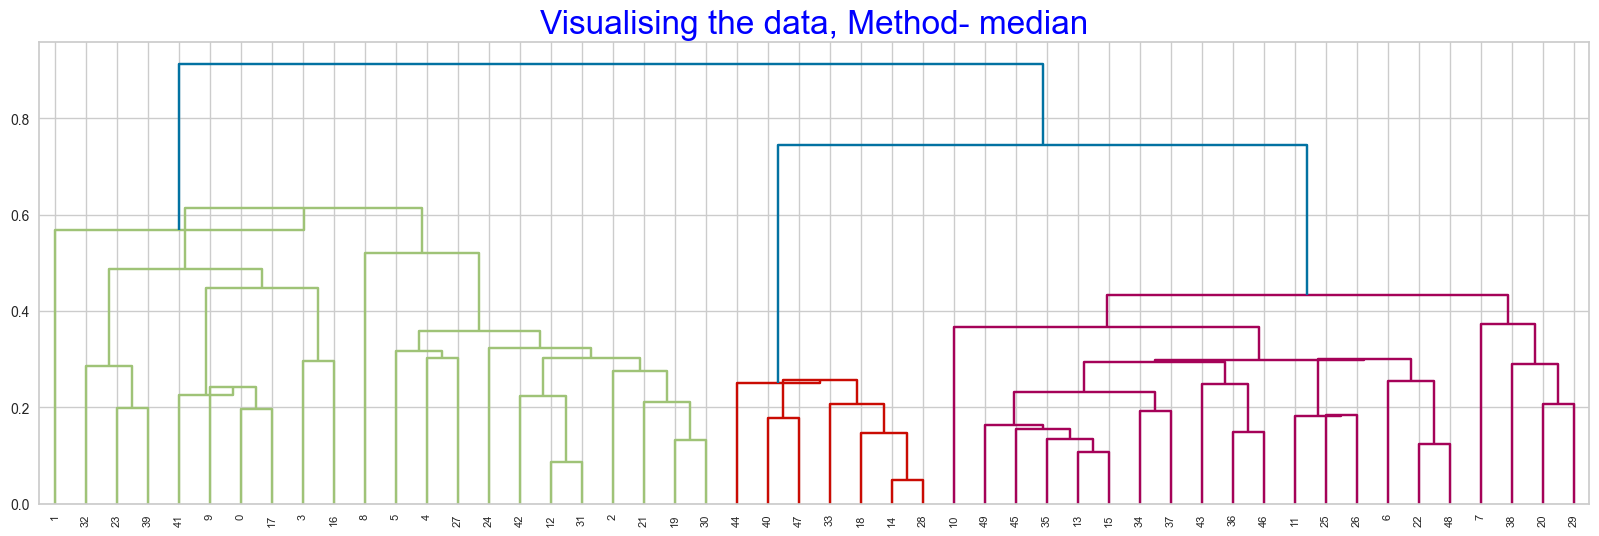

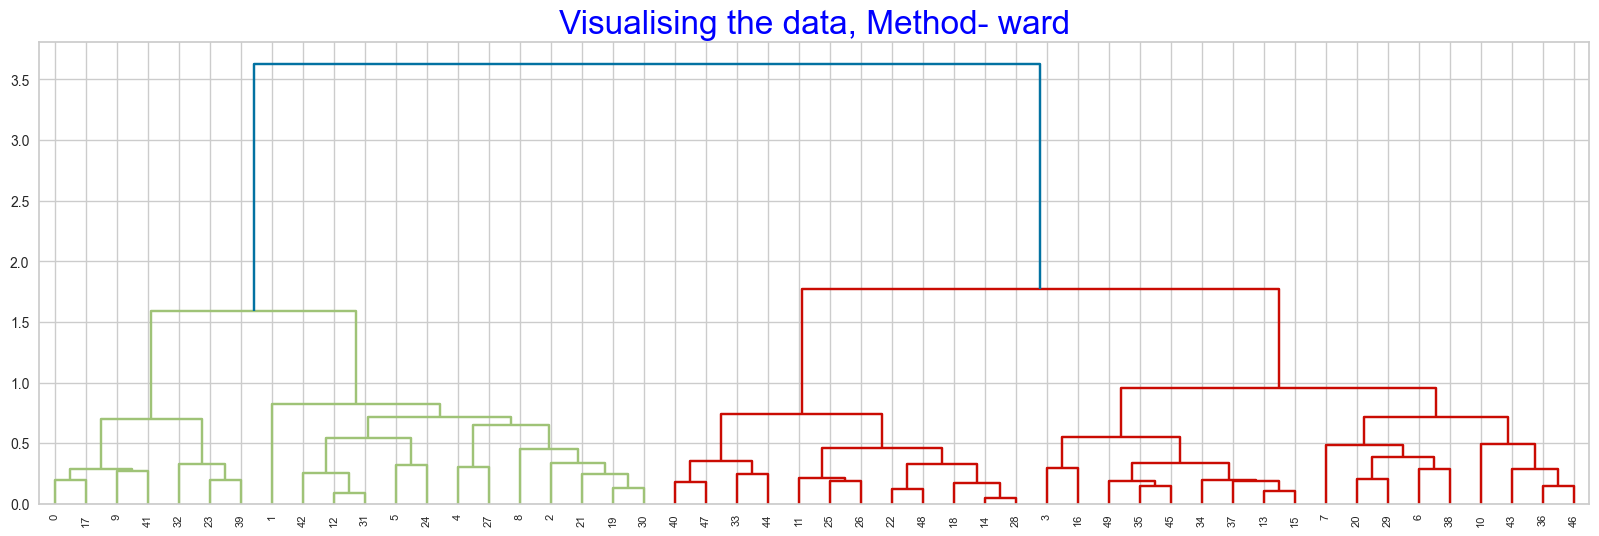

In [100]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ["single","complete","average","weighted","centroid","median","ward"]: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {"fontsize" : 24, "fontweight" : 16, "color" : "blue"}
    
    plt.title("Visualising the data, Method- {}".format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [130]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958485

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3514957243042158
For n_clusters = 3 The average silhouette_score with linkage- single : 0.1422328870818544

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.30607294424263076
For n_clusters = 4 The average silhouette_score with linkage- average : 0.369923911402771

The seperation in Each Method indicate that 2 as the optimal number for clusters.

# 7.2 Dendrogram on Standard Scaler Applied on Data

In [101]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.234555987531598

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3103635817402789
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170266

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221
Fo

Conclusion: 

Max score is with cluster numbers 2 in both standard scaler transformation and Min Max scaler transformation.

- Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined.

# 7.3 Run Hierarchical Clustering (Agglomerative Clustering).

In [102]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [103]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [104]:
# Clustering Score

(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

# Putting Cluster lables into original dataset And analysis of the same

In [105]:
# Concating Labels with main dataset copy

df["Hierarchical_labels"] = agg_clustering.labels_

In [106]:
df.groupby("Hierarchical_labels").agg(["mean"])

Murder     Assault   UrbanPop       Rape Kmeans_label
                       mean        mean       mean       mean         mean
Hierarchical_labels                                                       
0                    4.870   114.433333  63.633333  15.943333  1.133333   
1                    12.165  255.250000  68.400000  29.165000  1.050000

<Axes: xlabel='Hierarchical_labels', ylabel='Murder'>

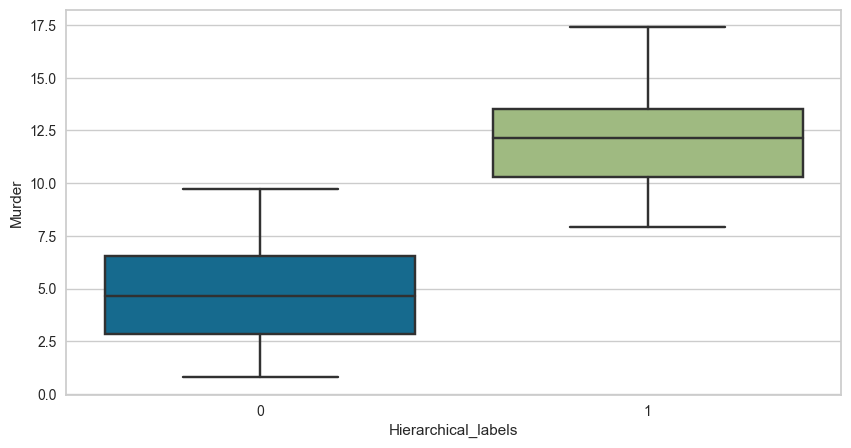

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Hierarchical_labels", y="Murder", data=df)

<Axes: xlabel='Hierarchical_labels', ylabel='Assault'>

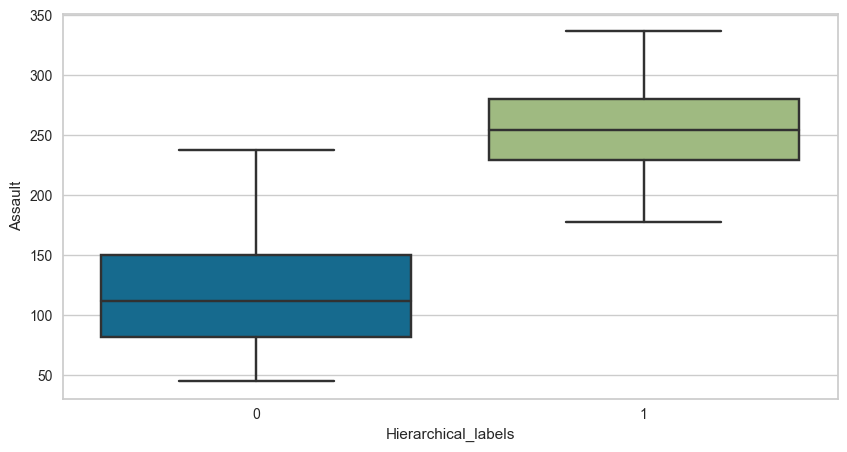

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Hierarchical_labels", y="Assault", data=df)

<Axes: xlabel='Hierarchical_labels', ylabel='Rape'>

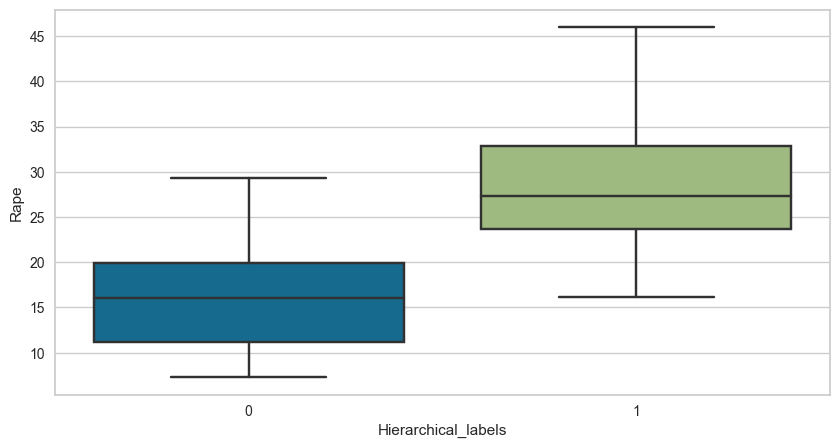

In [109]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Hierarchical_labels", y="Rape", data=df)

Observations:
- The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
- The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

# 8. Principal Component Analysis (PCA)

The purpose of this post is to provide a complete and simplified explanation of principal component analysis (PCA). We’ll cover how it works step by step, so everyone can understand it and make use of it, even those without a strong mathematical background.

PCA is a widely covered machine learning method on the web, and there are some great articles about it, but many spend too much time in the weeds on the topic, when most of us just want to know how it works in a simplified way. 

Principal component analysis can be broken down into five steps. I’ll go through each step, providing logical explanations of what PCA is doing and simplifying mathematical concepts such as standardization, covariance, eigenvectors and eigenvalues without focusing on how to compute them.

# 8.1 Apply PCA

In [110]:
# Encode categorical feature using LabelEncoder
data["City"] = LabelEncoder().fit_transform(data["City"])

In [111]:
# Perform Feature Scaling

X = StandardScaler().fit_transform(data.values)

In [112]:
# Perform PCA

# choose number of components to be generated n=3
nr_comps = 4
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_data = pd.DataFrame(principal_components, index=data.index)

# This is to include the country code  as the rownames in the PC's
pca_data.head()

0         1         2         3
0  1.431218  0.707694  1.571809 -0.529016
1  2.344861  0.723025  1.394987  1.960770
2  2.156936 -0.991802  0.751082 -0.016037
3  0.297199  0.632516  1.744187  0.021351
4  2.849696 -1.640568  0.179269  0.554437

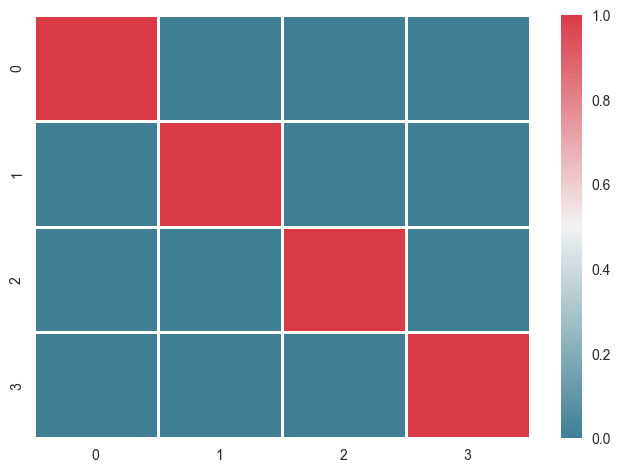

In [113]:
# Heatmap showing correlation after applying PCA
ax = sns.heatmap(pca_data.corr(), cmap=colormap,linewidth=1)
plt.show()

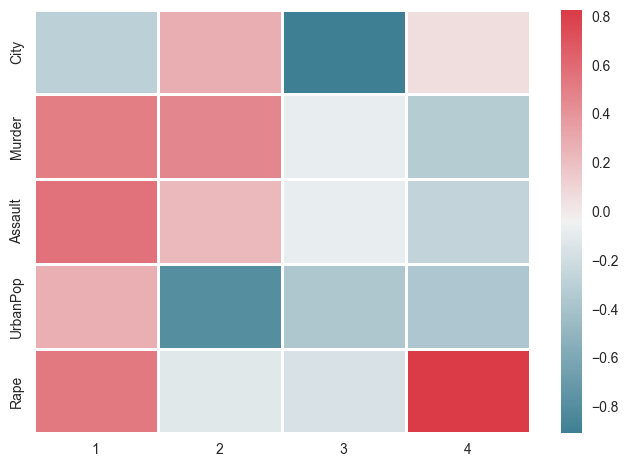

In [114]:
# Post PCA view
components = pd.DataFrame(pca.components_, columns=data.columns, index=range(1, nr_comps+1)).transpose()

ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

In [115]:
# Check the variance of each PC
pca.explained_variance_ratio_

array([0.52751625, 0.20100993, 0.16624494, 0.07097752])

In [116]:
# Take the mean of all variance of PC to select the threshold
np.mean(pca.explained_variance_ratio_)

0.24143715902059612

In [117]:
# Recreate PCA object with final PC count 
finalFeatures = pca.transform(X)
finalFeatures

array([[ 1.43121848e+00,  7.07693535e-01,  1.57180859e+00,
        -5.29015972e-01],
       [ 2.34486149e+00,  7.23025213e-01,  1.39498721e+00,
         1.96077010e+00],
       [ 2.15693554e+00, -9.91802247e-01,  7.51081771e-01,
        -1.60365964e-02],
       [ 2.97199012e-01,  6.32516232e-01,  1.74418731e+00,
         2.13510525e-02],
       [ 2.84969629e+00, -1.64056844e+00,  1.79268718e-01,
         5.54436817e-01],
       [ 1.86024847e+00, -1.19033638e+00,  5.73562403e-01,
         1.04199453e+00],
       [-9.09514378e-01, -1.52452481e+00,  1.19142233e+00,
        -7.28859776e-01],
       [ 4.09268396e-01, -6.49356566e-01,  9.99492163e-01,
        -7.94136018e-01],
       [ 3.21418287e+00,  1.33973356e-02,  1.81048740e-01,
        -6.01023841e-01],
       [ 1.86545999e+00,  1.09607279e+00,  8.20988350e-01,
        -3.73028231e-01],
       [-5.63343696e-01, -1.85855454e+00,  6.55406647e-01,
         1.61068040e-04],
       [-1.28752030e+00, -2.30099581e-01,  1.41406316e+00,
      